# 🧹 `Cleaning Data in Python` :
> We will see in this **`hands-on training notebook`** how to effectively diagnose and treat missing data in **Python**.

## 🔰 `Introduction` :
> The majority of **data science work** often revolves around **pre-processing data**, and making sure it's **ready for analysis**. However, **`we will be covering how transform our raw data into accurate insights`**. In this notebook, we will see:
>* Import data into **`pandas`**, and use simple functions to diagnose problems in our data.
>* Visualize **missing** and **out of range** data using **`missingno`** and **`seaborn`**.
>* **Apply a range of data cleaning tasks** that will ensure the delivery of accurate insights.

## ⭐ `Getting started` :

In [1]:
# Import libraries :

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
# render figures directly in the notebook :
%matplotlib inline
# render higher resolution images :
%config InlineBackend.figure_format = 'retina'


# Seaborn is a Python data visualization library based on matplotlib :
import seaborn as sns 

# Missing data visualization module for Python :
import missingno as msno 
import datetime as dt

> - **`Seaborn`** is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
> - **`Missingno`** is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe.


In [2]:
# Reading the dataset with pandas :
new_cars = pd.read_csv('new_cars.csv')
old_cars1=pd.read_csv('old_cars_part1.csv')
old_cars2=pd.read_csv('old_cars_part2.csv')

In [3]:
# concat our data into one dataframe
frames=[old_cars1,old_cars2,new_cars]
cars=pd.concat(frames)

In [4]:
# Displaying the 5 first and last rows of the dataset :
cars.index = range(0, len(cars), 1)
cars=cars.drop('Unnamed: 0', 1)
cars

C:\Users\SAAD\AppData\Local\Temp/ipykernel_14564/2769727366.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cars=cars.drop('Unnamed: 0', 1)


,Brand,Model,Version,Price,Modèle,Ville,Vendeur,Main,Kilométrage,Carburant,...,Affichage Tête-Haute,Park Assist Auto.,Volant réglable,Coffre électrique,Sièges électriques avec fonction mémoire,Système de navigation GPS,Connexion Internet,Follow-me home,Phares à LED,Vitres sur-teintées
0,ALFA,ROMEO Stelvio 2018,2.2 JTD 210 TCT Super,340.000 DH,2018.0,Casablanca,Particulier,Seconde,73.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALFA,ROMEO Stelvio 2018,2.2 JTD 210 TCT Super,335.000 DH,2018.0,Casablanca,Particulier,Première,73.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALFA,ROMEO 147 2018,1.6 TS Progression,55.000 DH,2018.0,Casablanca,Particulier,Seconde,50.000 km,Essence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALFA,ROMEO Giulietta 2016,2.0 JTDM 175 Super,150.000 DH,2016.0,Casablanca,Particulier,Seconde,86.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALFA,ROMEO MiTo 2012,1.6 JTDM Distinctive,87.000 DH,2012.0,Casablanca,Particulier,Seconde,130.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,VOLVO,XC90,NaN,630.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,NaN,...,non,non,Hauteur et Profondeur,oui,oui,oui,oui,oui,oui,oui
4225,VOLVO,XC90,NaN,730.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,NaN,...,oui,oui,Hauteur et Profondeur,oui,oui,oui,oui,oui,oui,oui
4226,VOLVO,XC90,NaN,850.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,NaN,...,oui,oui,Hauteur et Profondeur,oui,oui,oui,oui,oui,oui,oui
4227,VOLVO,XC90,NaN,1.000.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,NaN,...,oui,oui,Hauteur et Profondeur,oui,oui,oui,oui,oui,oui,oui


- **4229** is the number of records in our dataset.
- **104** is the number of columns.

## 🩺 `Diagnosing data cleaning problems using simple pandas` :

Some important and common methods needed to **get a better understanding of DataFrames** and **diagnose potential data problems** are the following: 

> - **`.head()`** prints the **header** of a DataFrame.
> - **`.dtypes`** prints **datatypes** of all columns in a DataFrame.
> - **`.info()`** provides a bird's eye view of column **data types** and **missing values** in a DataFrame.
> - **`.describe()`** returns a **distribution of numeric columns** in your DataFrame.
> - **`.isna().sum()`** allows us to break down the **number of missing values per column** in our DataFrame.
> - **`.unique()`** finds the **number of unique values** in a DataFrame column.
> - **`sns.displot()`** **plots the distribution of one column** in your DataFrame.

In [5]:
# Print the header of the DataFrame :
cars.head()

,Brand,Model,Version,Price,Modèle,Ville,Vendeur,Main,Kilométrage,Carburant,...,Affichage Tête-Haute,Park Assist Auto.,Volant réglable,Coffre électrique,Sièges électriques avec fonction mémoire,Système de navigation GPS,Connexion Internet,Follow-me home,Phares à LED,Vitres sur-teintées
0,ALFA,ROMEO Stelvio 2018,2.2 JTD 210 TCT Super,340.000 DH,2018.0,Casablanca,Particulier,Seconde,73.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALFA,ROMEO Stelvio 2018,2.2 JTD 210 TCT Super,335.000 DH,2018.0,Casablanca,Particulier,Première,73.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALFA,ROMEO 147 2018,1.6 TS Progression,55.000 DH,2018.0,Casablanca,Particulier,Seconde,50.000 km,Essence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALFA,ROMEO Giulietta 2016,2.0 JTDM 175 Super,150.000 DH,2016.0,Casablanca,Particulier,Seconde,86.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALFA,ROMEO MiTo 2012,1.6 JTDM Distinctive,87.000 DH,2012.0,Casablanca,Particulier,Seconde,130.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By merely looking at the data, we can already diagnose a range of potential problems down the line such as :

#### 📊 `Data type problems` :
>- **`Problem 1`** : We can see that The price contain strings, we should convert them to floats and remove the currency tag (DH).

>- **`Problem 2`** : The 'modèle' column has floats which must be converted into datetime objects. 

>- **`Problem 3`** : The Brand name for ALPHA ROMEO is not splited well during scraping step, we should fix that.

#### ❓ `Missing data problems` :
> - **`Problem 4`** : We can see that **there are missing data in some columns**, we'll get a better bird's eye view of that down the line.



In [6]:
# Print data types of DataFrame :
cars.dtypes

Brand                         object
Model                         object
Version                       object
Price                         object
Modèle                       float64
                              ...   
Système de navigation GPS     object
Connexion Internet            object
Follow-me home                object
Phares à LED                  object
Vitres sur-teintées           object
Length: 103, dtype: object

> - Printing the data types confirms that : 
>     - All columns contain strings


In [7]:
# Print info of DataFrame :
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Columns: 103 entries, Brand to Vitres sur-teintées
dtypes: float64(2), object(101)
memory usage: 3.3+ MB


> - Printing the info confirms our hunch about the following :
>     - **indexes are not good, the range of index is limited compared to data length**

In [8]:
# Print number of missing values :
cars.isna().sum()

Brand                         112
Model                         112
Version                       995
Price                         112
Modèle                        995
                             ... 
Système de navigation GPS    3361
Connexion Internet           3361
Follow-me home               3361
Phares à LED                 3361
Vitres sur-teintées          3361
Length: 103, dtype: int64

First, We have a lot of missing data, **About 3361/4229= 0.79 = 79% of data doesn't have a value at many columns**:
> There are a variety of ways of **dealing with missing data** that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be :
> - **Dropping missing data** (if the data dropped does not impact or skew our data)
> - **Setting to missing and impute with statistical measures** (median, mean, mode ...)
> - **Impute based on business assumptions of our data**.

In [9]:
# Print description of DataFrame :
cars.describe()

,Modèle,Année de mise en circulation
count,3234.000000,3234.000000
mean,2012.266543,2012.266543
std,5.239345,5.239345
min,1984.000000,1984.000000
25%,2010.000000,2010.000000
50%,2013.000000,2013.000000
75%,2016.000000,2016.000000
max,2022.000000,2022.000000


> **Describe method is not significant at this level of cleaning, since there is no numerical features.**
> **These two features are supposed to be datetime columns**

## 📝 `Our to do list` :

#### 📊 `Data type problems` :
>-  1️⃣ **`Task 1`** : Drop columns with no data, or repeated ones
>-  2️⃣ **`Task 2`** : Remove `DH` from **`price`** and convert it to `float`
>-  3️⃣ **`Task 3`** : convert some columns to a proper data type
>-  3️⃣ **`Task 4`** : Fill some missing values such us 'Modèle' for new cars and 'Kilomètrage = Millieage'...


#### ✔️ `Data range problems` :
>-  6️⃣ **`Task 6`** : Fix data indexing problem



#### ⏳ `Is that all though?` :
>- We need to make sure that data makes sense by applying some sanity checks on our DataFrame.
>  -  8️⃣ **`Task 8`** :  Do we have consistent date data ?
>- We need to investigate if we duplicates in our data.
>  -  9️⃣ **`Task 9`** :  Let's deal with duplicate data !

## 📊 `Data type problems` :

In [10]:
# Reminder of the DataFrame :
cars.head()

,Brand,Model,Version,Price,Modèle,Ville,Vendeur,Main,Kilométrage,Carburant,...,Affichage Tête-Haute,Park Assist Auto.,Volant réglable,Coffre électrique,Sièges électriques avec fonction mémoire,Système de navigation GPS,Connexion Internet,Follow-me home,Phares à LED,Vitres sur-teintées
0,ALFA,ROMEO Stelvio 2018,2.2 JTD 210 TCT Super,340.000 DH,2018.0,Casablanca,Particulier,Seconde,73.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALFA,ROMEO Stelvio 2018,2.2 JTD 210 TCT Super,335.000 DH,2018.0,Casablanca,Particulier,Première,73.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALFA,ROMEO 147 2018,1.6 TS Progression,55.000 DH,2018.0,Casablanca,Particulier,Seconde,50.000 km,Essence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALFA,ROMEO Giulietta 2016,2.0 JTDM 175 Super,150.000 DH,2016.0,Casablanca,Particulier,Seconde,86.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALFA,ROMEO MiTo 2012,1.6 JTDM Distinctive,87.000 DH,2012.0,Casablanca,Particulier,Seconde,130.000 km,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1️⃣   `Task 1`  : Drop columns with a large ratio of missing values: 
 **We choosed to drop these columns because they are available for new cars data only, if we set them to 0 for old cars data it would perturb the machine learning since old cars also have these features in reality. So it's better to drop them.**

> To perform this task, we will use the following method :
> - **`.df.drop()`**  takes the name of the column/list of columns to drop and drop them

**Let's start By getting columns names and values:**

In [11]:
list(cars.columns)

['Brand',
 'Model',
 'Version',
 'Price',
 'Modèle',
 'Ville',
 'Vendeur',
 'Main',
 'Kilométrage',
 'Carburant',
 'Transmision',
 'Année de mise en circulation',
 '1ère main',
 'Dédouanée',
 'Motorisation',
 'Puissance fiscale',
 'Puissance dynamique',
 'Couleur extérieure',
 'Etat du véhicule',
 'Climatisation',
 'Système audio',
 'Vitres électriques',
 'Sièges électriques',
 'Ordinateur de bord',
 'Start & Stop',
 'Régulateur de vitesse',
 'Allumage auto. des feux',
 'Détecteur de pluie',
 'Commandes au volant',
 'Ecran tactile',
 'Rétroviseurs électriques',
 'Rétroviseurs rabattables électriquement',
 'Ouverture auto. du coffre',
 'Démarrage mains libres',
 'Banquette arrière rabattable 1/3-2/3',
 'Aide au stationnement',
 'Caméra de recul',
 'Bluetooth',
 'Système de navigation',
 'Jantes aluminium',
 'Volant cuir',
 'Sellerie',
 'Vitres teintées',
 'Feux de jour',
 'Feux à LED',
 'Phares Xénon',
 'Barres de toit',
 'Toit',
 'Airbags',
 'ABS',
 'ESP',
 "Aide au freinage d'urgence"

In [12]:
# get names of columns with Nan/total ratio is greater than 80%:
columns_to_drop=cars.columns[cars.isna().sum()>(0.80*len(cars))]
print("{} columns to drop are:\n".format(len(list(columns_to_drop))),list(columns_to_drop))

6 columns to drop are:
 ['Architecture', 'Cylindrée', 'Palettes au volant', 'Conso. ville', 'Conso. route', 'Volume du réservoir']


In [13]:
# droping columns
cars.drop(columns_to_drop, axis = 1, inplace = True)

In [14]:
# check the shape of our new df
cars.shape

(4229, 97)

- Now we are going to drop Nan rows and duplicates:

In [15]:
cars.dropna(how='all',inplace=True)

In [16]:
cars.drop_duplicates(inplace=True)

In [17]:
# let's check the shape of our data now
cars.shape

(4093, 97)

#### 2️⃣    `Task 2`  : Remove `DH` from `price` and convert it to `float` :
> To perform this task, we will be using the following methods:
> - **`.str.strip()`** which removes a specified string from each row in a column.
> - **`.astype()`**

In [18]:
# Calculate mean of price without conversion :
#cars['Price'].mean()

- As expected we got an error 🤔, the **mean** of the price column cannot be calculated because its data type is `str`

In [19]:
# let's define a function that handle our Price column:
def ConvertPrice(price):
    if isinstance(price,str):
        price=price.split()[0]
        price=price.replace(".","")
        return float(price)
    elif isinstance(price,float):
        return price
        

In [20]:
# Apply the function to the column
cars["Price"]=cars['Price'].apply(ConvertPrice)
# Calculate mean of price after conversion
cars['Price'].mean()

237047.81456144637

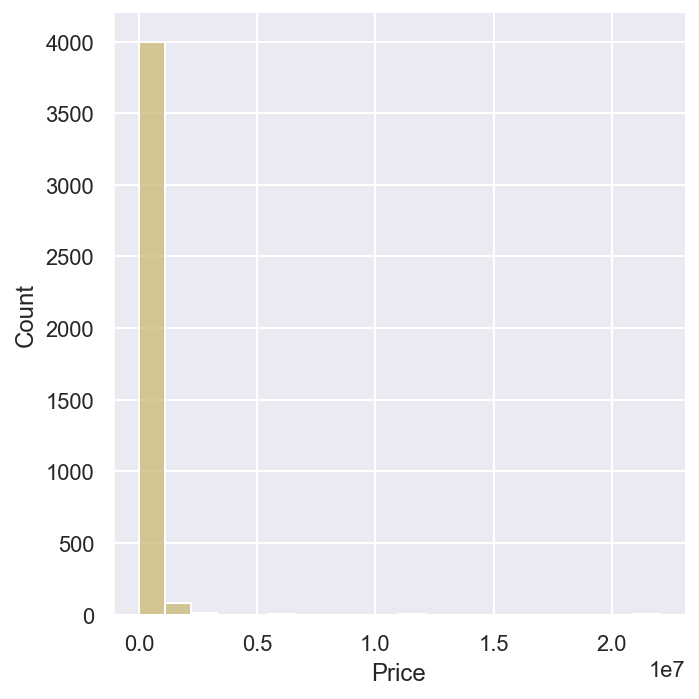

In [21]:
# Visualize distribution of prices
sns.set_theme()
sns.displot(cars['Price'], bins = 20,color='y')
#ax.set_xlim(0,1)
plt.show()

#### 2️⃣    `Task 3`  : Convert some columns into proper types :
> First, we will deal Brand column column for ALPHA ROMEO:

> Second, we will convert `Modèle` column type to datetime 

In [22]:
# printing the Brand unique names
cars["Brand"].explode().unique()

array(['ALFA', 'AUDI', 'BMW', 'CITROEN', 'DACIA', 'DFSK', 'DS', 'FIAT',
       'FORD', 'MERCEDES', 'MINI', 'MITSUBISHI', 'NISSAN', 'OPEL',
       'PEUGEOT', 'PORSCHE', 'RENAULT', 'SEAT', 'SKODA', 'SSANGYONG',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'HONDA', 'HYUNDAI',
       'JAGUAR', 'JEEP', 'KIA', 'LAND', 'LEXUS', 'MAHINDRA', 'MAZDA'],
      dtype=object)

In [23]:
cars.loc[cars['Brand']=="ALFA", 'Model']=cars.Model[cars['Brand'] == "ALFA"].apply(lambda x: " ".join(x.split()[1:-1]))
cars.loc[cars['Brand']=="ALFA", 'Brand']=cars.Brand[cars['Brand'] == "ALFA"].apply(lambda x: x+" ROMEO")

In [24]:
# Printing header of two columns (Brand + Model) :
cars[['Brand', 'Model']].head()

,Brand,Model
0,ALFA ROMEO,Stelvio
1,ALFA ROMEO,Stelvio
2,ALFA ROMEO,147
3,ALFA ROMEO,Giulietta
4,ALFA ROMEO,MiTo


**Here we go, Everything is fine !**

> *Now, let's deal with Modèle column:*

In [25]:
# Printing header of the column
cars[['Brand', 'Model',"Modèle"]].head()

,Brand,Model,Modèle
0,ALFA ROMEO,Stelvio,2018.0
1,ALFA ROMEO,Stelvio,2018.0
2,ALFA ROMEO,147,2018.0
3,ALFA ROMEO,Giulietta,2016.0
4,ALFA ROMEO,MiTo,2012.0


In [26]:
cars.loc[:, 'Modèle']=cars["Modèle"].apply(lambda x: str(x).split(".")[0])

In [27]:
# Converting the type of 'Modèle' column to Datetime:
cars['Modèle'] = pd.to_datetime(cars['Modèle'], format="%Y-%m-%d")

In [28]:
# Printing header of the column
cars[['Brand', 'Model',"Modèle"]].head()

,Brand,Model,Modèle
0,ALFA ROMEO,Stelvio,2018-01-01
1,ALFA ROMEO,Stelvio,2018-01-01
2,ALFA ROMEO,147,2018-01-01
3,ALFA ROMEO,Giulietta,2016-01-01
4,ALFA ROMEO,MiTo,2012-01-01


> *Dealing with Version feature*

In [29]:
# printing the Version that have an occurence greater than 10 unique names
counter=0
for i in range(len(cars['Version'].value_counts())):
    if cars['Version'].value_counts()[i]==2:
        counter=counter+1
        print(cars['Version'].value_counts().index[i], cars['Version'].value_counts()[i])
print("we have {} versions that satisfies the condition".format(counter))

320 CDI 2
2.5 V6 TDI Pack S-line 2
3.0 V6 TDI 245 X-TREME 2
1.2 Reference Clim 2
2.0 TDI 190 S-Tronic Premium 2
2.0 TDI 150 DSG 4x4 Carat 2
2.0 TDI 150 Premium DSG 2
250 CDI BlueEfficiency 2
Turbo S 2
2.0 TDI Highline BVA 2
1.4 TDI 105 Reference 2
2.0 HDi ST 2
160 d Style 2
2.0 TDI 177 Prestige 2
520d Pack M 2
1.0 MPI 75 Reference+ 2
2.0 TDI 110 Highline 2
3.0 V6 TDI 249 S-Tronic quattro Prestige 2
1.6 TDCi Trend 2
1.4 l Access 2
1.2 TDI Premium Clim 2
2.0 TDI Caratline BVA 2
2.0 TDI 143 DSG Xcellence 2
116d Sport 2
1.6 TDI Highline+ DSG 2
2.0 TDI 177 S-Tronic quattro Ambiente 2
1.6 TDI Reference 2
2.0 TDI 150 DSG Confort 4x4 2
2.0 TDI Executive BVA 2
1.6 l TDI Reference Clim 2
1.6 TDI 105 Reference+ 2
1.0 Sportline (3p) 2
200 d Avantgarde + 2
2.0 TDI 177 DSG High 2
2.0 TDI 143 Ambiente 2
1.6 l e-HDi Active 2
1.6 HDi 115 Pack Edition 2
2.0 TDI 170 Business 2
2.0 TDI 143 Avus 2
1.0 l 75 Premium Clim 2
2.0 TDI 110 Carat 2
1.2 TDI Trendline 2
1.4 HDi Active Clim 2
3.0 V6 TDI 249 quattro E

This helped us to know the dispersion of versions, so we will take into consideration this feature while building our model


> *Dealing with Ville feature*

In [30]:
# print the value count for Ville feature:
cars['Ville'].value_counts()

Casablanca        1430
Rabat              461
Marrakech          193
Agadir             166
Tanger             166
Kénitra            113
Fès                 95
Salé                72
Meknès              67
El Jadida           61
Mohammadia          49
Temara              39
Tétouan             32
Oujda               28
Safi                20
Beni Mellal         20
Settat              20
Berrechid           19
Errachidia          14
Larache             14
Khouribga           12
Nador               11
Laayoune            10
Ouarzazate           8
Benslimane           8
Essaouira            7
Kelaat Sraghna       7
Taza                 6
Al Hoceima           6
Guelmim              6
Khénifra             5
Khemissate           5
Tiznit               5
Sidi Kacem           5
Berkane              4
Aït Melloul          4
Chefchaouen          4
Sidi Bennour         3
Dakhla               3
Taroudante           3
Chichaoua            3
El Hajeb             3
Azilal               3
Taourirt   

As we can see, most of cars are selled in Casablanca, Rabat In addition to nan values:

In [31]:
# print the total number of nan values in Ville column:
cars['Ville'].isna().sum()

864

We will drop this column since :

    - it's not very significant ot us
    
    - most of data have Casablanca, Rabat or nan value.

In [32]:
# let's define a list in which we will store all columns names to drop
Columns_to_drop=['Ville']

> *Dealing with Vendeur Column*

In [33]:
# print the value count for Ville feature:
cars['Vendeur'].value_counts()

Particulier      3201
Professionnel      28
Name: Vendeur, dtype: int64

As we can see, most of data has 'Particulier' as value. In addition to nan values:

In [34]:
# print the total number of nan values in Vendeur column:
cars['Vendeur'].isna().sum()

864

979 Null value (for new cars) and 3206 of values have the same value, which makes our feature unuseful:
    `We will drop it also`

In [35]:
# let's add the column name to our drop list:
Columns_to_drop.append("Vendeur")

> *Dealing with Main feature: Main stands for utilization, does the car has been for one person, two or three..*

In [36]:
# print the value count for Main feature:
cars['Main'].value_counts()

Seconde     1621
Première    1608
Name: Main, dtype: int64

In [37]:
# print the total number of nan values in Main column:
cars['Main'].isna().sum()

864

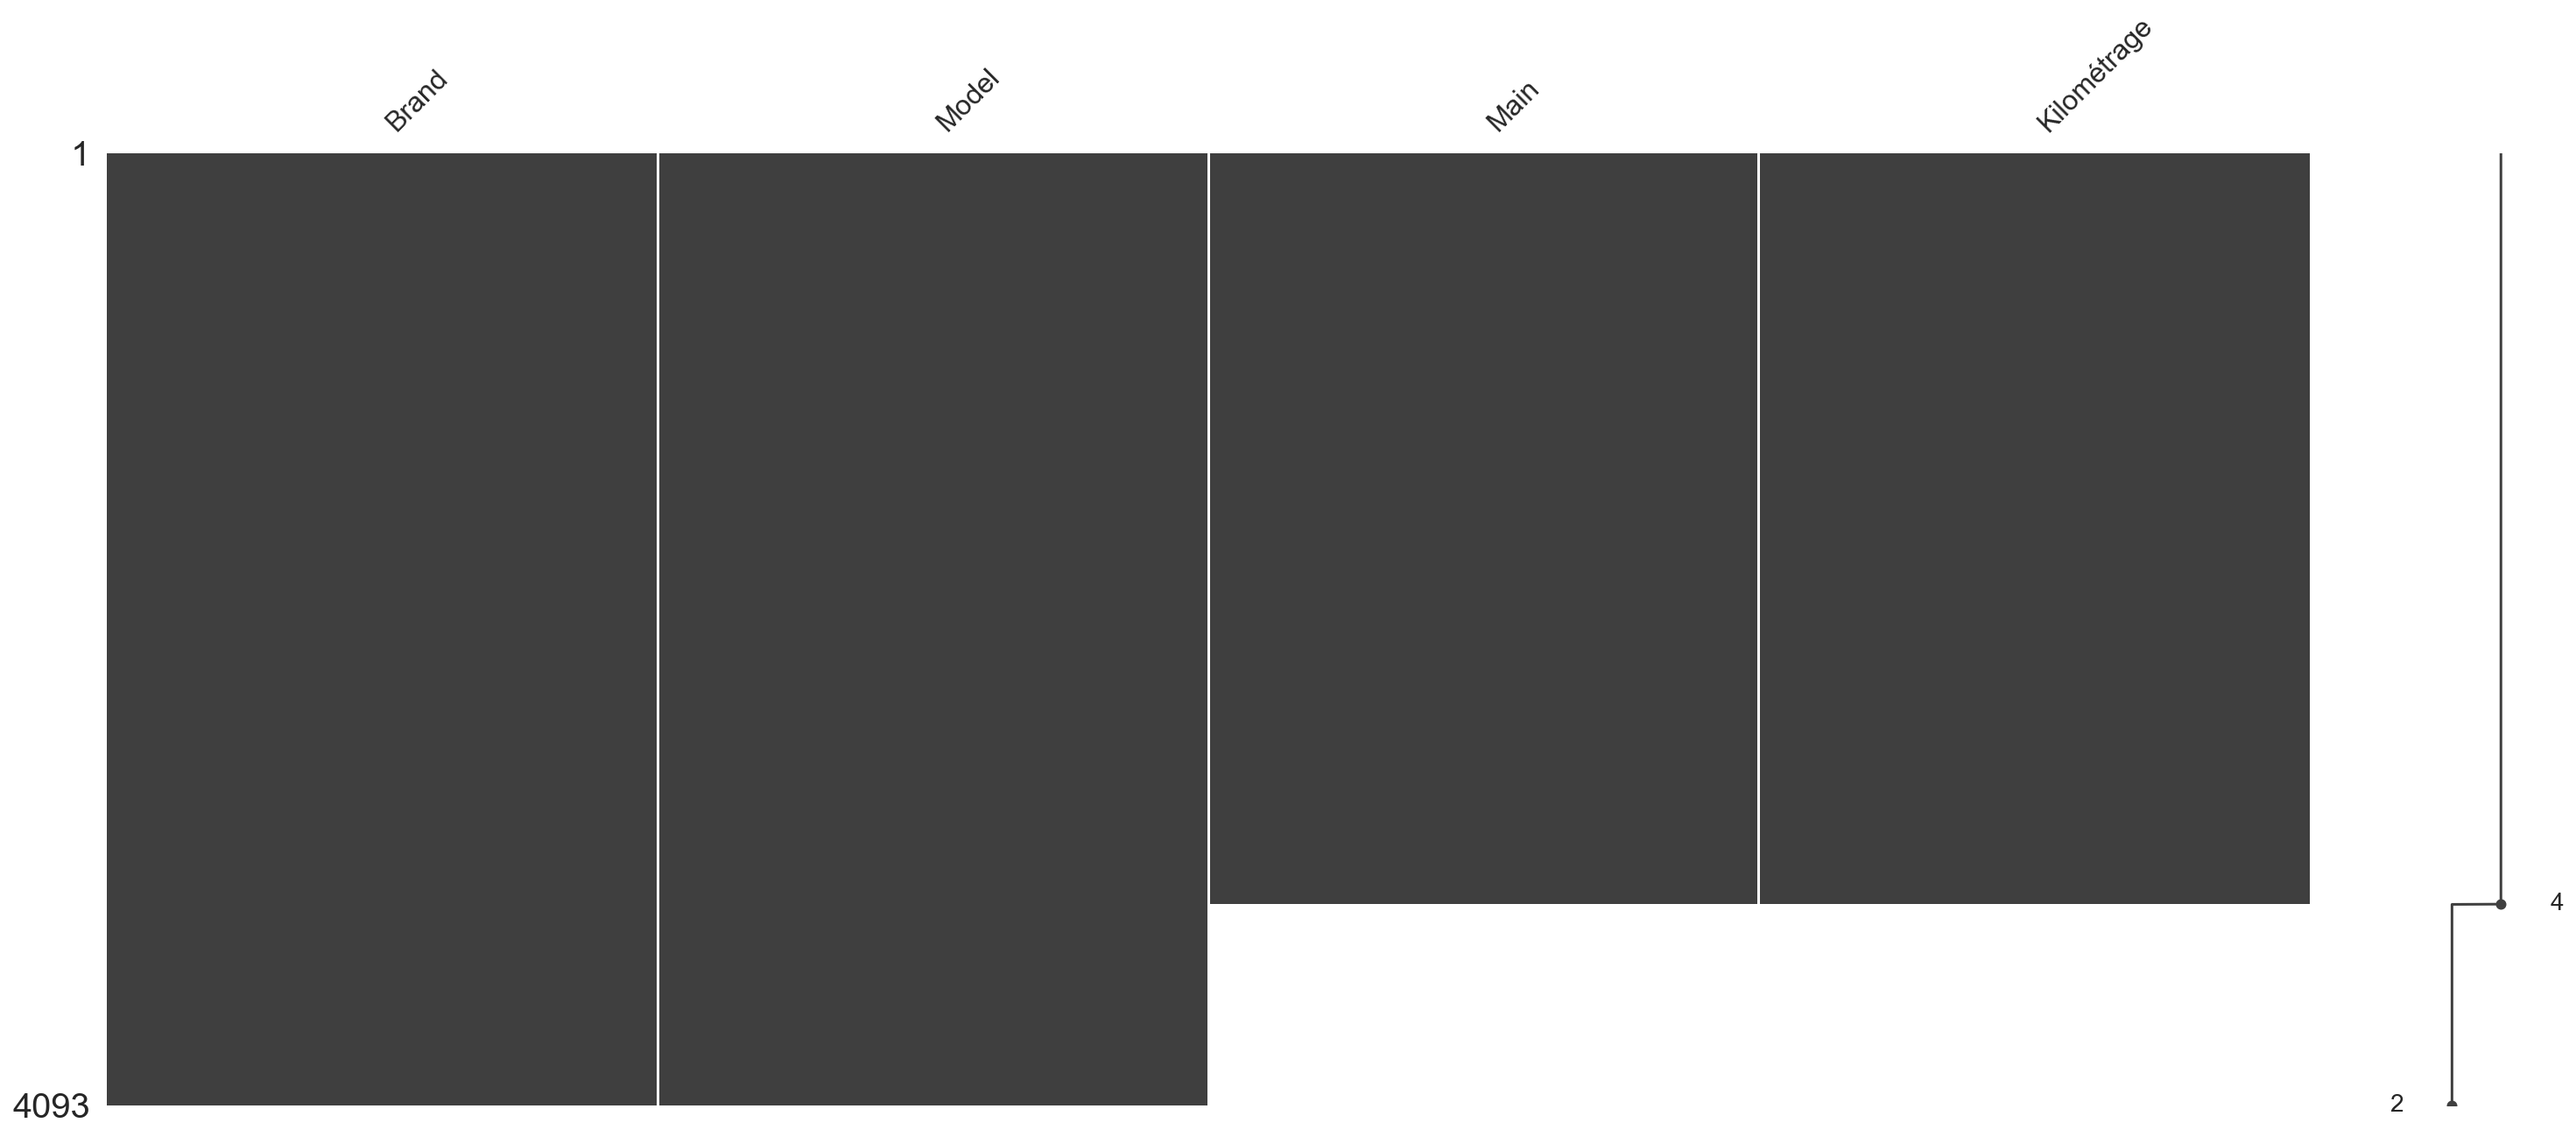

In [38]:
# Visualizing the missingness on sorted values :
msno.matrix(cars[['Brand','Model','Main','Kilométrage']].sort_values(by = 'Kilométrage'))
plt.show()

We can see that rows with no Millieage (Kilométrage) has no Main column value which means that they are new

**so will fill missing values with 'Nouveau'**

In [39]:
# fill missing values with 'Nouveau' attribute
cars.Main.fillna("Nouveau", inplace=True)

In [40]:
# let's check
cars['Main'].value_counts()

Seconde     1621
Première    1608
Nouveau      864
Name: Main, dtype: int64

In [41]:
# And no missing values
cars['Main'].isna().sum()

0

> *Dealing with Kilométrage feature:*

**Kilométrage or Milleage stands for how many kilometers did the car has been driven**

In [42]:
# count null values ( for new cars and set them into 0)
print("we have {} missing value".format(cars['Kilométrage'].isna().sum()))
# fill missing values with 0 value
cars.Kilométrage.fillna(0, inplace=True)
# count null values after filling missing values
print("we have {} missing value after".format(cars['Kilométrage'].isna().sum()))

we have 864 missing value
we have 0 missing value after


In [43]:
# check the type of this feature: must be a float
dict(cars.dtypes)['Kilométrage']

dtype('O')

We have a string, let's convert it into float

In [44]:
def ConvertMilleage(milleage):
    mill=str(milleage).split()[0]
    mill=mill.replace(".","")
    return int(mill)

In [45]:
cars.loc[cars["Kilométrage"].notnull(), 'Kilométrage']=cars["Kilométrage"].apply(ConvertMilleage)

In [46]:
# check the type of this feature: must be a float
dict(cars.dtypes)['Kilométrage']

dtype('int64')

Finally, we have int values for Kilométrage

In [47]:
cars.columns.sort

<bound method Index.sort of Index(['Brand', 'Model', 'Version', 'Price', 'Modèle', 'Ville', 'Vendeur',
       'Main', 'Kilométrage', 'Carburant', 'Transmision',
       'Année de mise en circulation', '1ère main', 'Dédouanée',
       'Motorisation', 'Puissance fiscale', 'Puissance dynamique',
       'Couleur extérieure', 'Etat du véhicule', 'Climatisation',
       'Système audio', 'Vitres électriques', 'Sièges électriques',
       'Ordinateur de bord', 'Start & Stop', 'Régulateur de vitesse',
       'Allumage auto. des feux', 'Détecteur de pluie', 'Commandes au volant',
       'Ecran tactile', 'Rétroviseurs électriques',
       'Rétroviseurs rabattables électriquement', 'Ouverture auto. du coffre',
       'Démarrage mains libres', 'Banquette arrière rabattable 1/3-2/3',
       'Aide au stationnement', 'Caméra de recul', 'Bluetooth',
       'Système de navigation', 'Jantes aluminium', 'Volant cuir', 'Sellerie',
       'Vitres teintées', 'Feux de jour', 'Feux à LED', 'Phares Xénon',
     

> *Dealing with Carburant feature:*

**Carburant  stands for the type of carburant used, diesel or gazoil, or hybrid..**

In [48]:
# print the value count for Carburant feature:
cars['Carburant'].value_counts()

Diesel        2801
Essence        402
Hybride          7
Electrique       1
Name: Carburant, dtype: int64

In [49]:
# checking missing values
cars['Carburant'].isna().sum()

882

New cars has A different column name which is 'Energie', so let's fusion these two columns:

In [50]:
# print the value count for Carburant feature:
cars['Energie'].value_counts()

Diesel        552
Essence       172
Hybride       102
Electrique     21
Name: Energie, dtype: int64

In [51]:
cars.loc[cars["Carburant"].isna(), 'Carburant']=cars.loc[cars["Energie"].notnull(), 'Energie']

In [52]:
# print the value count for Carburant feature:
cars['Carburant'].value_counts()

Diesel        3353
Essence        574
Hybride        109
Electrique      22
Name: Carburant, dtype: int64

In [53]:
# checking missing values
cars['Carburant'].isna().sum()

35

In [54]:
# replace missing values with themost frequent values in the region (Simple Imputer)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Carburant'] = imputer.fit_transform(cars['Carburant'].to_numpy().reshape(-1,1))

In [55]:
# checking missing values
cars['Carburant'].isna().sum()

0

In [56]:
# drop Energie column:
Columns_to_drop.append("Energie")

> *Dealing with Transmision feature*

Transmission can be manual, semi-automatic or manual

In [57]:
# print the value count for Carburant feature:
cars['Transmision'].value_counts()

Manuelle       1718
Automatique    1511
Name: Transmision, dtype: int64

we have another feature called Boite a vitesse which stands for the same thing

In [58]:
# print the value count for Carburant feature:
cars['Boîte à vitesse'].value_counts()

Automatique 8 rapports à double embrayage             236
Manuelle 6 rapports                                   101
Manuelle 5 rapports                                    93
Automatique 9G-Tronic                                  82
Automatique S-Tronic 7 rapports à double embrayage     41
Automatique 6 rapports                                 38
Automatique 8 rapports                                 35
Automatique 7 rapports à double embrayage              29
Automatique 6 rapports à double embrayage              28
Automatique Séquentielle à 6 rapports                  19
Automatique Séquentielle à 7 rapports                  18
Automatique -                                          16
Automatique 7 rapports à variation continue            16
Automatique TipTronic à 8 rapports                     15
Automatique Séquentielle à 8 rapports                  15
Automatique 8G-DCT                                     10
Automatique 5 rapports                                  7
Automatique 7 

In [59]:
def ConvertTransmission(transmission):
    tran=str(transmission).split()
    return tran[0]

In [60]:
# let's split the column values and keep  automatique / manuelle as values only
cars.loc[cars["Boîte à vitesse"].notnull(), 'Boîte à vitesse']=cars["Boîte à vitesse"].apply(ConvertTransmission)

In [61]:
# join the two columns:
cars.loc[cars["Transmision"].isna(), 'Transmision']=cars.loc[cars["Boîte à vitesse"].notnull(), 'Boîte à vitesse']

In [62]:
# replace missing values with themost frequent values in the region (Simple Imputer)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Transmision'] = imputer.fit_transform(cars['Transmision'].to_numpy().reshape(-1,1))

In [63]:
# print the value count for Carburant feature:
cars['Transmision'].isna().sum()

0

In [64]:
Columns_to_drop=Columns_to_drop+['Année de mise en circulation', '1ère main', 'Dédouanée']


> *Dealing with 'Motorisation' feature*



In [65]:
# print the value count for Carburant feature:
cars['Motorisation'].value_counts()

Diesel        2801
Essence        402
Hybride          7
Electrique       1
Name: Motorisation, dtype: int64

This column is repetition of Carburant column, let's drop it

In [66]:
Columns_to_drop.append("Motorisation")

> *Dealing with 'Puissance fiscale' feature*

This feature is the same as puissance réelle. so we will keep only one feature.


In [67]:
# print the value count for Puissance fiscale feature:
cars['Puissance fiscale'].value_counts()

6 cv     1379
8 cv     1122
-         391
7 cv      332
12 cv     195
9 cv      179
11 cv     140
5 cv      109
10 cv      45
17 cv      37
14 cv      15
25 cv      14
13 cv      11
15 cv      11
21 cv      10
4 cv        9
29 cv       8
- cv        7
20 cv       7
18 cv       6
06 cv       6
22 cv       6
19 cv       4
85 cv       4
23 cv       3
70 cv       2
07 cv       2
cv          2
24 cv       2
16 cv       2
08 cv       2
75 cv       2
90 cv       2
3 cv        1
37 cv       1
28 cv       1
47 cv       1
81 cv       1
26 cv       1
73 cv       1
95 cv       1
1 cv        1
2 cv        1
92 cv       1
27 cv       1
Name: Puissance fiscale, dtype: int64

In [68]:
# print the value count for Carburant feature:
cars['Puissance fiscale'].isna().sum()

15

In [69]:
# replace missing values with most frequent items
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Puissance fiscale'] = imputer.fit_transform(cars['Puissance fiscale'].to_numpy().reshape(-1,1))

In [70]:
# replace -, "cv" and "- cv" value by  7 cv
def ConvertPuissance(puissance):
    if puissance=="- cv" or puissance=="-" or puissance=="cv":
        return 7
    elif puissance!=np.nan:
        return int(str(puissance).split()[0])
    else: 
        return puissance

In [71]:
cars.loc[cars["Puissance fiscale"].notnull(), 'Puissance fiscale']=cars["Puissance fiscale"].apply(ConvertPuissance)

In [72]:
# checkin if there is any other missing values

cars['Puissance fiscale'].isna().sum()

0

In [73]:
# converting to float
cars['Puissance fiscale'] = pd.to_numeric(cars['Puissance fiscale'],errors='coerce')

> *Dealing with Couleur exterieure feature*

External color

In [74]:
 #print the value count for Couleur extérieure feature:
cars['Couleur extérieure'].isna().sum()

864

In [75]:

# replace missing values with most frequent colors
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Couleur extérieure'] = imputer.fit_transform(cars['Couleur extérieure'].to_numpy().reshape(-1,1))

In [76]:
# print the value count for Couleur extérieure feature:
cars['Couleur extérieure'].isna().sum()

0

Let's replace cars with no colors feature with 'autre couleur' as feature.

In [77]:
def FillColor(color):
    if color=="-":
        return "Autre Couleur"
    else:
        return color
        

In [78]:
cars.loc[cars["Couleur extérieure"].notnull(), 'Couleur extérieure']=cars["Couleur extérieure"].apply(FillColor)

In [79]:
# print the value count for Couleur extérieure feature:
cars['Couleur extérieure'].value_counts()

Noir             1773
Blanc             433
Gris              305
Gris foncé        304
Autre Couleur     294
Gris clair        244
Bleu foncé        159
Autre couleur     100
Rouge              77
Bleu               75
Marron             74
Beige              54
Blanc cassé        42
Bleu ciel          30
Marron clair       27
Vert foncé         25
Bordeau            24
Jaune d'or         19
Vert               13
Violet              9
Orange              6
Rose                3
Jaune               3
Name: Couleur extérieure, dtype: int64

In [80]:
cars.columns

Index(['Brand', 'Model', 'Version', 'Price', 'Modèle', 'Ville', 'Vendeur',
       'Main', 'Kilométrage', 'Carburant', 'Transmision',
       'Année de mise en circulation', '1ère main', 'Dédouanée',
       'Motorisation', 'Puissance fiscale', 'Puissance dynamique',
       'Couleur extérieure', 'Etat du véhicule', 'Climatisation',
       'Système audio', 'Vitres électriques', 'Sièges électriques',
       'Ordinateur de bord', 'Start & Stop', 'Régulateur de vitesse',
       'Allumage auto. des feux', 'Détecteur de pluie', 'Commandes au volant',
       'Ecran tactile', 'Rétroviseurs électriques',
       'Rétroviseurs rabattables électriquement', 'Ouverture auto. du coffre',
       'Démarrage mains libres', 'Banquette arrière rabattable 1/3-2/3',
       'Aide au stationnement', 'Caméra de recul', 'Bluetooth',
       'Système de navigation', 'Jantes aluminium', 'Volant cuir', 'Sellerie',
       'Vitres teintées', 'Feux de jour', 'Feux à LED', 'Phares Xénon',
       'Barres de toit', 'Toit', 

> *Dealing with 'Etat du vehicule' feature*

In [81]:

# print the value count for Etat du véhicule feature:
cars['Etat du véhicule'].value_counts()

Excellent      1103
Très bon        812
Comme neuve     781
-               296
Bon             205
Correct          29
Avec dégât        3
Name: Etat du véhicule, dtype: int64

In [82]:
# print the value count for Etat du véhicule feature:
cars['Etat du véhicule'].isna().sum()

864

In [83]:

def FillState(state):
    if state=="-":
        return "Bon"
    elif math.isnan(state):
        return "neuve"
    else:
        return state
def FillNan(state):
    return "Neuve"
        

In [84]:
#cars.loc[:, 'Etat du véhicule']=cars["Etat du véhicule"].apply(FillState)
cars.loc[cars["Etat du véhicule"].isna(), 'Etat du véhicule']=cars["Etat du véhicule"].apply(FillNan)

In [85]:
# print the value count for Etat du véhicule feature:
cars['Etat du véhicule'].value_counts()

Excellent      1103
Neuve           864
Très bon        812
Comme neuve     781
-               296
Bon             205
Correct          29
Avec dégât        3
Name: Etat du véhicule, dtype: int64

> *Dealing with 'Climatisation' feature*

In [86]:
# print the value count for Climatisation feature:
cars['Climatisation'].value_counts()

manuelle             1334
auto. Bi-zone        1128
auto.                 723
non                   577
auto. Tri-zone        173
auto. Multi-zone       80
auto. Quadri-zone      62
تلقاءي.                 1
Name: Climatisation, dtype: int64

In [87]:
# print the value count for Climatisation feature:
cars['Climatisation'].isna().sum()

15

In [88]:
# replace missing values with most frequent colors
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Climatisation'] = imputer.fit_transform(cars['Climatisation'].to_numpy().reshape(-1,1))

Let's change تلقاءي to auto.

In [89]:
cars.loc[cars["Climatisation"]=="تلقاءي.", 'Climatisation']=cars["Climatisation"].apply(lambda x: "auto.")

In [90]:
# print the value count for Climatisation feature:
cars['Climatisation'].value_counts()

manuelle             1349
auto. Bi-zone        1128
auto.                 724
non                   577
auto. Tri-zone        173
auto. Multi-zone       80
auto. Quadri-zone      62
Name: Climatisation, dtype: int64

> *Dealing with 'Système audio'*

In [91]:

# print the value count for Système audio feature:
cars['Système audio'].value_counts()

Radio, USB                801
Radio, CD, MP3            686
Radio CD, MP3, USB        591
Radio CD, SD, USB         259
Radio, CD                 251
Radio, CD, USB            239
Radio CD, DVD, SD, USB    230
Radio, USB, SD            171
Radio, MP3, USB           156
-                         143
Radio                     109
Radio, CD, DVD             98
Radio CD, MP3, SD          47
Radio CD, DVD, USB         42
4                          39
0                          37
3                          36
Radio CD, DVD, SD          33
Radio, MP3                 23
Radio, CD, SD              21
non                        15
2                          11
Radio CD/MP3               11
Radio USB                  10
Radio MP3                   8
Radio, SD                   4
1                           3
Radio-CD                    2
Radio-CD/mp3                2
Name: Système audio, dtype: int64

All cars have the same feature approximately, so better to drop this feature!

In [92]:
Columns_to_drop.append("Système audio")

> *Dealing with 'Vitres électriques' feature*

In [93]:
# print the value count for Vitres électriques feature:
cars['Vitres électriques'].value_counts()

Electrique AV/AR    2485
Electrique AV        973
-                    607
non                    8
Electrique AR          5
Name: Vitres électriques, dtype: int64

In [94]:
# count missing values  for Vitres électriques feature:
cars['Vitres électriques'].value_counts()

Electrique AV/AR    2485
Electrique AV        973
-                    607
non                    8
Electrique AR          5
Name: Vitres électriques, dtype: int64

In [95]:
# print the value count for Climatisation feature:
cars['Vitres électriques'].isna().sum()

15

In [96]:
# replace missing values with most frequent 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Vitres électriques'] = imputer.fit_transform(cars['Vitres électriques'].to_numpy().reshape(-1,1))

In [97]:
# change - , non with Electrique AV, and Electrique AR with Electrique Av/AR
def SetWindows(window):
    if window=="-" or window=="non":
        return "Electrique AV"
    elif window=="Electrique AR":
        return "Electrique AV/AR"
    else:
        return window

In [98]:
cars.loc[:, 'Vitres électriques']=cars["Vitres électriques"].apply(SetWindows)

In [99]:
# count missing values  for Vitres électriques feature:
cars['Vitres électriques'].value_counts()

Electrique AV/AR    2505
Electrique AV       1588
Name: Vitres électriques, dtype: int64

> **Dealing with 'Sièges électriques' feature**

In [100]:

# count missing values  for Sièges électriques feature:
cars['Sièges électriques'].value_counts()

non                       2752
Conducteur et Passager     739
Conducteur                 433
Tous les passagers         110
Passager                    15
Name: Sièges électriques, dtype: int64

In [101]:
#print the value count for Sièges électriques feature:
cars['Sièges électriques'].isna().sum()

44

In [102]:
# replace missing values with most frequent 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Sièges électriques'] = imputer.fit_transform(cars['Sièges électriques'].to_numpy().reshape(-1,1))

In [103]:
# change 'Passager' with 'Conducteur and passager'
def FixSeats(seat):
    if seat=="Passager":
        return "Conducteur et Passager"
    else:
        return seat

In [104]:
cars.loc[:, 'Sièges électriques']=cars["Sièges électriques"].apply(FixSeats)

In [105]:
# count missing values  for Sièges électriques feature:
cars['Sièges électriques'].value_counts()

non                       2796
Conducteur et Passager     754
Conducteur                 433
Tous les passagers         110
Name: Sièges électriques, dtype: int64

In [106]:
cars.columns

Index(['Brand', 'Model', 'Version', 'Price', 'Modèle', 'Ville', 'Vendeur',
       'Main', 'Kilométrage', 'Carburant', 'Transmision',
       'Année de mise en circulation', '1ère main', 'Dédouanée',
       'Motorisation', 'Puissance fiscale', 'Puissance dynamique',
       'Couleur extérieure', 'Etat du véhicule', 'Climatisation',
       'Système audio', 'Vitres électriques', 'Sièges électriques',
       'Ordinateur de bord', 'Start & Stop', 'Régulateur de vitesse',
       'Allumage auto. des feux', 'Détecteur de pluie', 'Commandes au volant',
       'Ecran tactile', 'Rétroviseurs électriques',
       'Rétroviseurs rabattables électriquement', 'Ouverture auto. du coffre',
       'Démarrage mains libres', 'Banquette arrière rabattable 1/3-2/3',
       'Aide au stationnement', 'Caméra de recul', 'Bluetooth',
       'Système de navigation', 'Jantes aluminium', 'Volant cuir', 'Sellerie',
       'Vitres teintées', 'Feux de jour', 'Feux à LED', 'Phares Xénon',
       'Barres de toit', 'Toit', 

> **Dealing with 'Ordinateur de bord' feature**

In [107]:
# count missing values  for Ordinateur de bord feature:
cars['Ordinateur de bord'].value_counts()

oui    2858
non    1220
Name: Ordinateur de bord, dtype: int64

In [108]:
#print the value count for Ordinateur de bord feature:
cars['Ordinateur de bord'].isna().sum()

15

In [109]:
# replace missing values with most frequent 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars['Ordinateur de bord'] = imputer.fit_transform(cars['Ordinateur de bord'].to_numpy().reshape(-1,1))

> **Dealing with 'Start & Stop' feature**

In [110]:
#count values for start and stop feature
cars['Start & Stop'].value_counts()

non    2466
oui    1612
Name: Start & Stop, dtype: int64

In [111]:
#print the value count for Start & Stop feature:
cars['Start & Stop'].isna().sum()

15

we will let the missing values until the end and fill them once.

> **Dealing with 'Régulateur de vitesse' feature**

In [112]:

#count values for Régulateur de vitesse feature
cars['Régulateur de vitesse'].value_counts()

oui    2830
non    1248
Name: Régulateur de vitesse, dtype: int64

In [113]:
#print the value count for Régulateur de vitesse feature:
cars['Régulateur de vitesse'].isna().sum()

15

Missing values will be handled at the end

> **Dealing with 'Allumage auto. des feux' feature**

In [114]:

#count values for Allumage auto. des feux feature
cars['Allumage auto. des feux'].value_counts()

oui    2184
non    1894
Name: Allumage auto. des feux, dtype: int64

In [115]:
#print the value count for Allumage auto. des feux feature:
cars['Allumage auto. des feux'].isna().sum()

15

Missing values will be treated at the end

> **Dealing with 'Détecteur de pluie' feature**

In [116]:

#count values for Détecteur de pluie feature
cars['Détecteur de pluie'].value_counts()

non    2096
oui    1982
Name: Détecteur de pluie, dtype: int64

In [117]:

#print the value count for Détecteur de pluie feature:
cars['Détecteur de pluie'].isna().sum()

15

> **Dealing with 'Commandes au volant' feature**

In [118]:

#count values for Commandes au volant feature
cars['Commandes au volant'].value_counts()

oui    2831
non    1247
Name: Commandes au volant, dtype: int64

In [119]:
#print the value count for Commandes au volant feature:
cars['Commandes au volant'].isna().sum()

15

> **Dealing with 'Ecran tactile' feature**

In [120]:

#count values for Ecran tactile feature
cars['Ecran tactile'].value_counts()

non    2104
oui    1974
Name: Ecran tactile, dtype: int64

In [121]:
#print the value count for Ecran tactile feature:
cars['Ecran tactile'].isna().sum()

15

> **Dealing with 'Rétroviseurs électriques' feature**

In [122]:

#count values for Rétroviseurs électriques feature
cars['Rétroviseurs électriques'].value_counts()

oui    2744
non    1334
Name: Rétroviseurs électriques, dtype: int64

In [123]:
#count missing values for Rétroviseurs électriques feature
cars['Rétroviseurs électriques'].isna().sum()

15

> **Dealing with 'Rétroviseurs Rabattable électriquement' feature**

We will delete this feature, since it's similar to the previous one

In [124]:
Columns_to_drop.append("Rétroviseurs rabattables électriquement")

> **Dealing with 'Ouverture auto. du coffre' feature**

In [125]:

#count values for Ouverture auto. du coffre feature
cars['Ouverture auto. du coffre'].value_counts()

non    2579
oui     650
Name: Ouverture auto. du coffre, dtype: int64

In [126]:
#count missing values for Ouverture auto. du coffre feature
cars['Ouverture auto. du coffre'].isna().sum()

864

This feature is not very important and have a lot of missing values that we can't fill anyway. So let's drop it

In [127]:
Columns_to_drop.append("Ouverture auto. du coffre")

> **Dealing with 'Démarrage mains libres' feature**

In [128]:

#count values for Ouverture Démarrage mains libres feature
cars['Démarrage mains libres'].value_counts()

non    2330
oui    1748
Name: Démarrage mains libres, dtype: int64

In [129]:
#count missing values for Démarrage mains libres feature
cars['Démarrage mains libres'].isna().sum()

15

> **Dealing with 'Banquette arrière rabattable 1/3-2/3' feature**

In [130]:

#count values for OuvertureBanquette arrière rabattable 1/3-2/3 feature
cars['Banquette arrière rabattable 1/3-2/3'].value_counts()

oui    2154
non    1924
Name: Banquette arrière rabattable 1/3-2/3, dtype: int64

**Dealing with 'Aide au stationnement' feature**

In [131]:
#count  values for Aide au stationnement feature
cars['Aide au stationnement'].value_counts()

non                 2318
Avant et Arrière     838
Arrière              787
1                     68
0                     62
-                      4
Avant                  1
Name: Aide au stationnement, dtype: int64

In [132]:

#count missing values for Aide au stationnement feature
cars['Aide au stationnement'].isna().sum()

15

This feature will be droped since, values are not very structured and most of cars doesn't have this feature

In [133]:
Columns_to_drop.append("Aide au stationnement")

> **Dealing with 'Caméra de recul' feature**

In [134]:

#count  values for Caméra de recul feature
cars['Caméra de recul'].value_counts()

non    2413
oui    1665
Name: Caméra de recul, dtype: int64

In [135]:
cars.columns

Index(['Brand', 'Model', 'Version', 'Price', 'Modèle', 'Ville', 'Vendeur',
       'Main', 'Kilométrage', 'Carburant', 'Transmision',
       'Année de mise en circulation', '1ère main', 'Dédouanée',
       'Motorisation', 'Puissance fiscale', 'Puissance dynamique',
       'Couleur extérieure', 'Etat du véhicule', 'Climatisation',
       'Système audio', 'Vitres électriques', 'Sièges électriques',
       'Ordinateur de bord', 'Start & Stop', 'Régulateur de vitesse',
       'Allumage auto. des feux', 'Détecteur de pluie', 'Commandes au volant',
       'Ecran tactile', 'Rétroviseurs électriques',
       'Rétroviseurs rabattables électriquement', 'Ouverture auto. du coffre',
       'Démarrage mains libres', 'Banquette arrière rabattable 1/3-2/3',
       'Aide au stationnement', 'Caméra de recul', 'Bluetooth',
       'Système de navigation', 'Jantes aluminium', 'Volant cuir', 'Sellerie',
       'Vitres teintées', 'Feux de jour', 'Feux à LED', 'Phares Xénon',
       'Barres de toit', 'Toit', 

> **Dealing with 'Bluetooth' feature**

In [136]:

#count  values for Bluetooth feature
cars['Bluetooth'].value_counts()

oui    2779
non    1299
Name: Bluetooth, dtype: int64

In [137]:
#count  missing values for Bluetooth feature
cars['Bluetooth'].isna().sum()

15

> **Dealing with 'Système de navigation' feature**

In [138]:

#count  values for Système de navigation feature
cars['Système de navigation'].value_counts()

non    2542
oui     687
Name: Système de navigation, dtype: int64

since the majority does'nt have the navigation system in addition to missing values for about 1000 car, better to drop this feature

In [139]:
Columns_to_drop.append("Système de navigation")

> **Dealing with 'Jantes aluminium' feature**

In [140]:

#count  values for Jantes aluminium feature
cars['Jantes aluminium'].value_counts()

oui          2050
non          1265
18 pouces     193
17 pouces     186
19 pouces     147
16 pouces     107
20 pouces      73
21 pouces      24
15 pouces      21
14 pouces       7
22 pouces       5
Name: Jantes aluminium, dtype: int64

Let's change all other values (except oui or non) to oui:

In [141]:
def FixWheelSize(wheel):
    if wheel=="18 pouces" or wheel=="17 pouces" or wheel=="19 pouces" or wheel=="16 pouces" or wheel=="20 pouces" or wheel=="21 pouces" or wheel=="15 pouces" or wheel=="14 pouces" or wheel=="22 pouces":
        return "oui"
    else:
        return wheel

In [142]:
cars.loc[:, 'Jantes aluminium']=cars["Jantes aluminium"].apply(FixWheelSize)

In [143]:
#count  values for Jantes aluminium feature
cars['Jantes aluminium'].value_counts()

oui    2813
non    1265
Name: Jantes aluminium, dtype: int64

> **Dealing with 'Volant cuir' feature**

In [144]:

#count  values for Volant cuir feature
cars['Volant cuir'].value_counts()

non    2523
oui    1555
Name: Volant cuir, dtype: int64

> **Dealing with 'Sellerie' feature**

In [145]:
#count  values for Sellerie feature
cars['Sellerie'].value_counts()

Tissu                    2128
Cuir                      944
-                         266
Cuir / Tissu              216
Similicuir                203
Cuir / Alcantra            90
Similicuir / Tissu         83
Alcantara                  62
Alcantara / Tissu          39
Tissu / Velours            27
Cuir / Similicuir          13
Cuir/Alcantra               1
Similicuir / Alcantra       1
Name: Sellerie, dtype: int64

This column is not much important to us, we will drop it.

In [146]:
Columns_to_drop.append('Sellerie')

> **Dealing with 'Vitres teintées' feature**

In [147]:

#count  values for Vitres teintées feature
cars['Vitres teintées'].value_counts()

non    1908
oui    1321
Name: Vitres teintées, dtype: int64

> **Dealing with 'Feux de jour' feature**

In [148]:

#count  values for Feux de jourfeature
cars['Feux de jour'].value_counts()

oui    2399
non    1679
Name: Feux de jour, dtype: int64

> **Dealing with 'Feux à LED' feature**

In [149]:


#count  values for Feux à LED feature
cars['Feux à LED'].value_counts()

non    2246
oui     983
Name: Feux à LED, dtype: int64

> **Dealing with 'Toit' feature**

In [150]:

#count  values for Toit feature
cars['Toit'].value_counts()

Rigide                 3281
Panoramique ouvrant     399
Panoramique             267
Ouvrant                 131
Name: Toit, dtype: int64

In [151]:
# set 'Ouvrant to Panoramique Ouvrant'
def ChangeToit(toit):
    if toit=="Ouvrant":
        return "Panoramique ouvrant"
    else:
        return toit

In [152]:
cars.loc[:, 'Toit']=cars["Toit"].apply(ChangeToit)

> **Dealing with 'Airbags' feature**

In [153]:

#count  values for Airbags feature
cars['Airbags'].value_counts()

oui     2847
non      382
6.0      286
8.0      181
7.0      159
2.0      116
4.0       51
9.0       24
10.0      23
0.0        7
1.0        2
Name: Airbags, dtype: int64

set the values to oui or non instead of numbers:


In [154]:
def ChangeAirbag(airbag):
    if str(airbag) in ["6.0","8.0","7.0","2.0","4.0","9.0","10.0","1.0"]:
        return "oui"
    elif str(airbag)=="0.0":
        return "non"
    else:
        return airbag

In [155]:
cars.loc[:, 'Airbags']=cars["Airbags"].apply(ChangeAirbag)

> **Dealing with 'Couple maxi.' feature**

In [156]:
#count  values for Couple maxi. feature
cars['Couple maxi.'].value_counts()

400 Nm    97
320 Nm    68
250 Nm    55
300 Nm    46
700 Nm    41
          ..
131 Nm     1
825 Nm     1
- Nm       1
127 Nm     1
110 Nm     1
Name: Couple maxi., Length: 84, dtype: int64

In [157]:
#count  missing values for Couple maxi. feature
cars['Couple maxi.'].isna().sum()

3244

This feature should be droped since most of data doesn't have a couple value 

In [158]:
Columns_to_drop.append("Couple maxi.")

> **Dealing with 'Conso. mixte' feature**

In [159]:

#count  values for Conso. mixte feature
cars['Conso. mixte'].value_counts()

5,3 l/100 km    54
4,8 l/100 km    48
4,9 l/100 km    38
4,6 l/100 km    36
4,3 l/100 km    32
                ..
8,3 l/100 km     1
1,5 l/100 km     1
9,8 l/100 km     1
8,2 l/100 km     1
9,5 l/100 km     1
Name: Conso. mixte, Length: 89, dtype: int64

In [160]:
#count  missing values for Conso. mixte feature
cars['Conso. mixte'].isna().sum()

3244

This feature also must be droped

In [161]:
Columns_to_drop.append("Conso. mixte")

> **Dealing with 'Emission CO2' feature**

In [162]:
#count  missing values for Emission CO2 feature
cars['Emission CO2'].isna().sum()

3244

This column will be also droped

In [163]:
Columns_to_drop.append("Emission CO2")

> **Dealing with 'Vitesse maxi.' feature**

In [164]:

#count  values for Vitesse maxi. feature
cars['Vitesse maxi.'].value_counts()

250 km/h    78
180 km/h    46
210 km/h    40
200 km/h    36
230 km/h    35
            ..
204 km/h     1
304 km/h     1
270 km/h     1
209 km/h     1
168 km/h     1
Name: Vitesse maxi., Length: 98, dtype: int64

In [165]:
#count  missing values for Vitesse maxi. feature
cars['Vitesse maxi.'].isna().sum()

3244

this feature will be droped also droped

In [166]:
Columns_to_drop.append('Vitesse maxi.')

> **Dealing with 'Détection de fatigue' feature**

In [167]:
#count  values for Détection de fatigue feature
cars['Détection de fatigue'].value_counts()

non    497
oui    352
Name: Détection de fatigue, dtype: int64

In [168]:
#count  missing values for Détection de fatigue feature
cars['Détection de fatigue'].isna().sum()

3244

This column will be droped.
#### 4️⃣   `Conclusion`  :All the rest of columns will not be considered since they have a lot of missing values :


In [169]:
Columns_to_drop=Columns_to_drop+[
       "Aide au freinage d'urgence","Détection de fatigue","Accélération 0-100 km/h" ,"Boîte à vitesse",
       'Antidémarrage électronique', 'Détecteur de sous-gonflage',
       'Fermeture de portes en roulant', 'Aide au démarrage en cote',"Phares Xénon","Puissance dynamique",
       "Système d'alerte de franchissement de ligne", "Détecteur d'angle mort","Phares Xénon",
       "Système d'alarme", "Moteur", "Energie", "Puissance maxi.", 'Catégorie', 'Carrosserie',
       'Nombre de places', 'Poids à vide', 'Longueur', 'Largeur', 'Hauteur',
       'Empattement', 'Volume de coffre', 'Aide au démarrage en côte',
       'Sélecteur de mode de conduite', "Feux à LED",
       'Phares antibrouillard', 'Préparation ISOFIX',"Vitres teintées",
       'Régulateur de vitesse adaptatif', 'Frein à main électrique',
       'Instrumentation de bord digitale', 'Reconnaissance de panneaux',
       'Affichage Tête-Haute', 'Park Assist Auto.', 'Volant réglable',
       'Coffre électrique', 'Sièges électriques avec fonction mémoire',
       'Système de navigation GPS', 'Connexion Internet', 'Follow-me home',
       'Phares à LED', 'Vitres sur-teintées']

#### 4️⃣   `Task 4`  : filling the rest of missing values :
>To perform this task, will use the most frequent technic:

### 1- Drop the unwanted columns:


In [170]:
cars.drop(list(set(Columns_to_drop)), axis = 1, inplace = True)

In [171]:
# let's see how many missing values do we need:

cars.isna().sum()

Brand                                     0
Model                                     0
Version                                 864
Price                                     0
Modèle                                  864
Main                                      0
Kilométrage                               0
Carburant                                 0
Transmision                               0
Puissance fiscale                         0
Couleur extérieure                        0
Etat du véhicule                          0
Climatisation                             0
Vitres électriques                        0
Sièges électriques                        0
Ordinateur de bord                        0
Start & Stop                             15
Régulateur de vitesse                    15
Allumage auto. des feux                  15
Détecteur de pluie                       15
Commandes au volant                      15
Ecran tactile                            15
Rétroviseurs électriques        

### 2- Fill missing values for version feature

In [172]:
#count  values for Version feature that belong to 'autre version'
len(cars[cars['Version']=="Autre version"])

494

In [173]:
# set missing values to 'autre version':
cars['Version'] = cars['Version'].fillna("Autre version")

In [174]:
#count  values for Version feature that belong to 'autre version'
len(cars[cars['Version']=="Autre version"])

1358

### 3- Fill missing values for Modèle column: new cars are lunched in 2022

In [175]:
# set missing values to 'autre version':
cars['Modèle'] = cars['Modèle'].fillna(pd.to_datetime("2022-01-01"))

### 4- Fill missing values for other columns using SimpleImputer:

In [176]:
# replace missing values with most frequent 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imp = imputer.fit_transform(cars)


In [177]:
# let's see how many missing values do we need:
df=pd.DataFrame(imp)
df.columns=cars.columns
df.index=cars.index
df['Puissance fiscale'] = pd.to_numeric(df['Puissance fiscale'],errors='coerce')
df.isna().sum()

Brand                                   0
Model                                   0
Version                                 0
Price                                   0
Modèle                                  0
Main                                    0
Kilométrage                             0
Carburant                               0
Transmision                             0
Puissance fiscale                       0
Couleur extérieure                      0
Etat du véhicule                        0
Climatisation                           0
Vitres électriques                      0
Sièges électriques                      0
Ordinateur de bord                      0
Start & Stop                            0
Régulateur de vitesse                   0
Allumage auto. des feux                 0
Détecteur de pluie                      0
Commandes au volant                     0
Ecran tactile                           0
Rétroviseurs électriques                0
Démarrage mains libres            

In [178]:
### Convert some columns to floats:
df['Price'] = df['Price'].astype(float)
df['Kilométrage'] = df['Kilométrage'].astype(float)


#### 5️⃣   `Task 5`  : Exploring Data

<Figure size 1440x720 with 0 Axes>

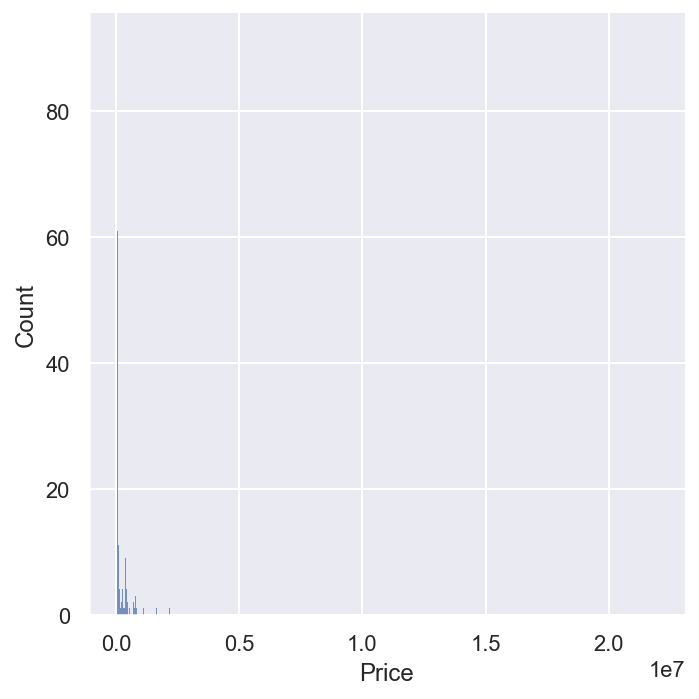

In [179]:
plt.figure(figsize=(20,10))
sns.displot(df['Price'],binwidth=1000)

In [180]:
df.dtypes

Brand                                           object
Model                                           object
Version                                         object
Price                                          float64
Modèle                                  datetime64[ns]
Main                                            object
Kilométrage                                    float64
Carburant                                       object
Transmision                                     object
Puissance fiscale                                int64
Couleur extérieure                              object
Etat du véhicule                                object
Climatisation                                   object
Vitres électriques                              object
Sièges électriques                              object
Ordinateur de bord                              object
Start & Stop                                    object
Régulateur de vitesse                           object
Allumage a

In [181]:
df['Price'].describe(exclude='object')

count    4.093000e+03
mean     2.370478e+05
std      4.787480e+05
min      0.000000e+00
25%      8.800000e+04
50%      1.350000e+05
75%      2.400000e+05
max      2.200000e+07
Name: Price, dtype: float64

<AxesSubplot:ylabel='Price'>

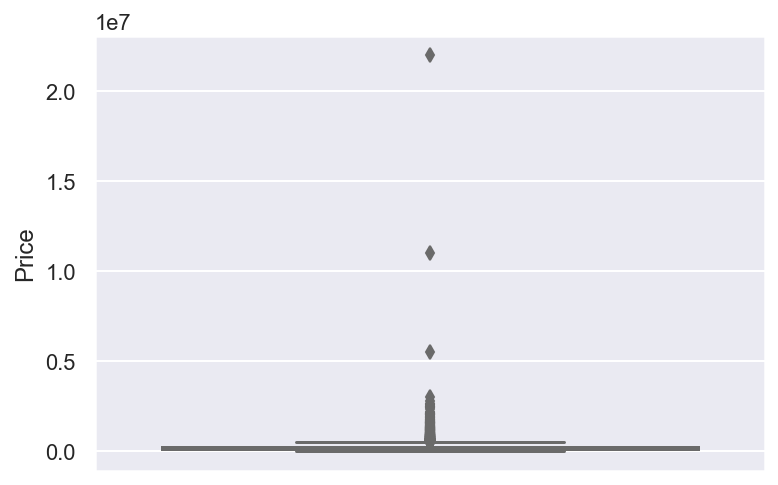

In [182]:
sns.boxplot( y="Price",
                 data=df, palette="Set3")

In [183]:
# Let's check mean  and median
mean=df.Price.mean() #.mean() function returns the mean of the list
median=df.Price.median() #.median() function

# Printing the two values

print('The mean value of prices is : {}'.format(mean))
print('The median value of prices is:  {}'.format(median))
if mean>median:
    print("it's a right-skewed distribution")
elif mean< median:
    print("it's a left-skewed distribution")
else:
    print("it's a normal distribution")
    

The mean value of prices is : 237047.81456144637
The median value of prices is:  135000.0
it's a right-skewed distribution


<AxesSubplot:xlabel='Brand', ylabel='Price'>

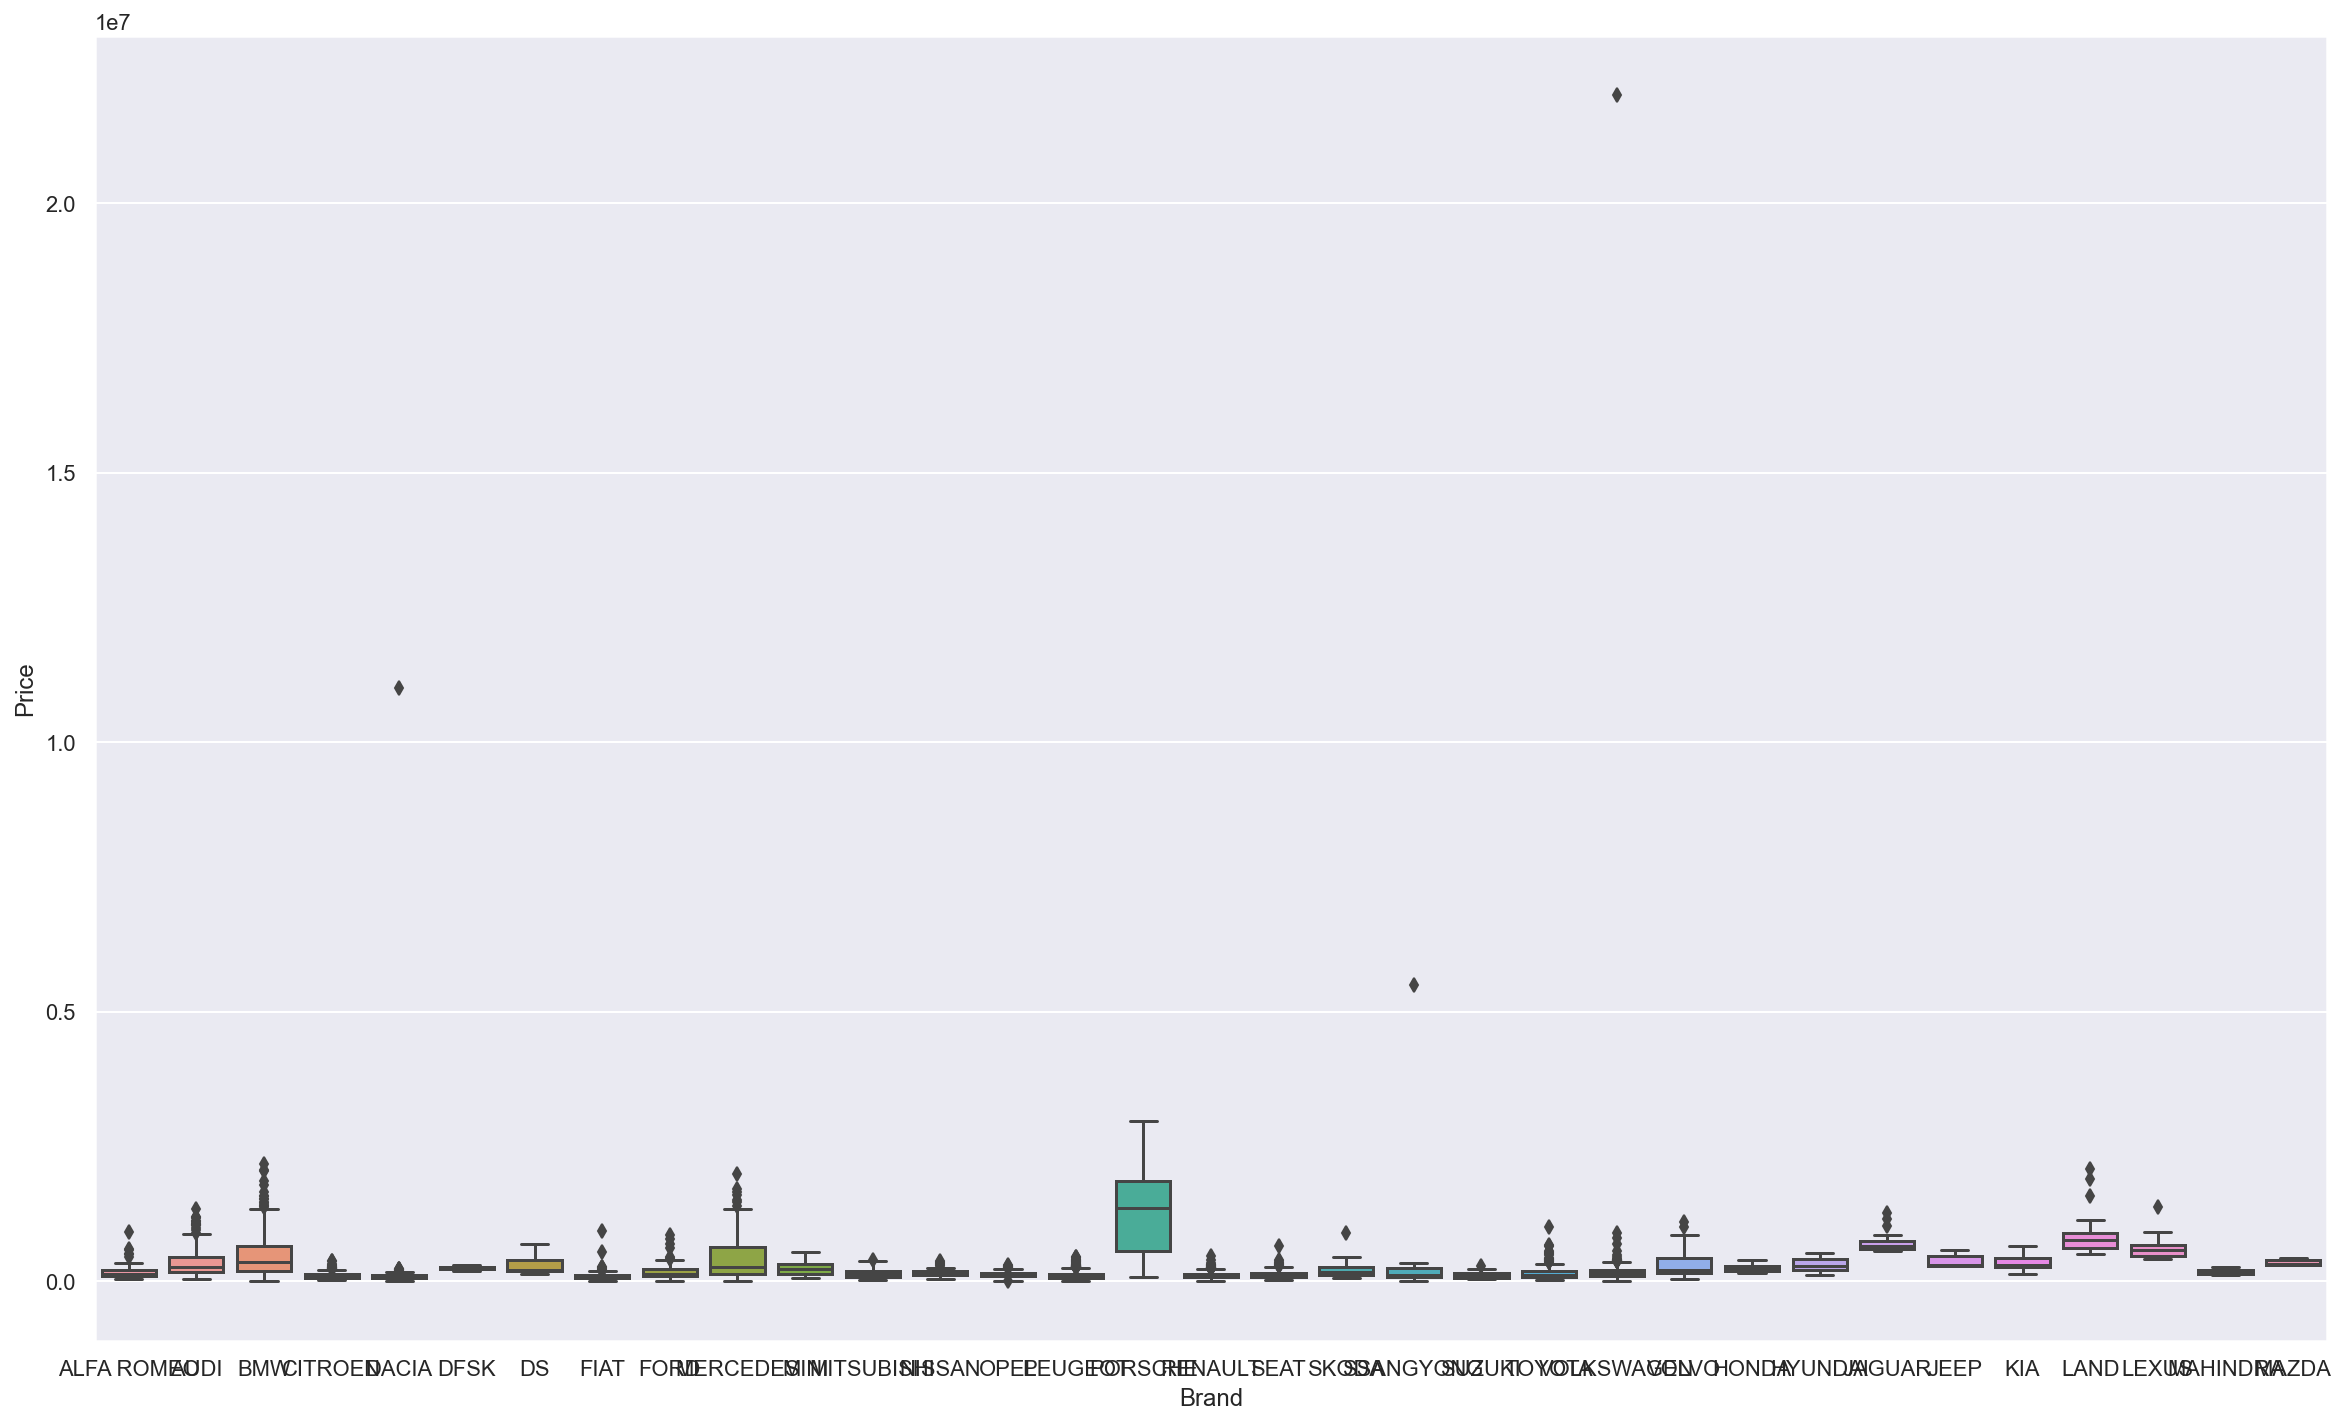

In [184]:
# Show the boxplot
plt.figure(figsize=(20,12))
sns.set(style='darkgrid')
sns.boxplot(x='Brand', y='Price', data=df)

##### **We can see that we have many outliers that should be removed:**

In [185]:
# identifiying outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "Price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  468000.0
Lower Whisker:  -140000.0


In [186]:
# Removing outliers
df = df[(df['Price'] > lower) & (df['Price'] < upper)]

C:\Users\SAAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

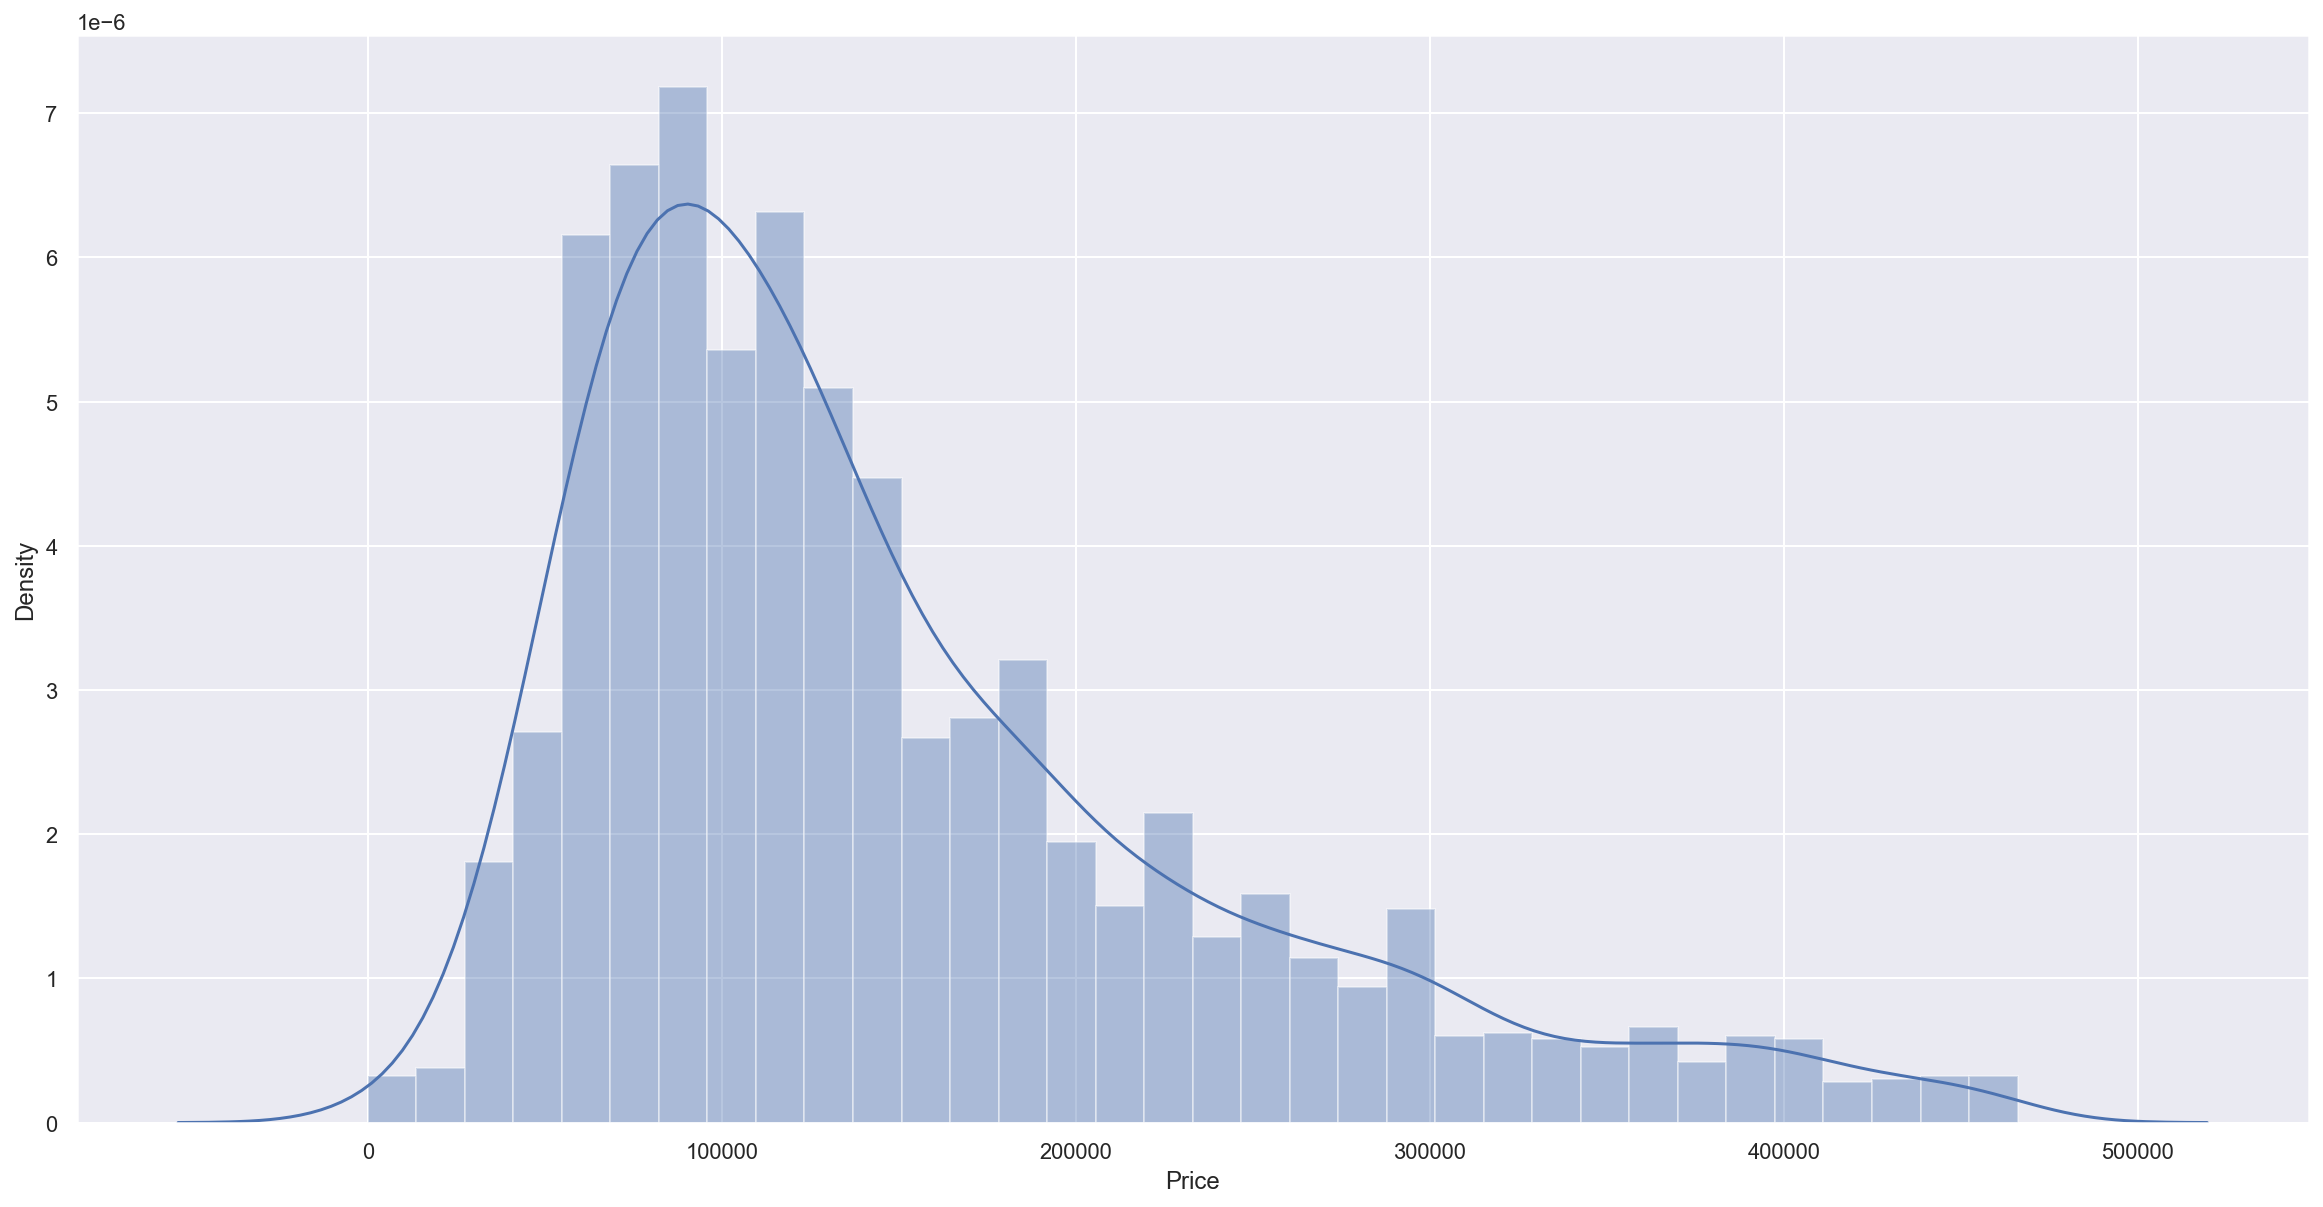

In [187]:
plt.figure(figsize=(20,10))
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Brand', ylabel='Price'>

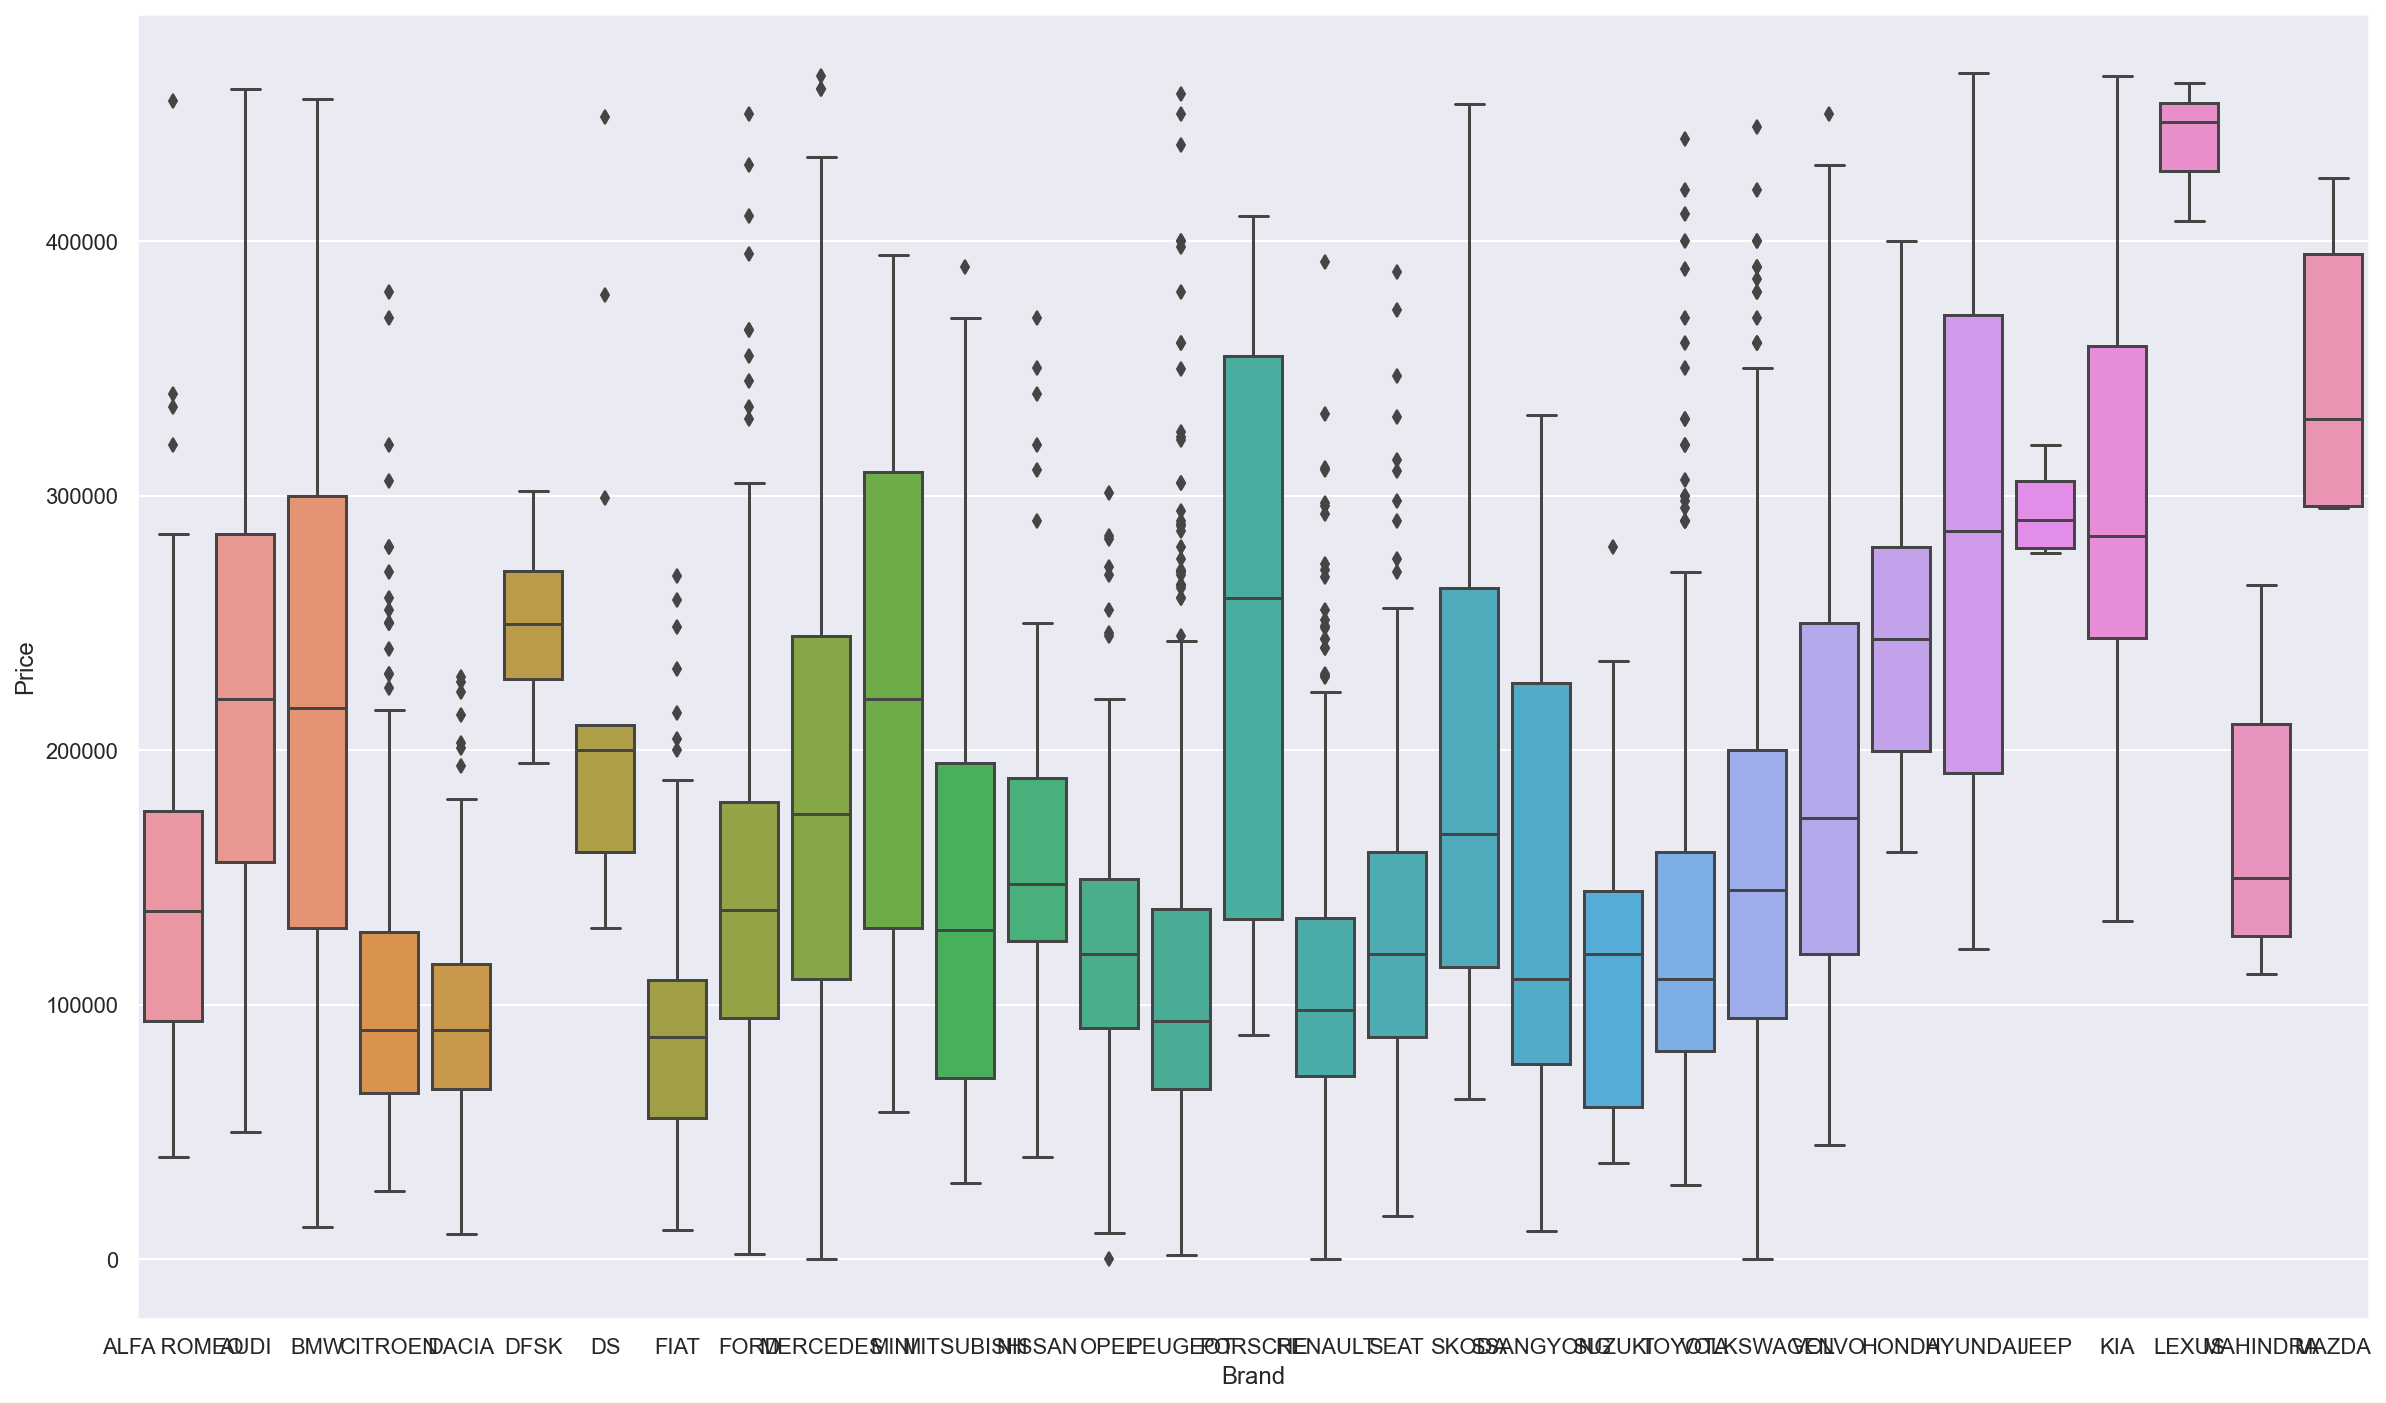

In [188]:
# Show the boxplot
plt.figure(figsize=(20,12))
sns.set(style='darkgrid')
sns.boxplot(x='Brand', y='Price', data=df)

Text(0.5, 1.0, 'Prices of Different BMW Models')

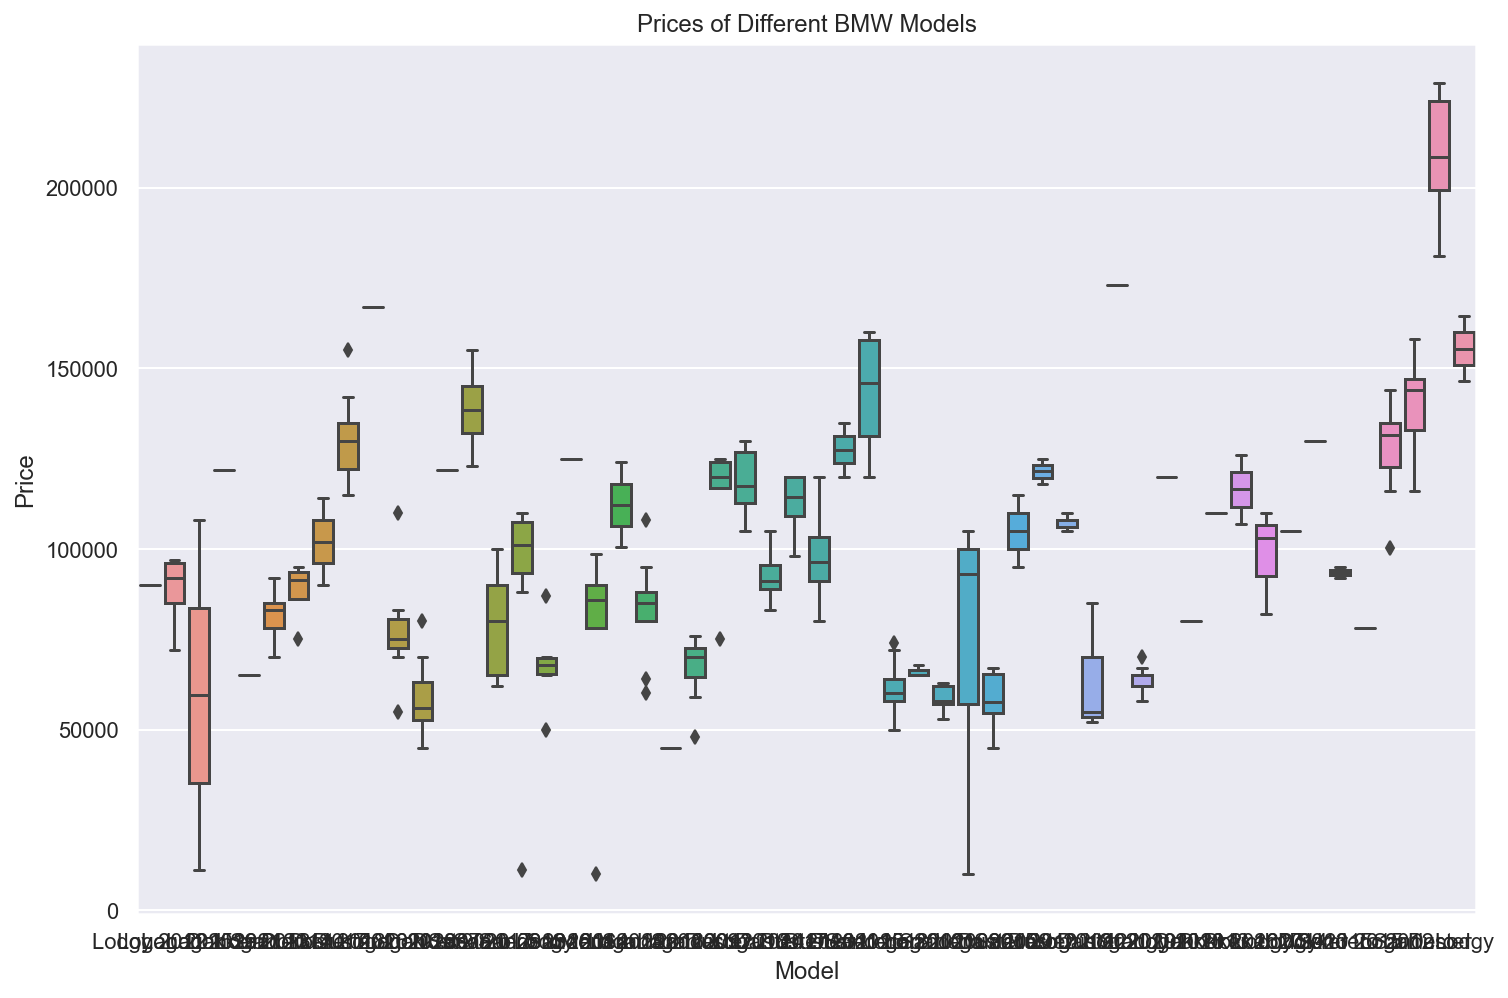

In [189]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Model', y='Price', data=df[df.Brand == 'DACIA']).\
set_title('Prices of Different BMW Models')

#### - Price variation according to Color:

<AxesSubplot:xlabel='Couleur extérieure', ylabel='Price'>

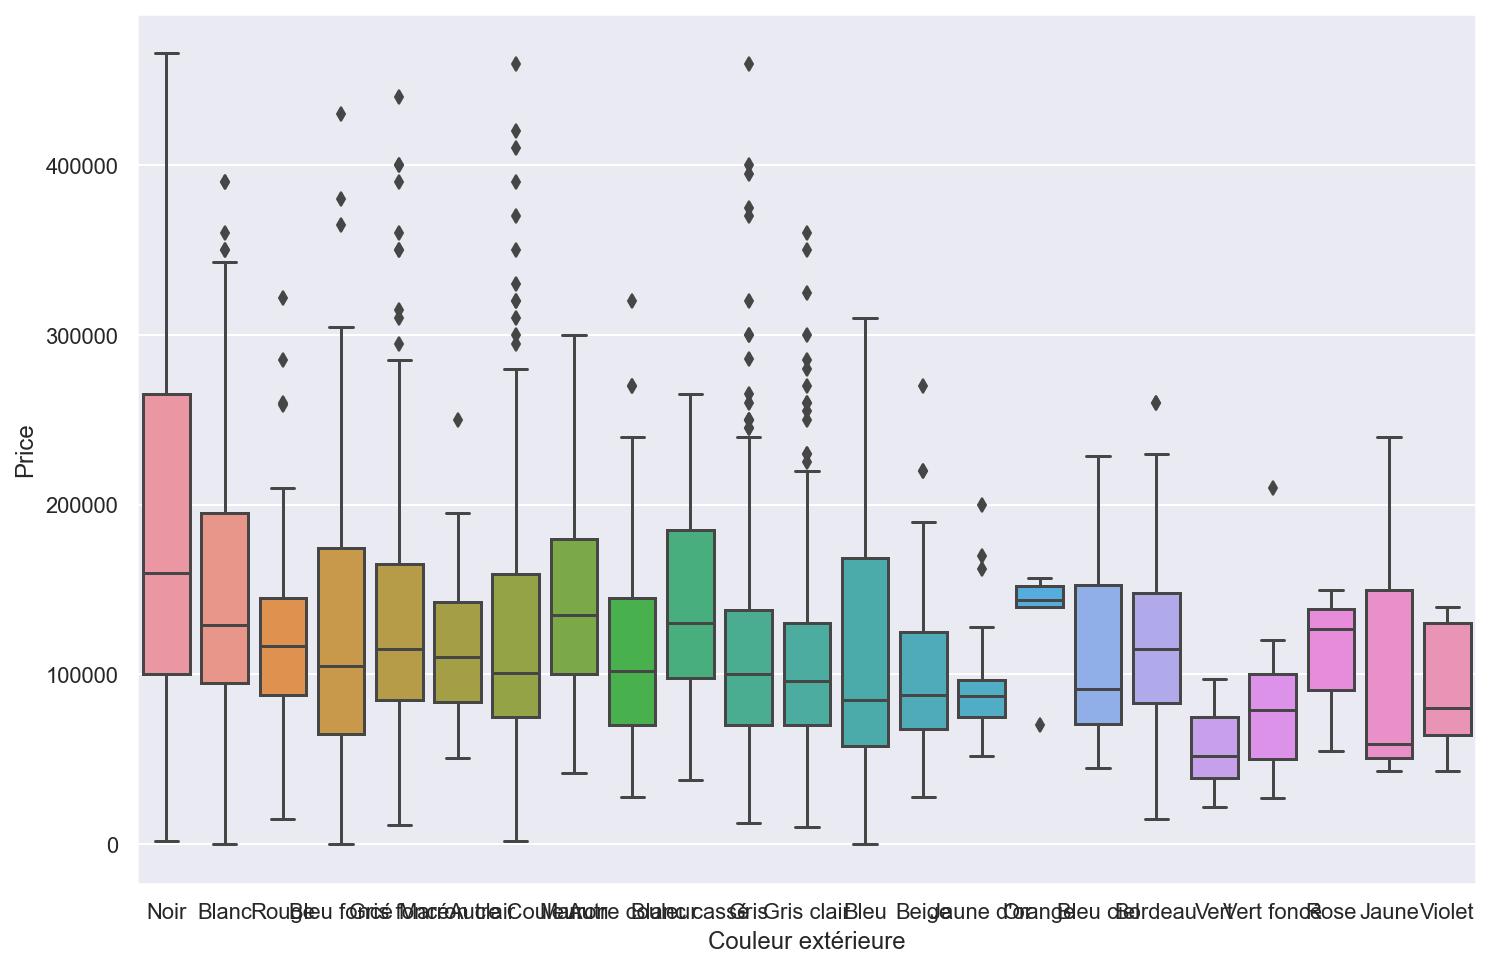

In [190]:

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
sns.boxplot(x='Couleur extérieure', y='Price', data=df)

**`The color has a great effect on price:`** 

C:\Users\SAAD\AppData\Local\Temp/ipykernel_14564/911701776.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


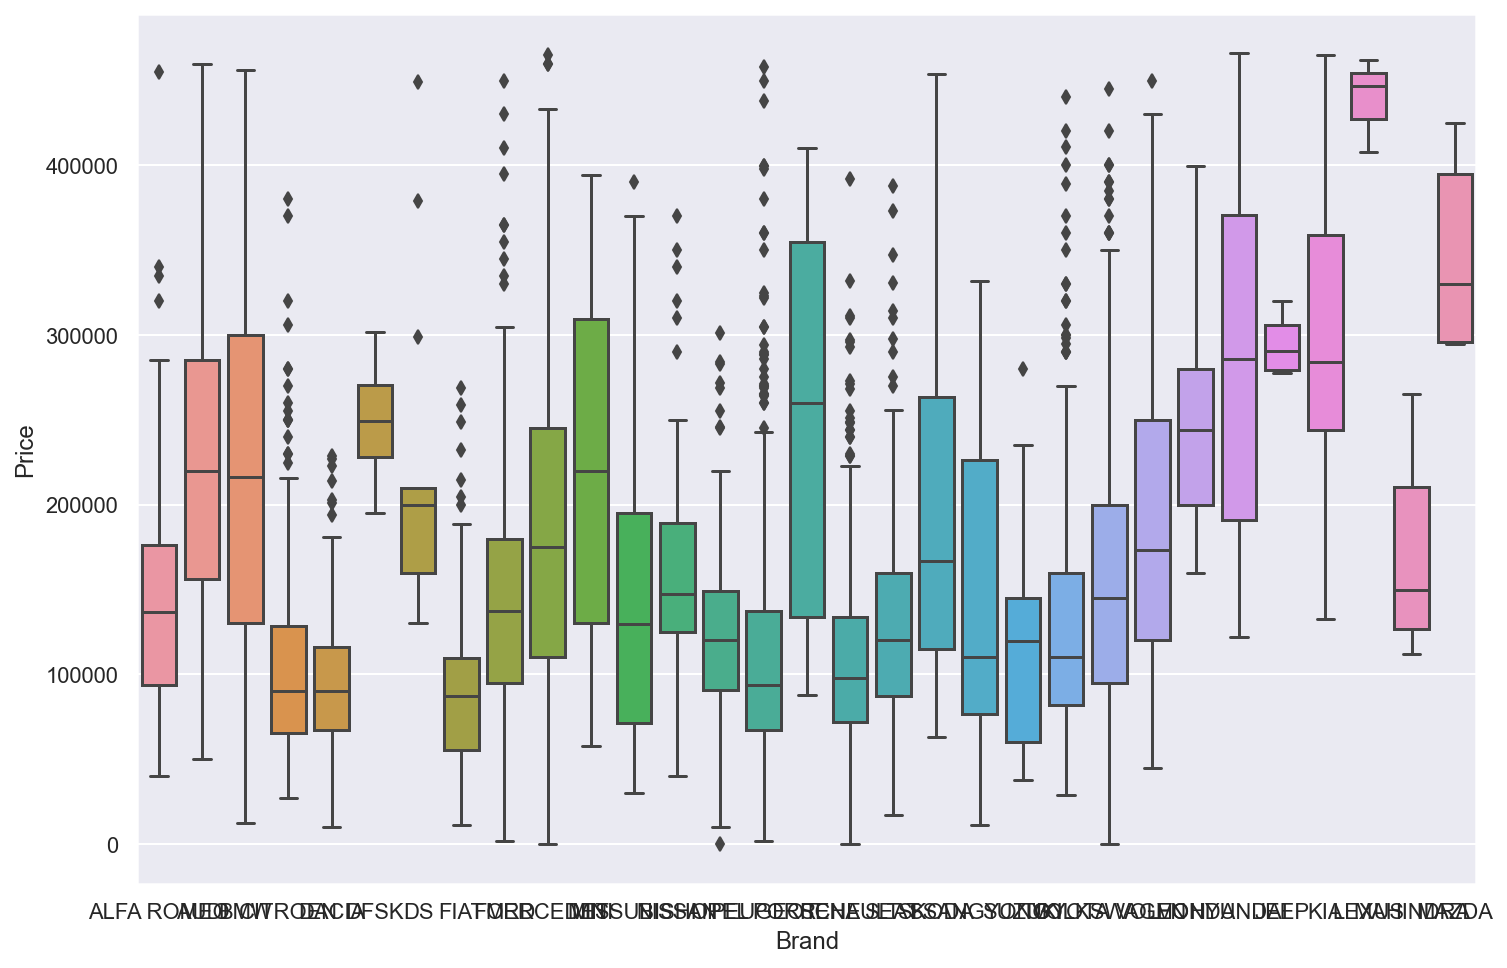

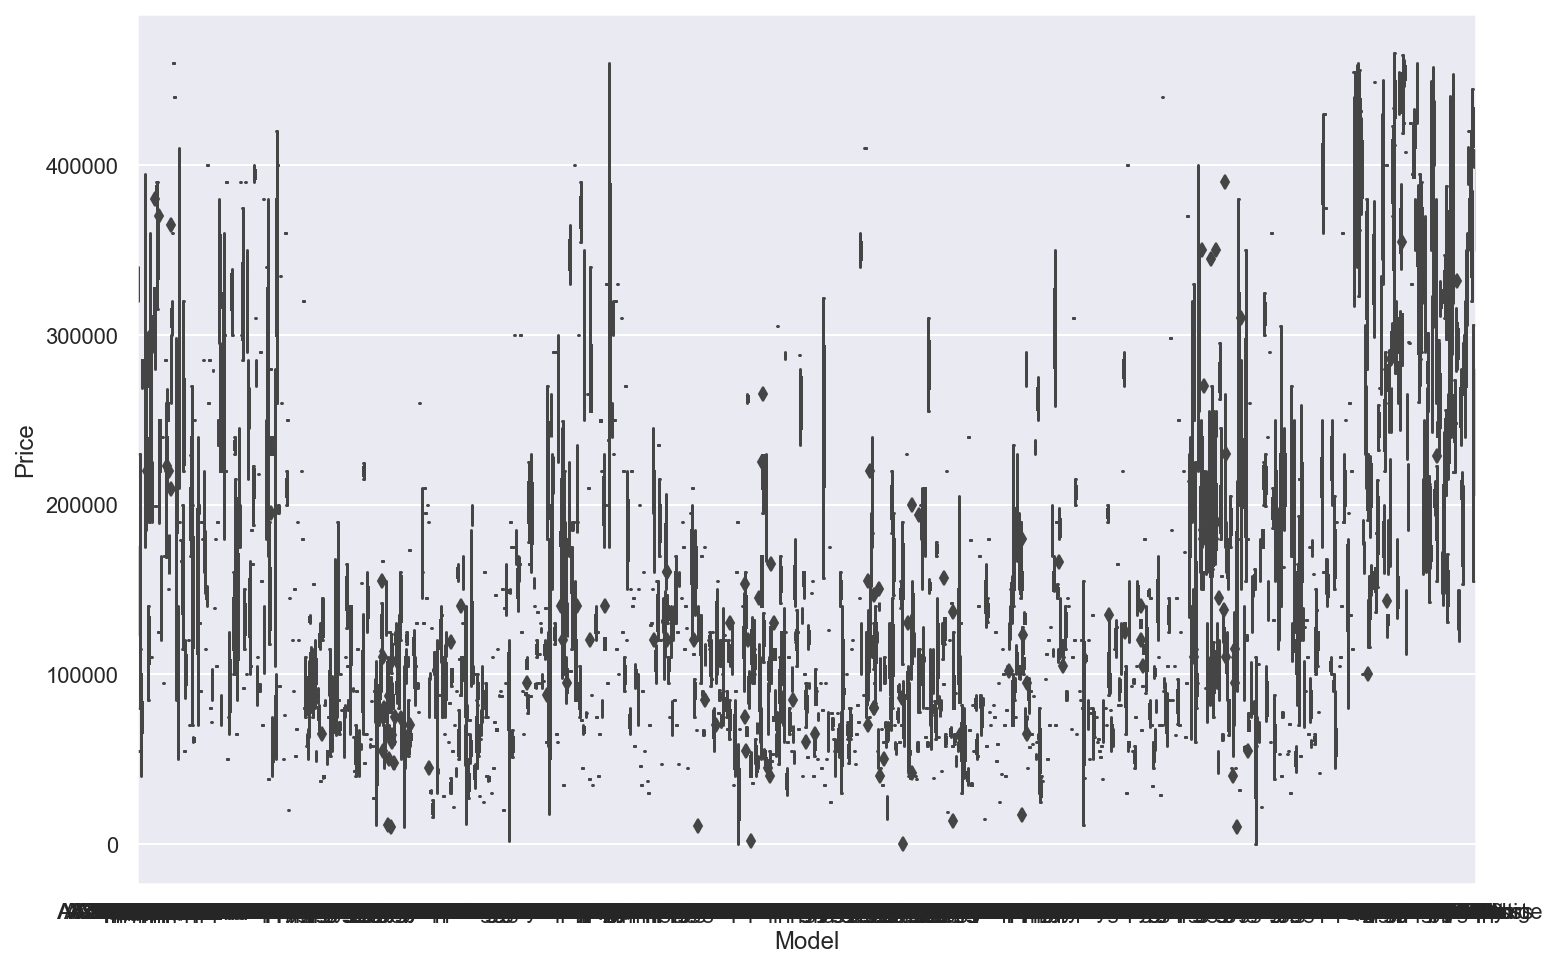

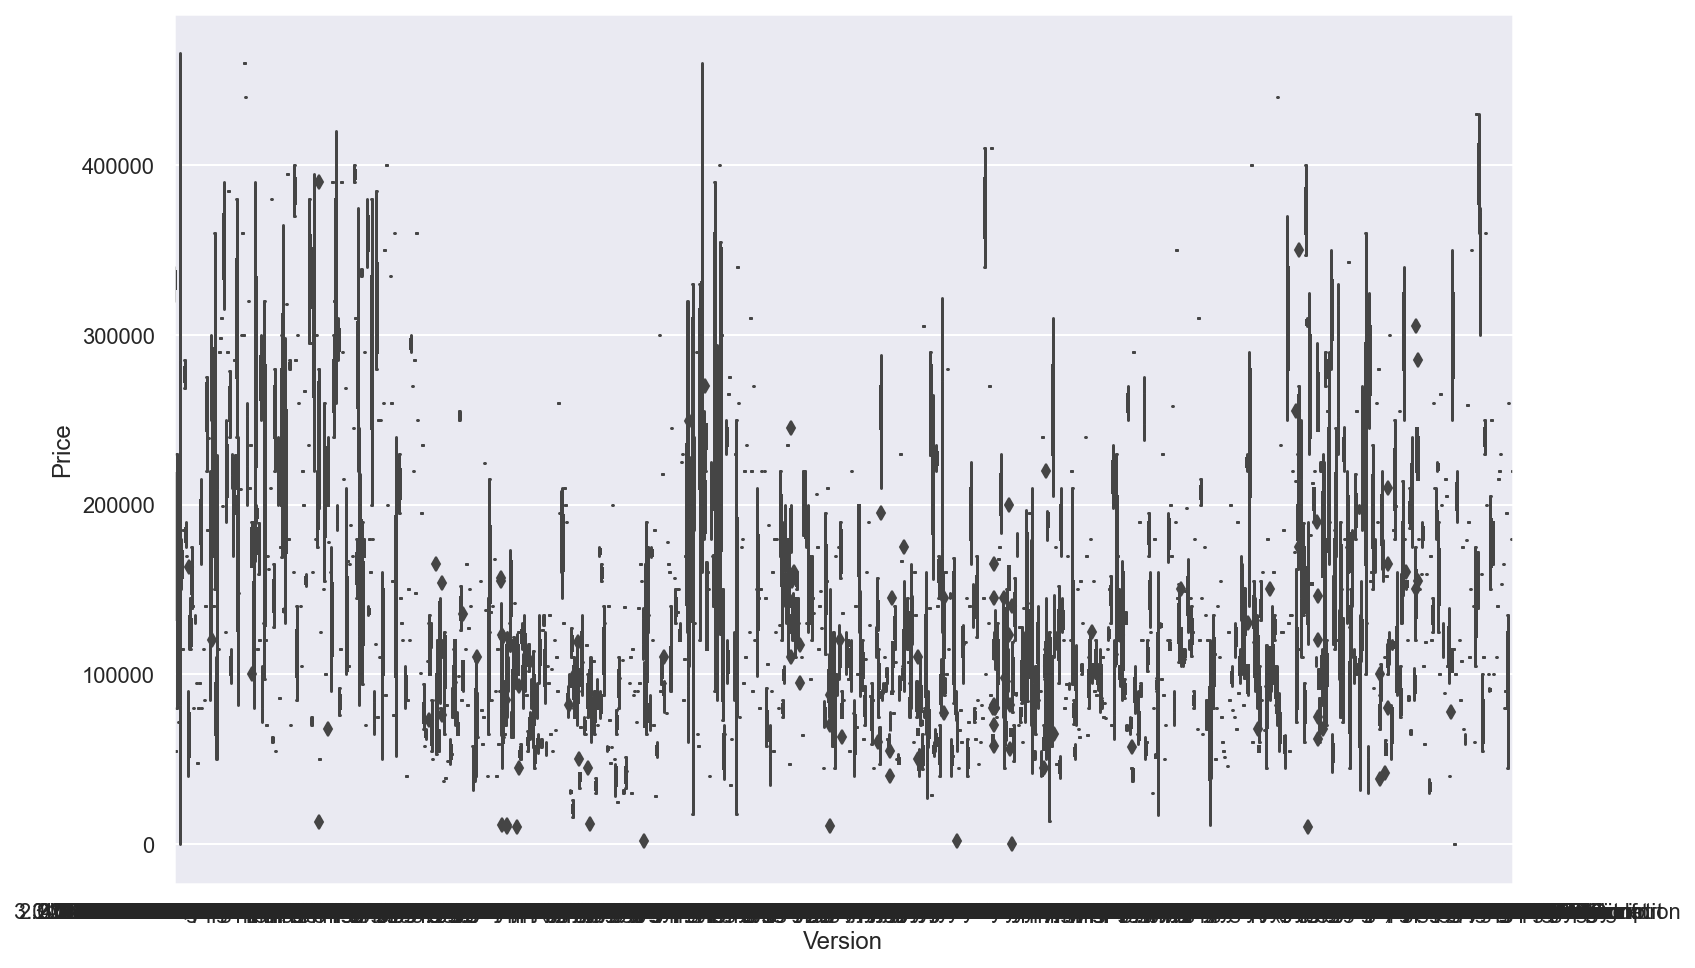

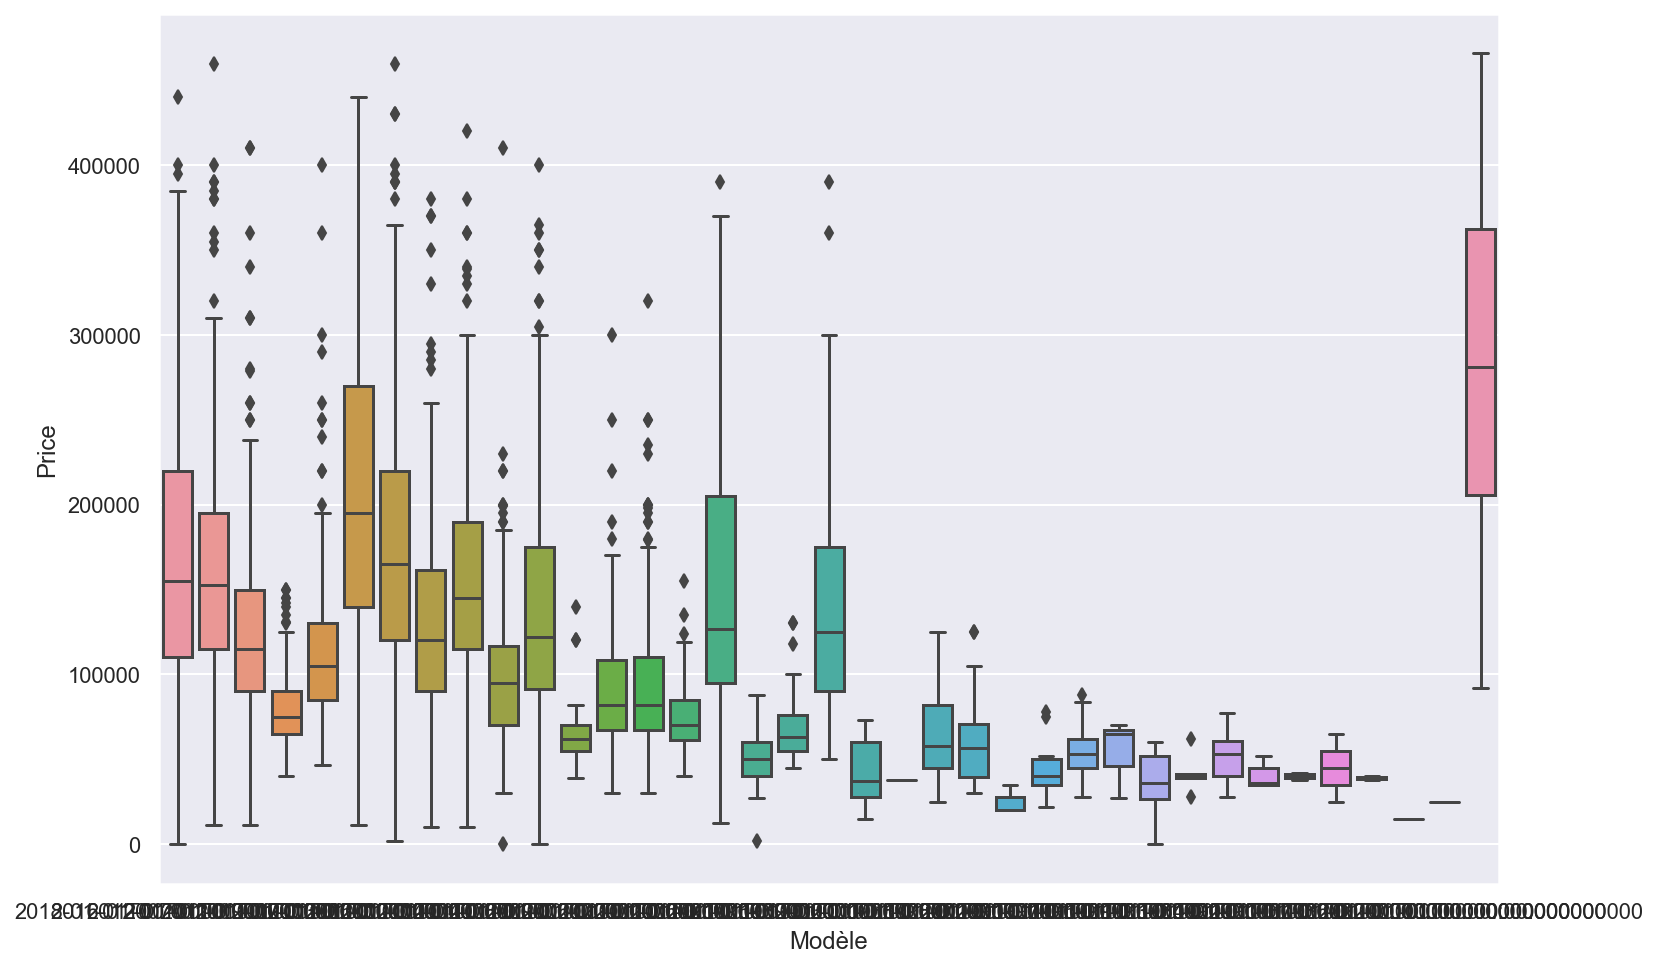

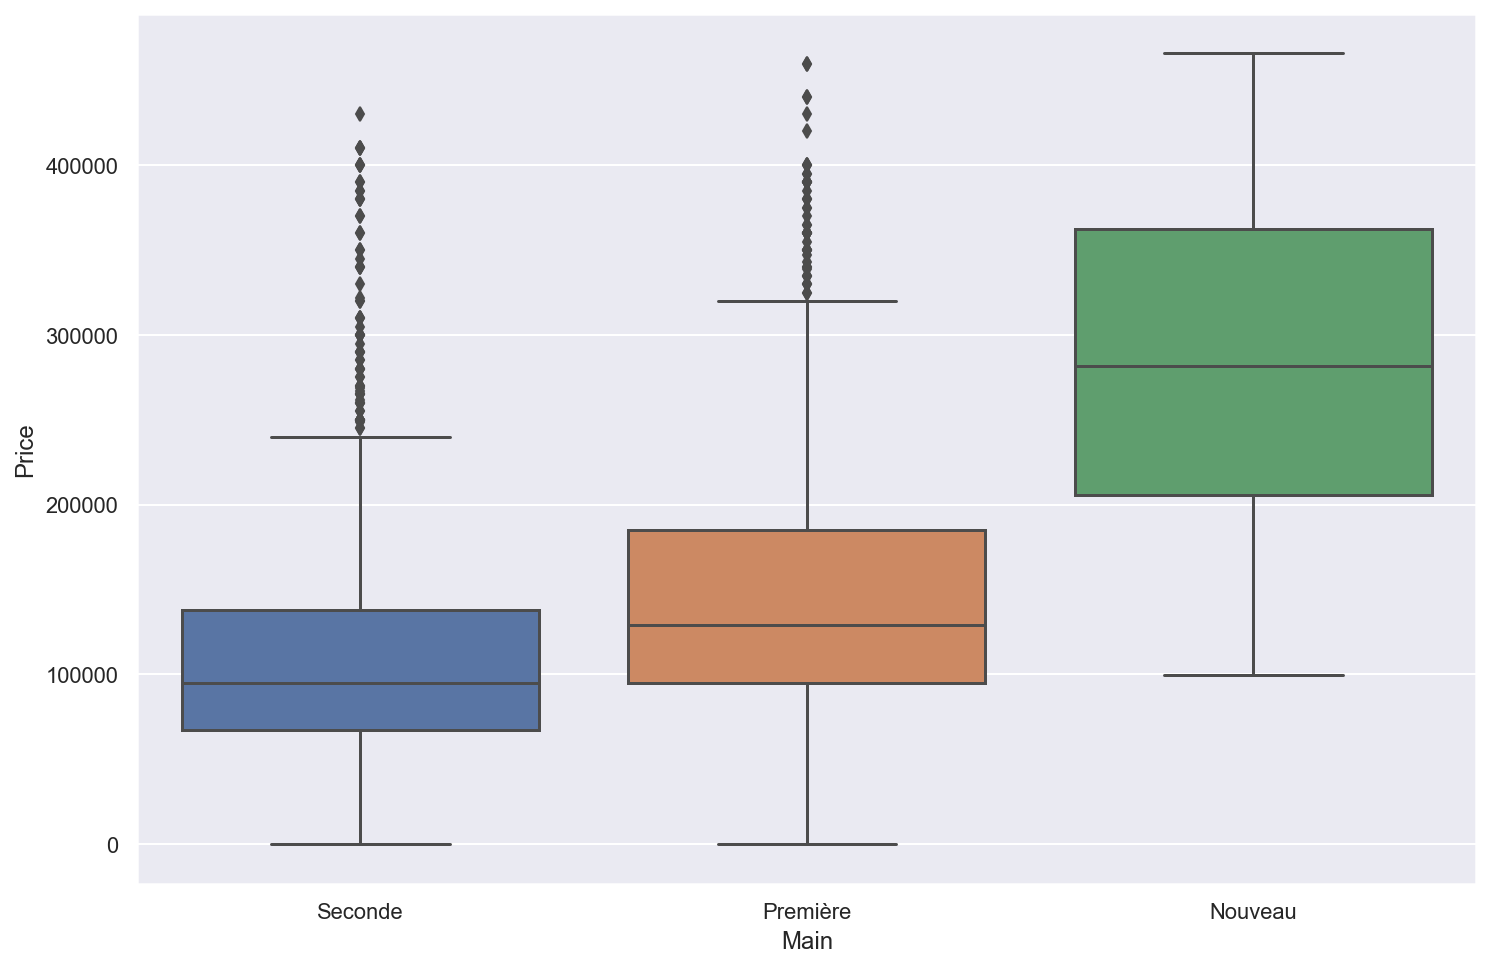

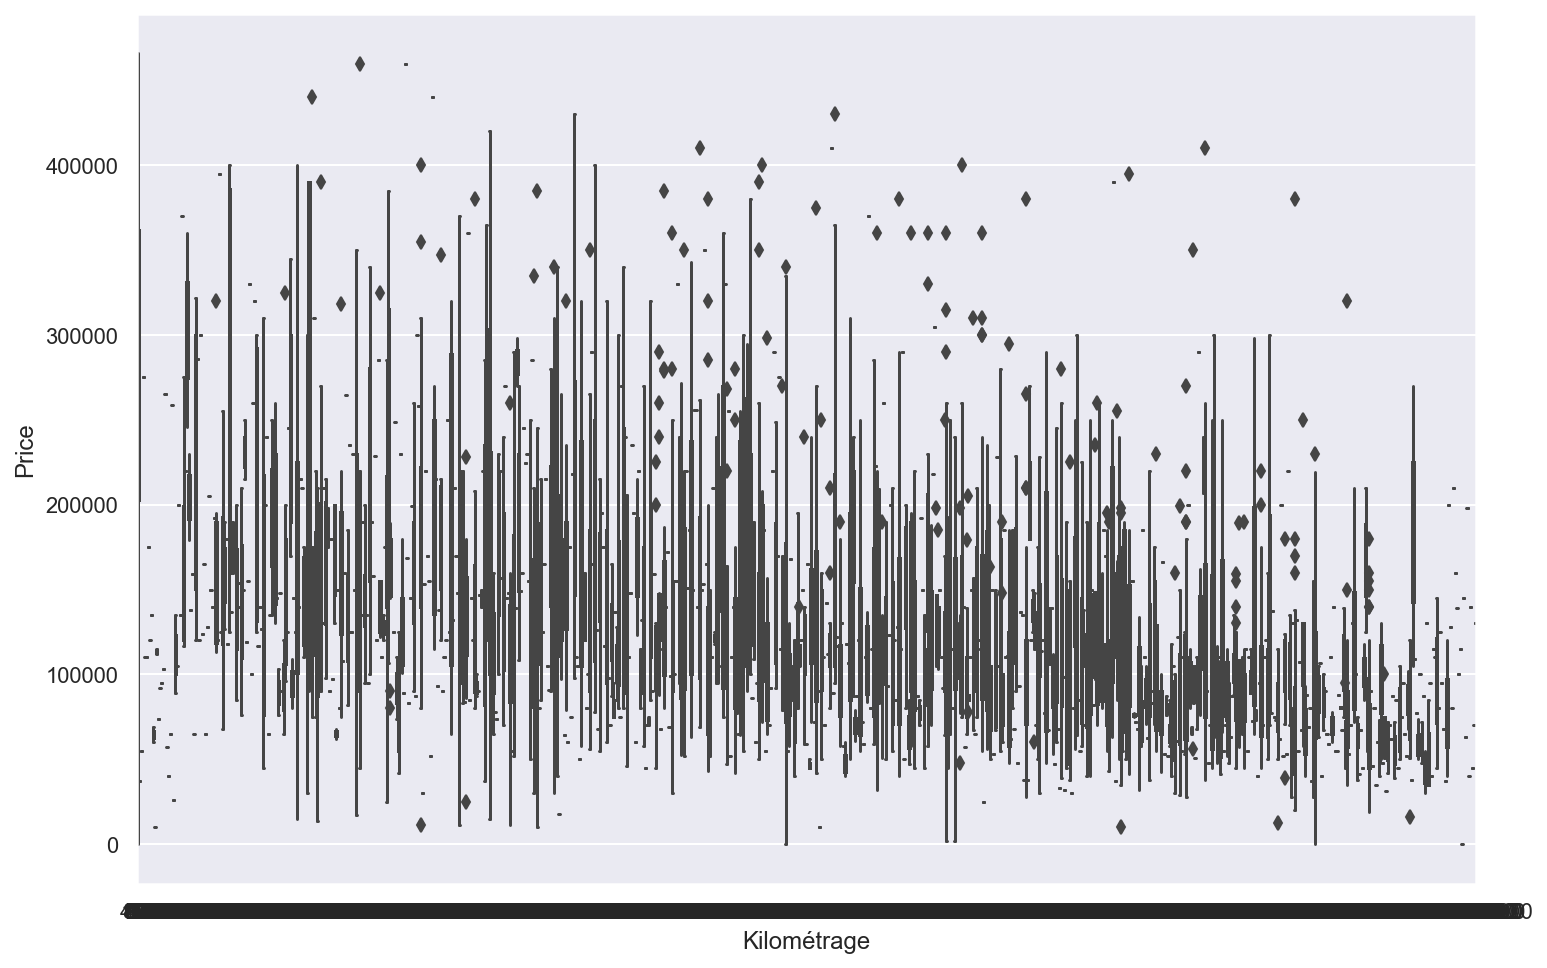

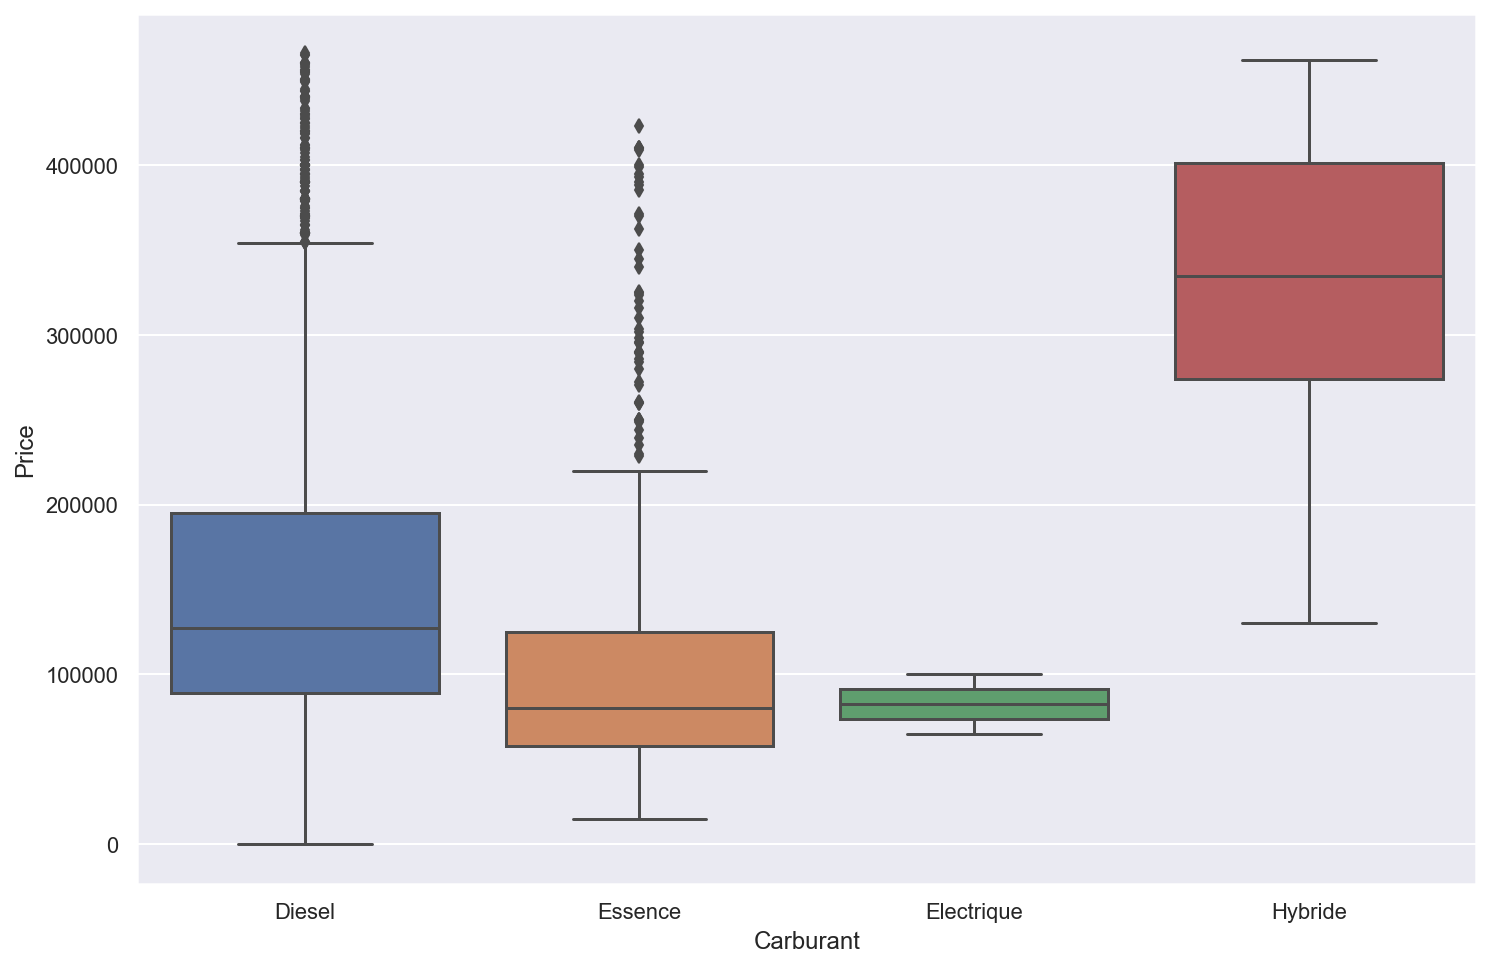

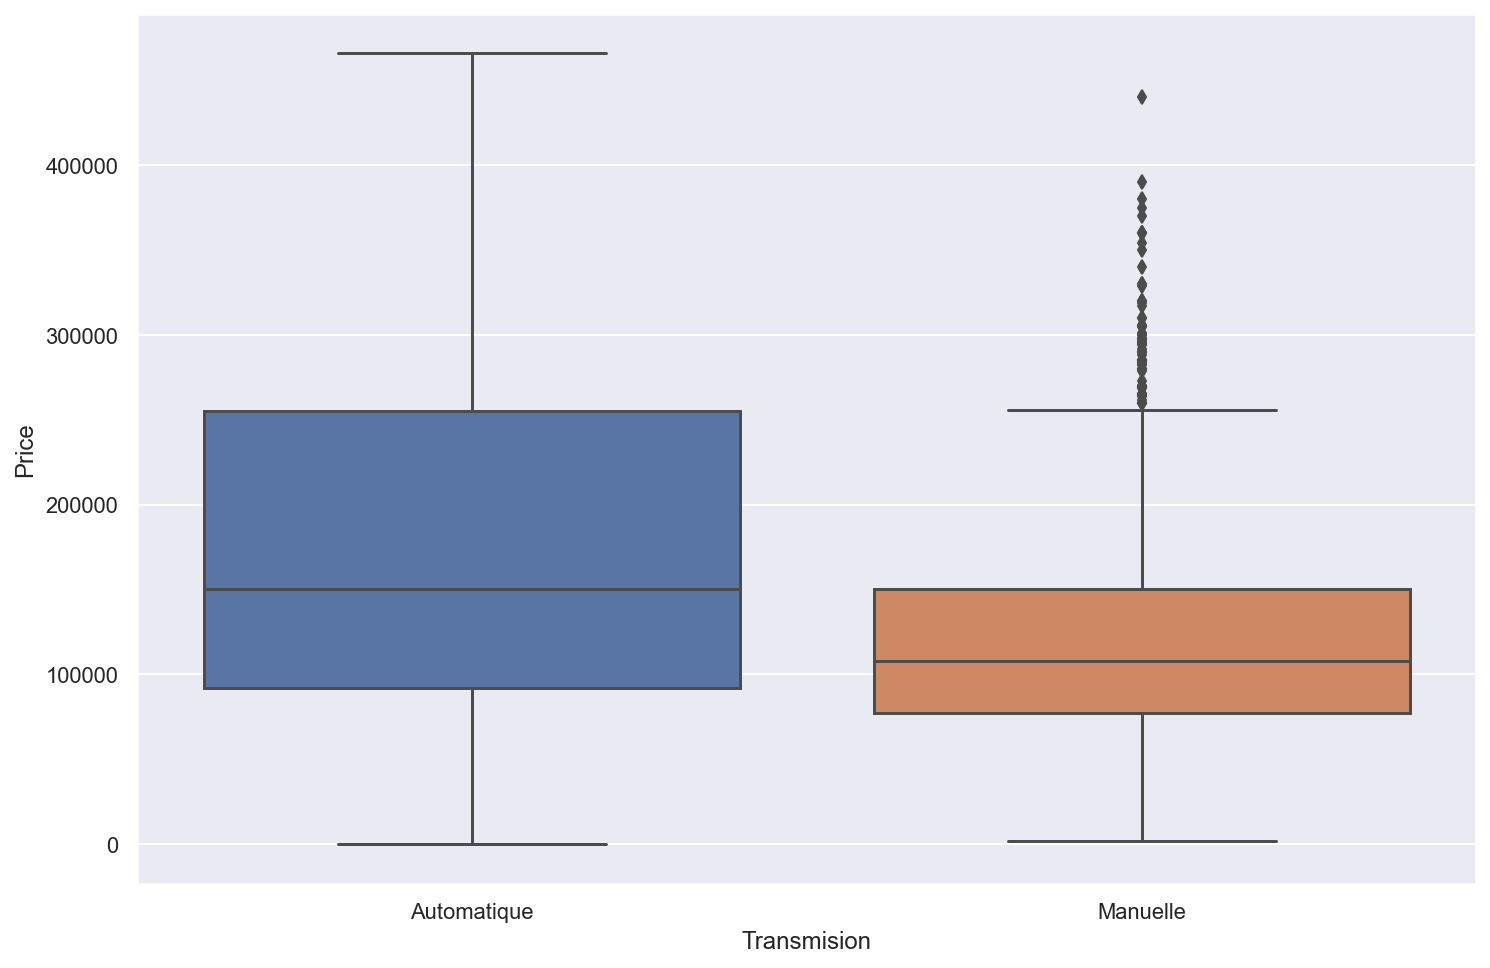

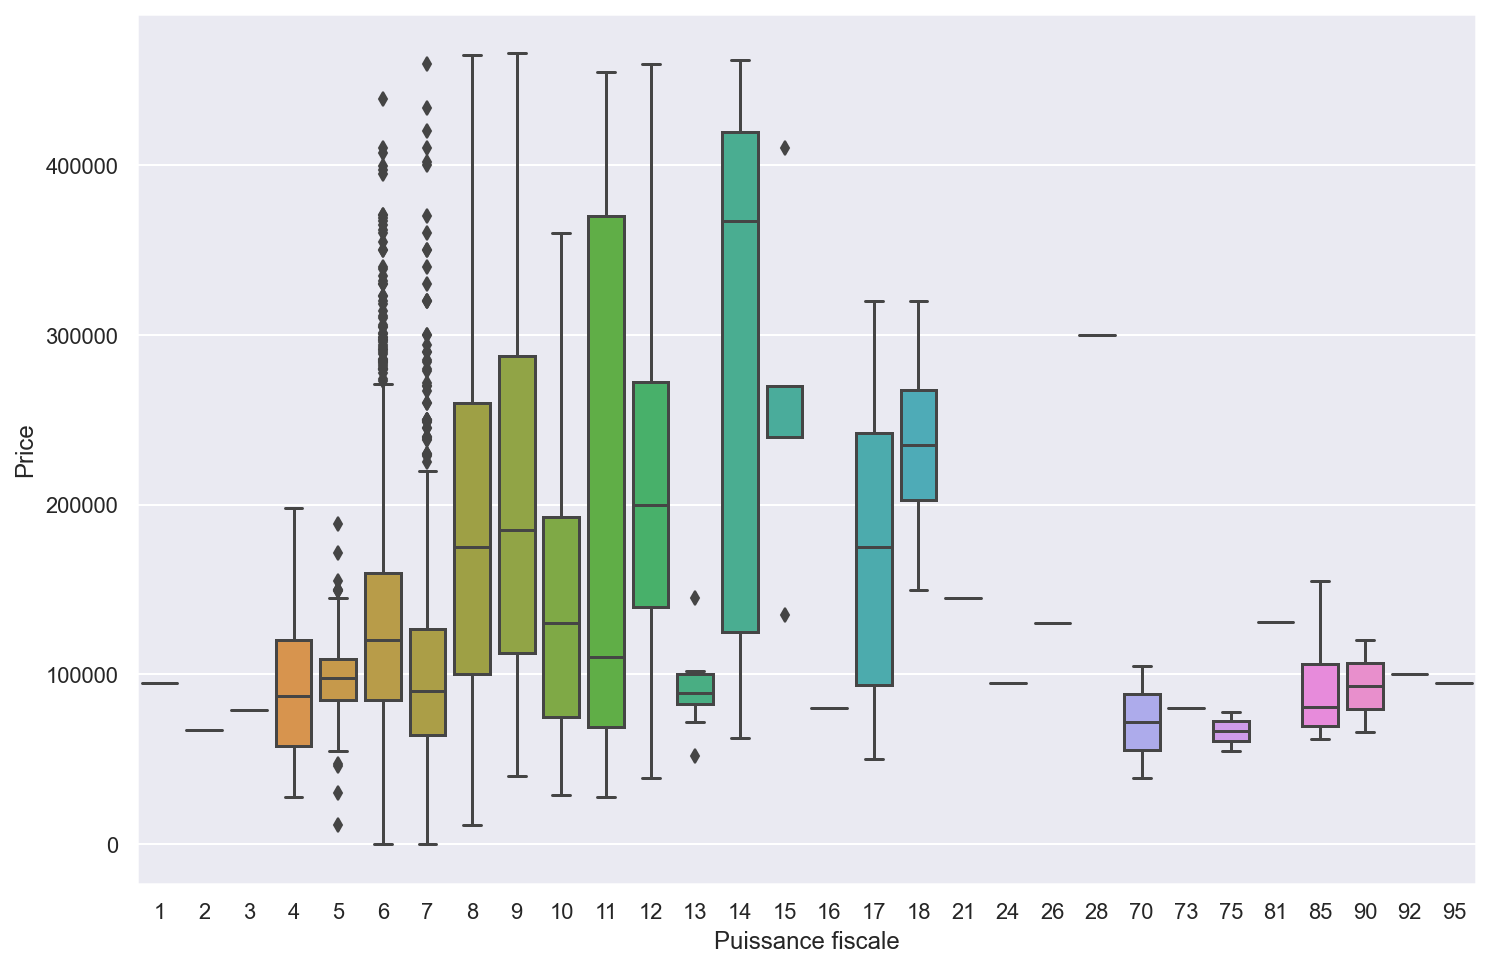

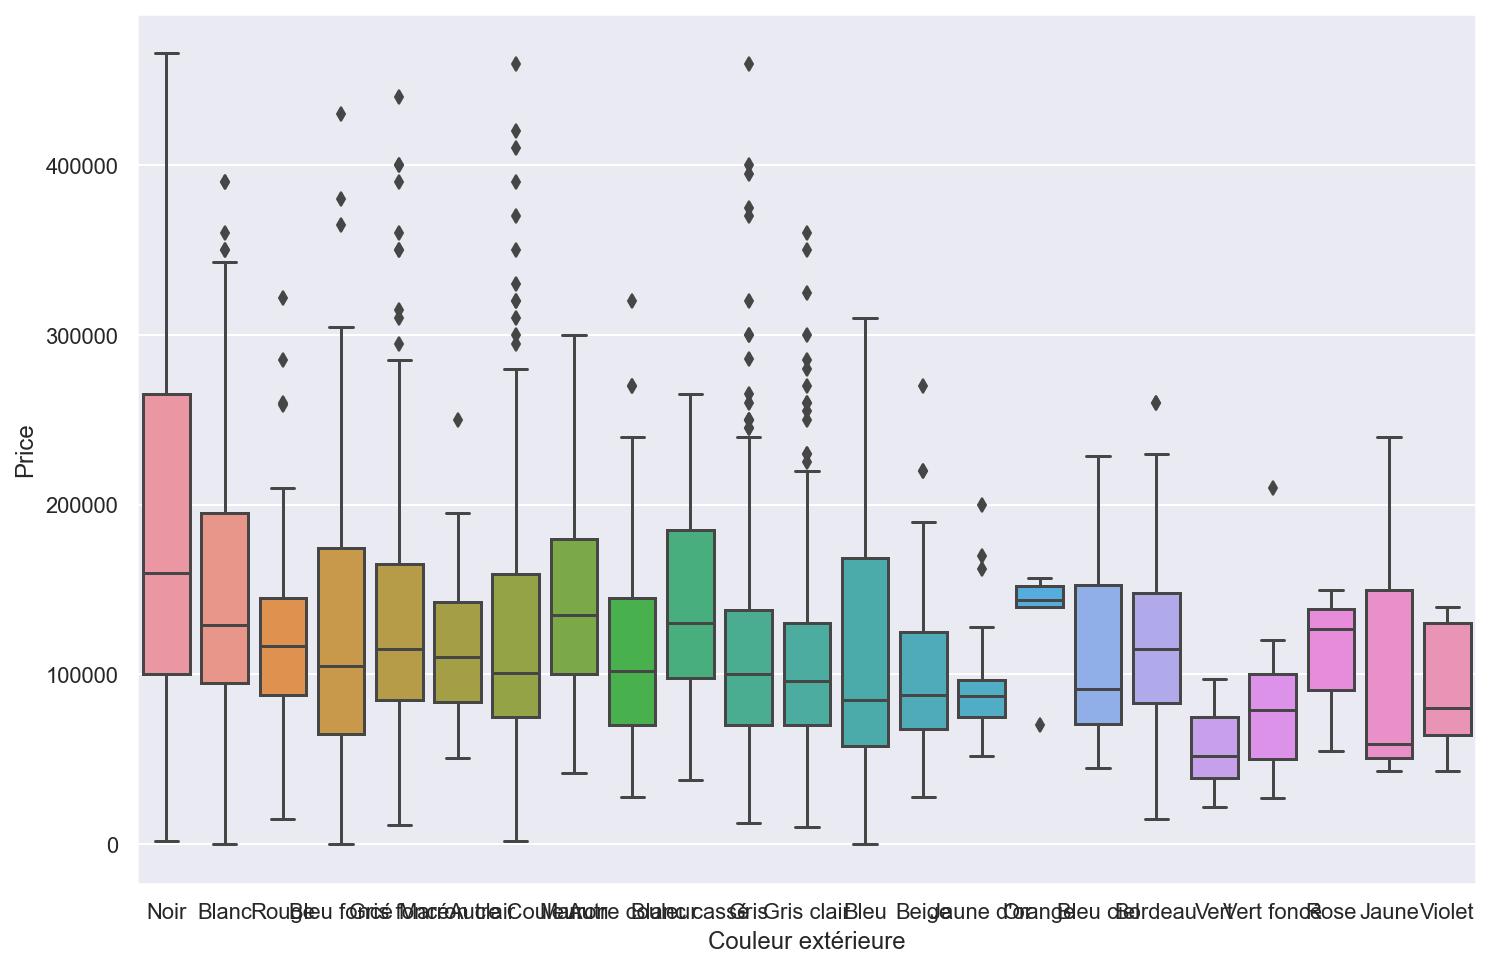

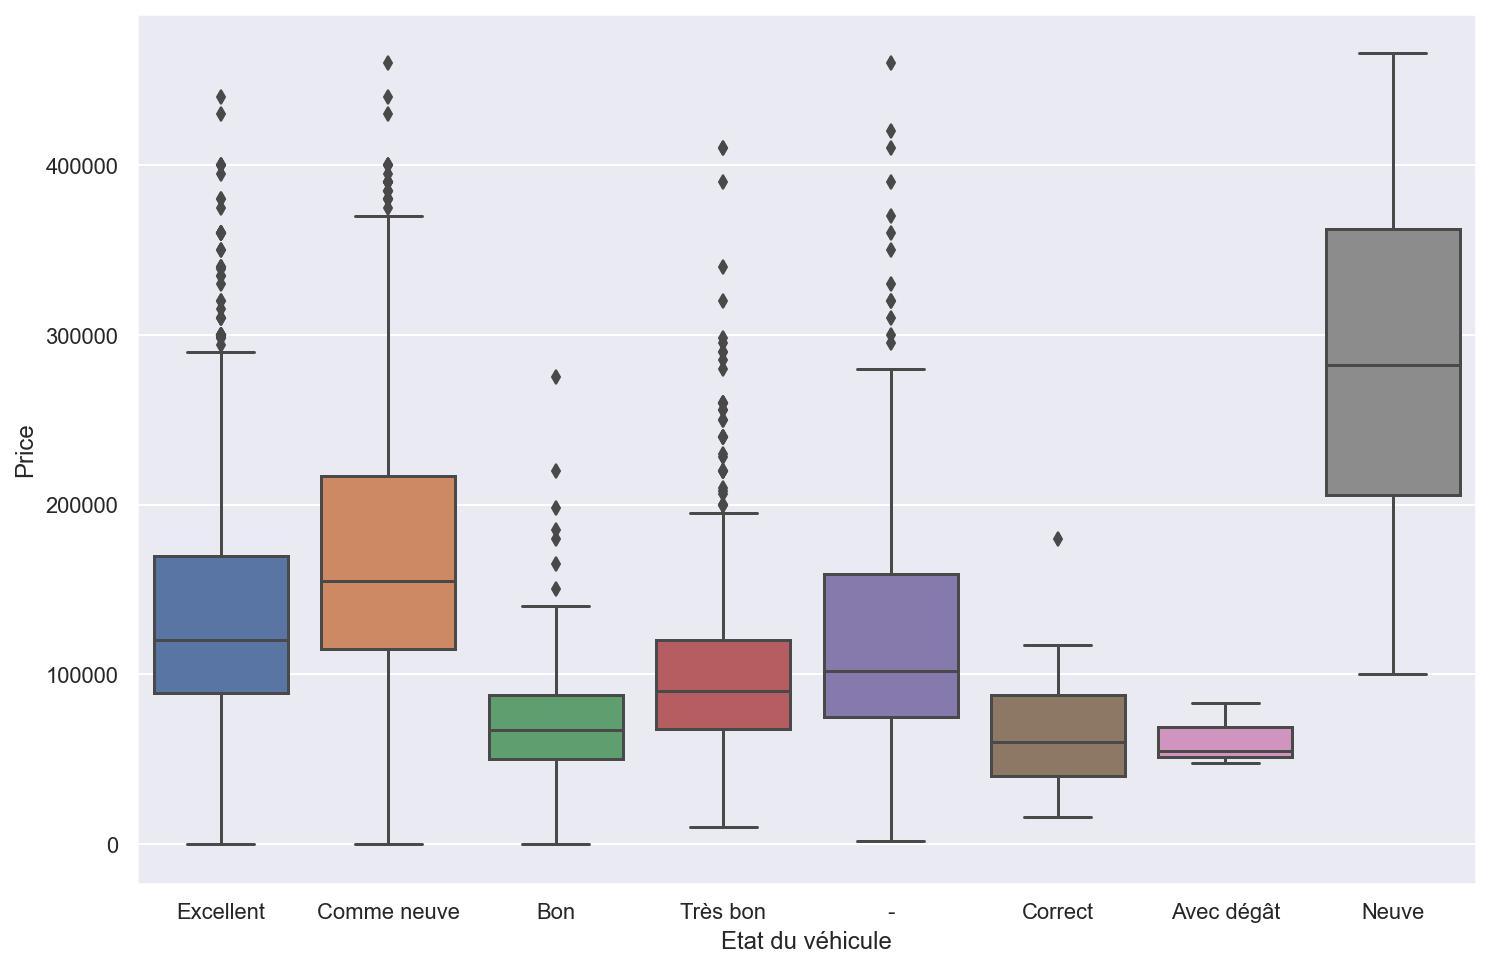

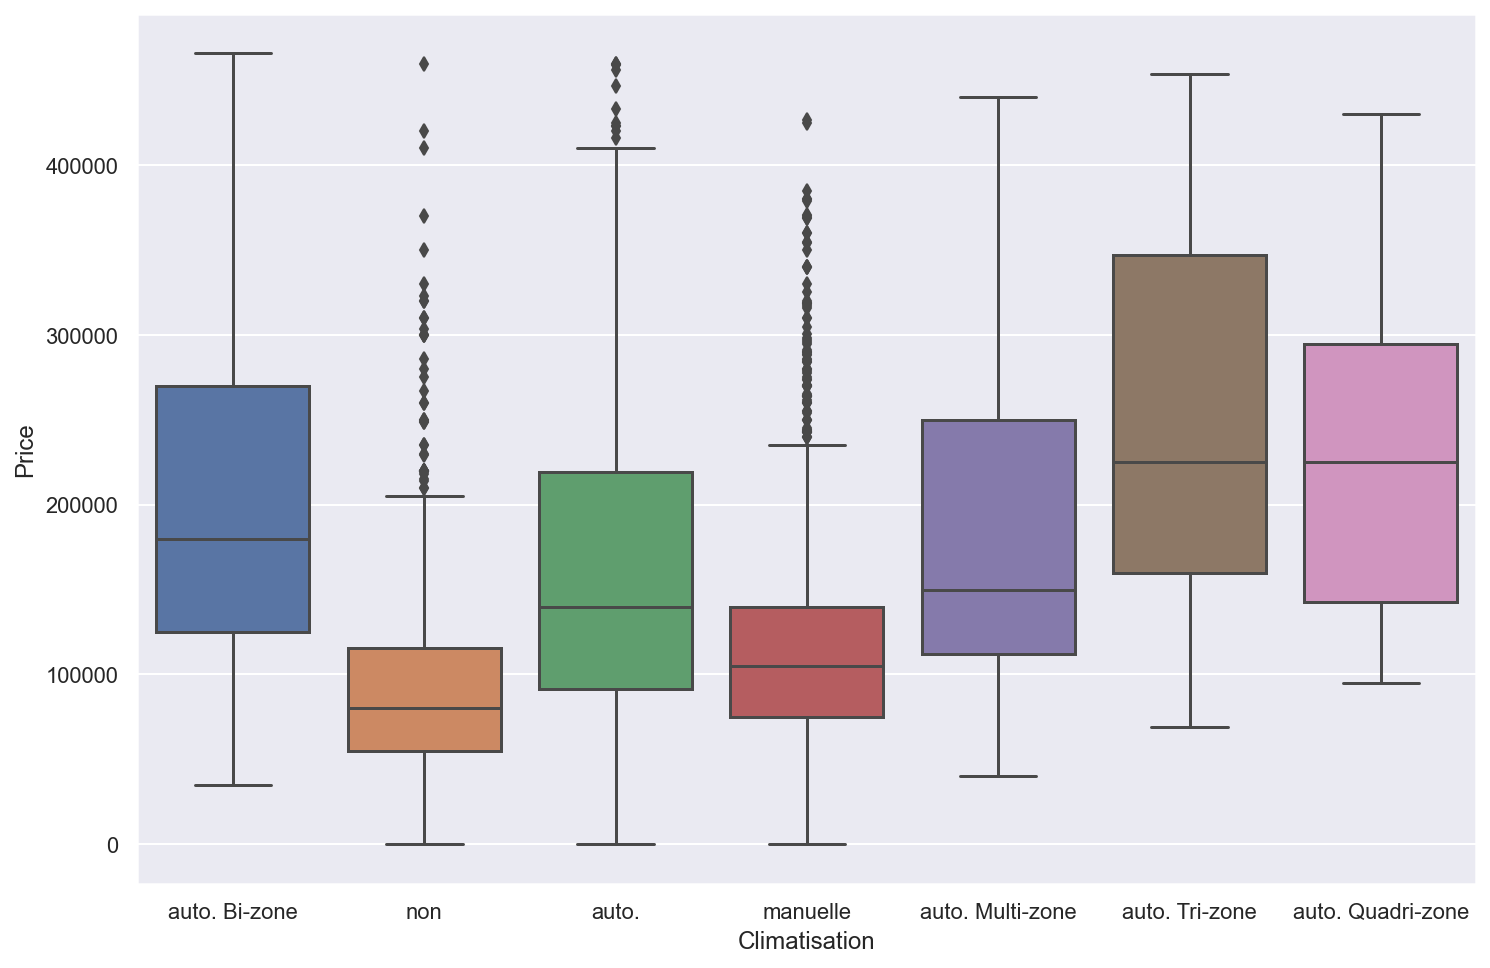

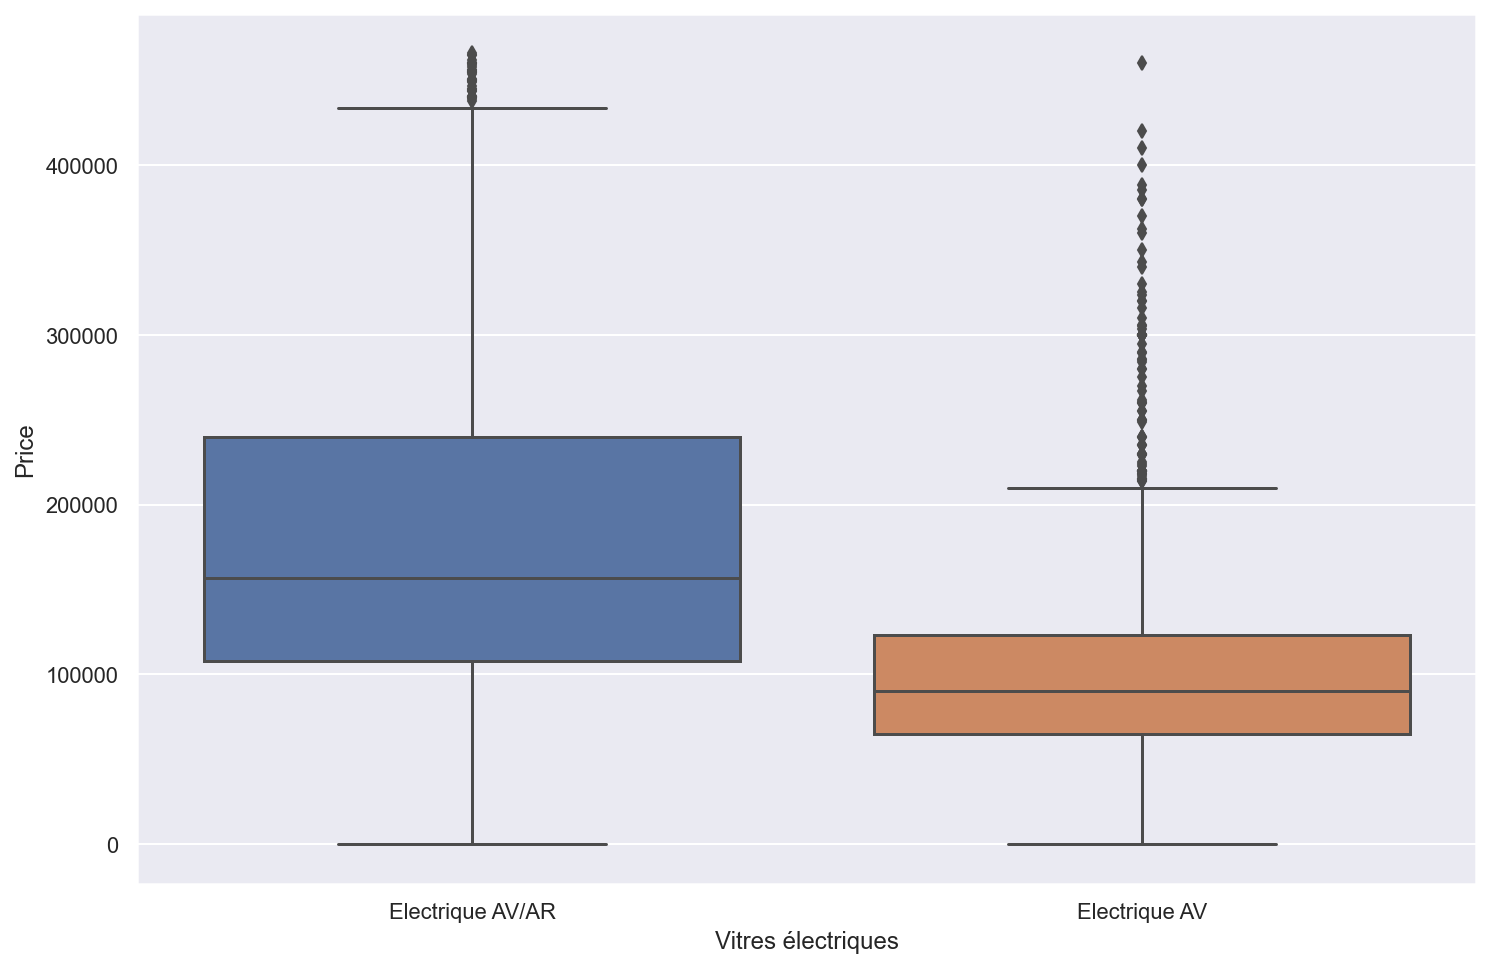

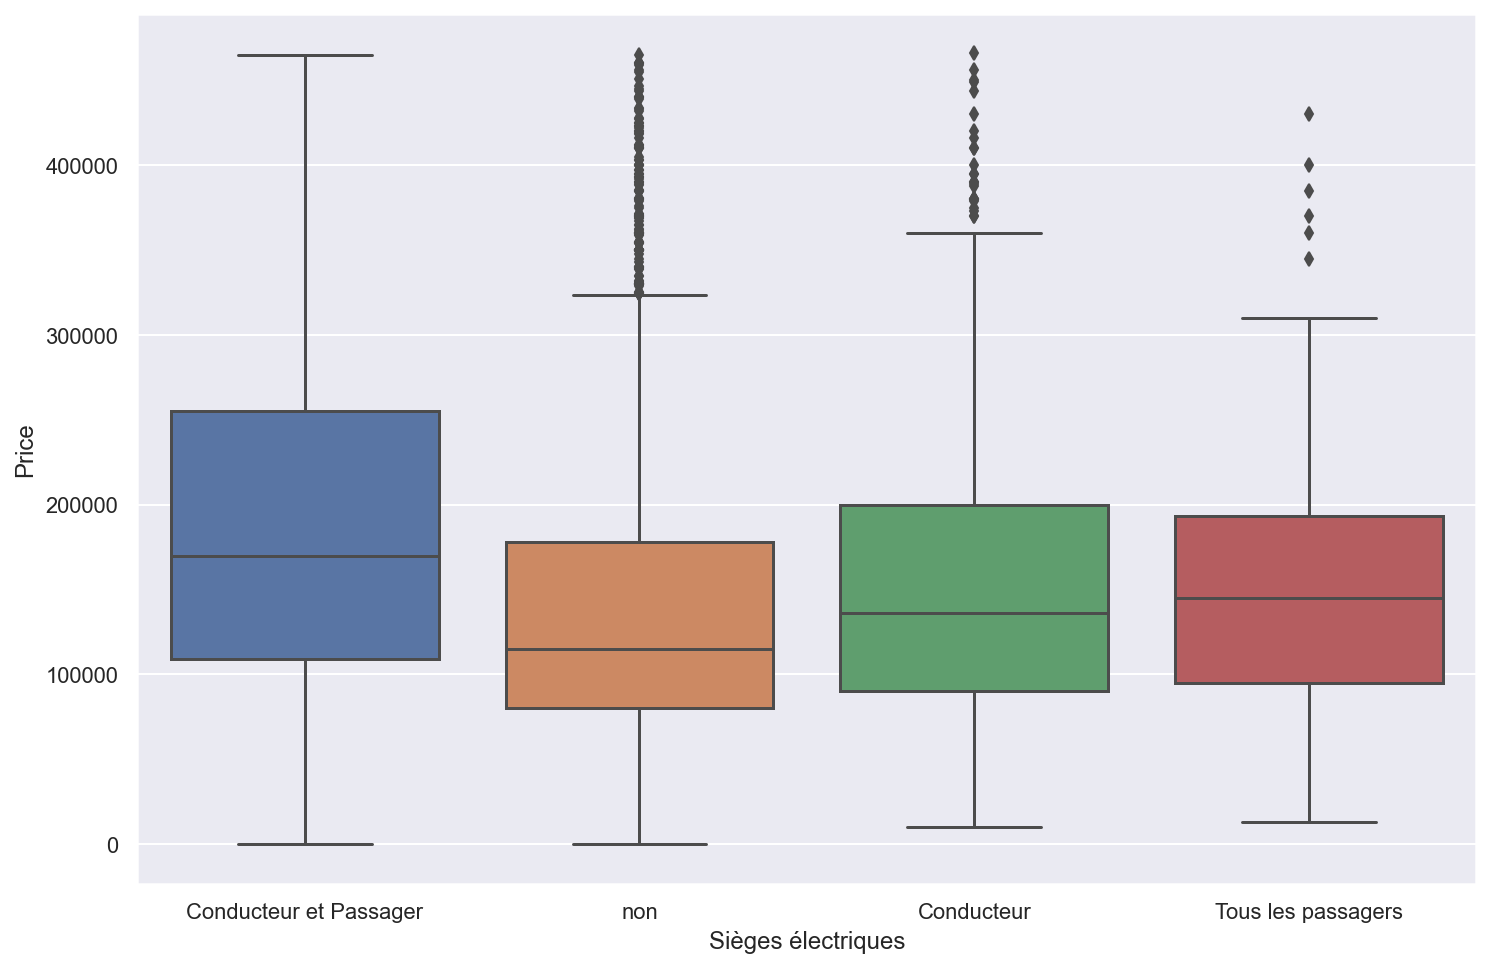

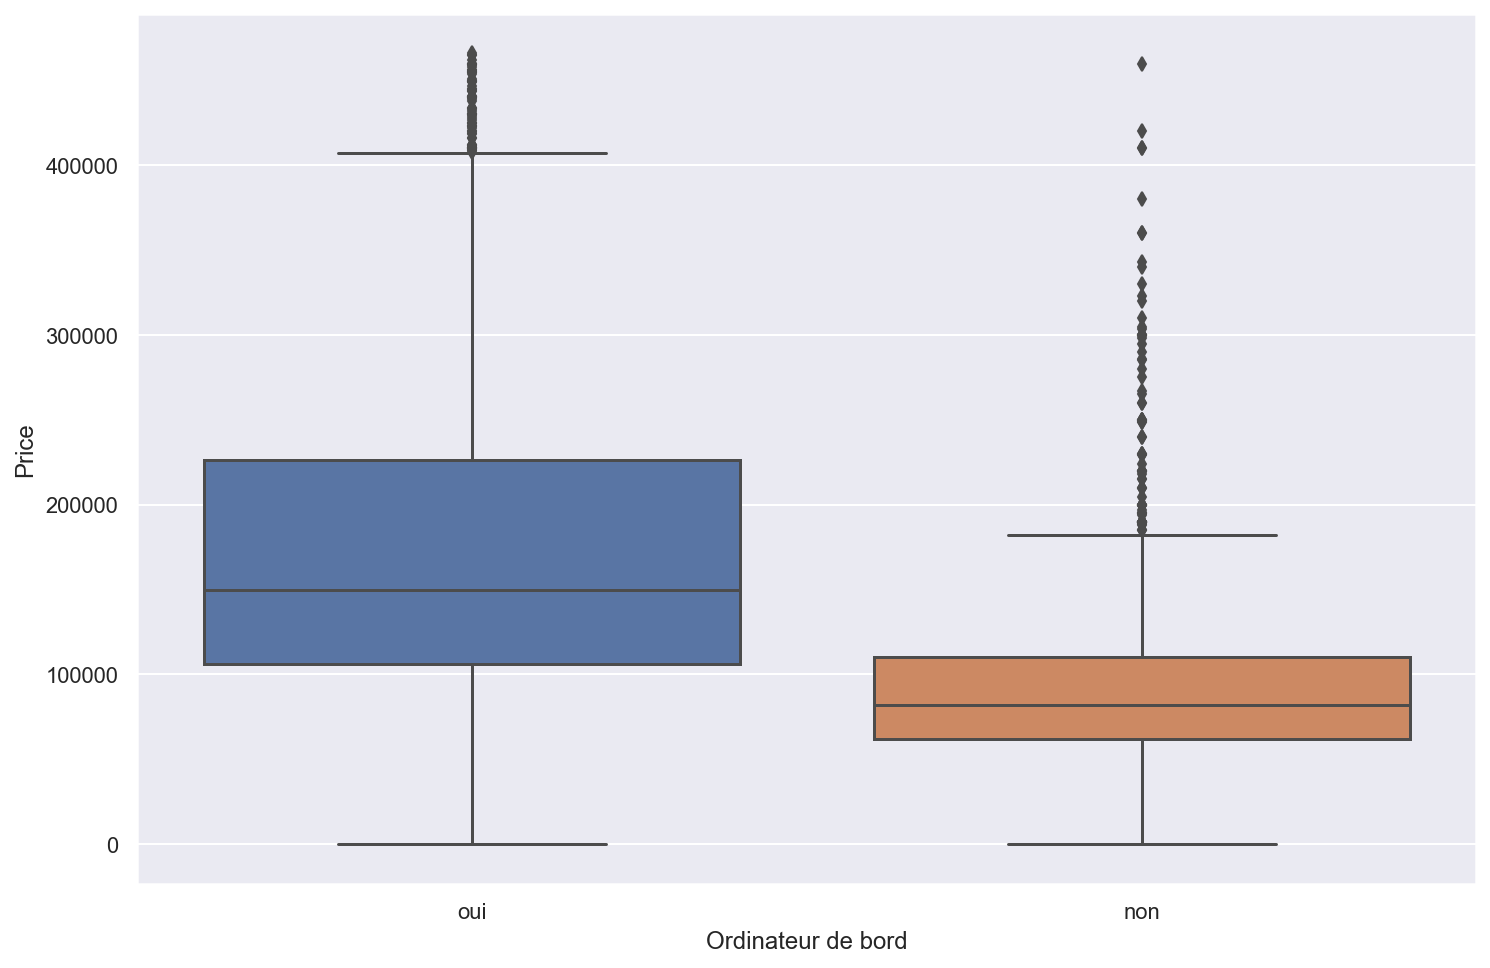

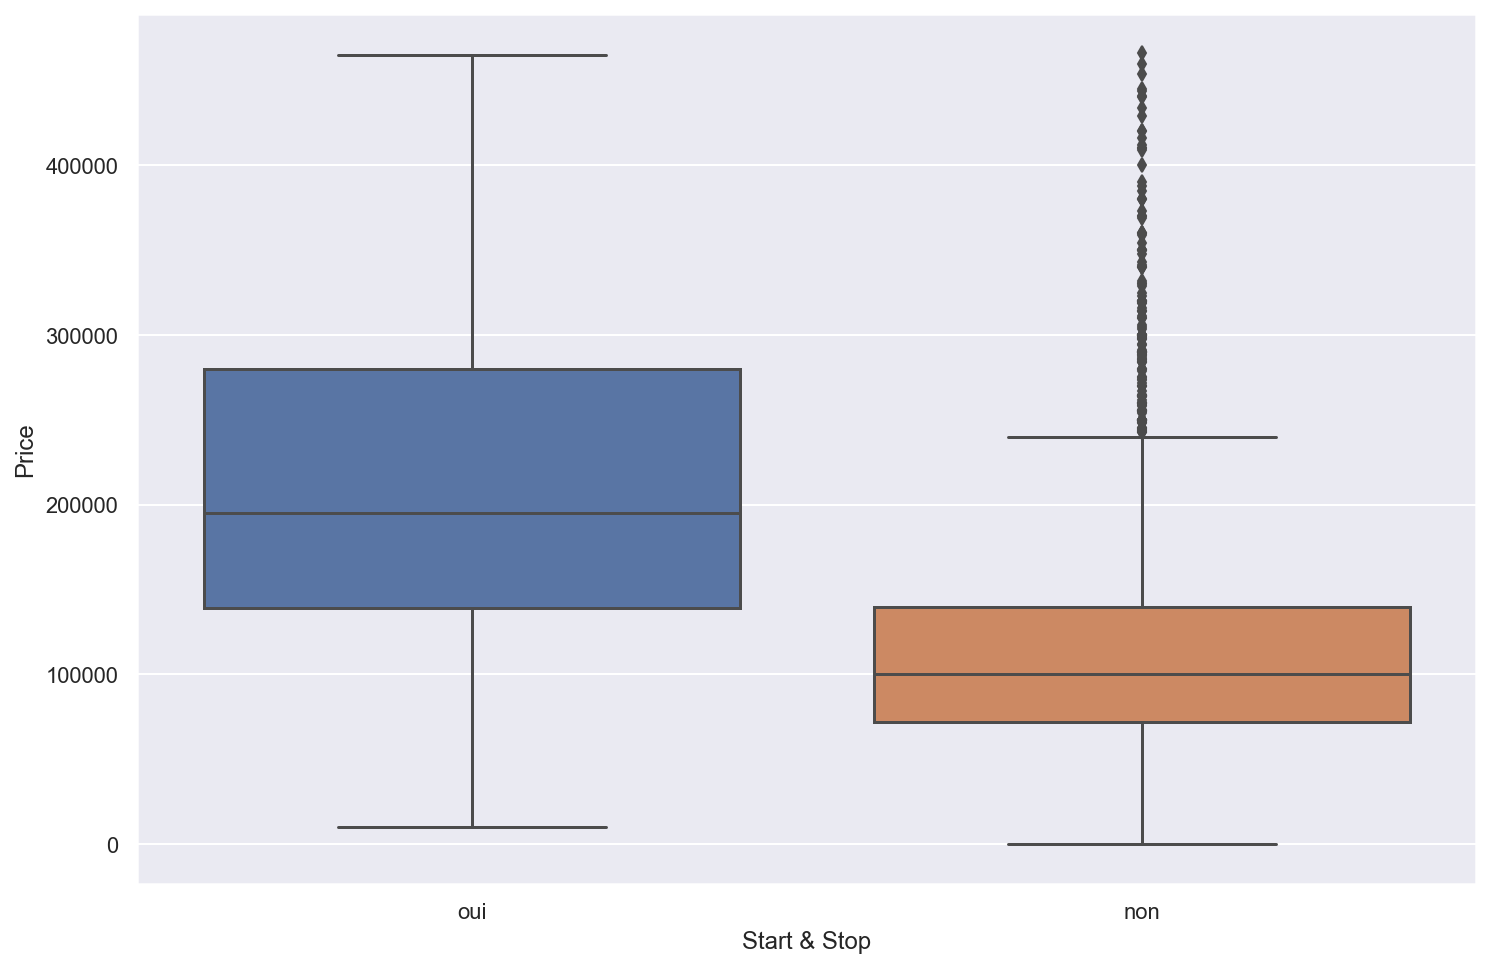

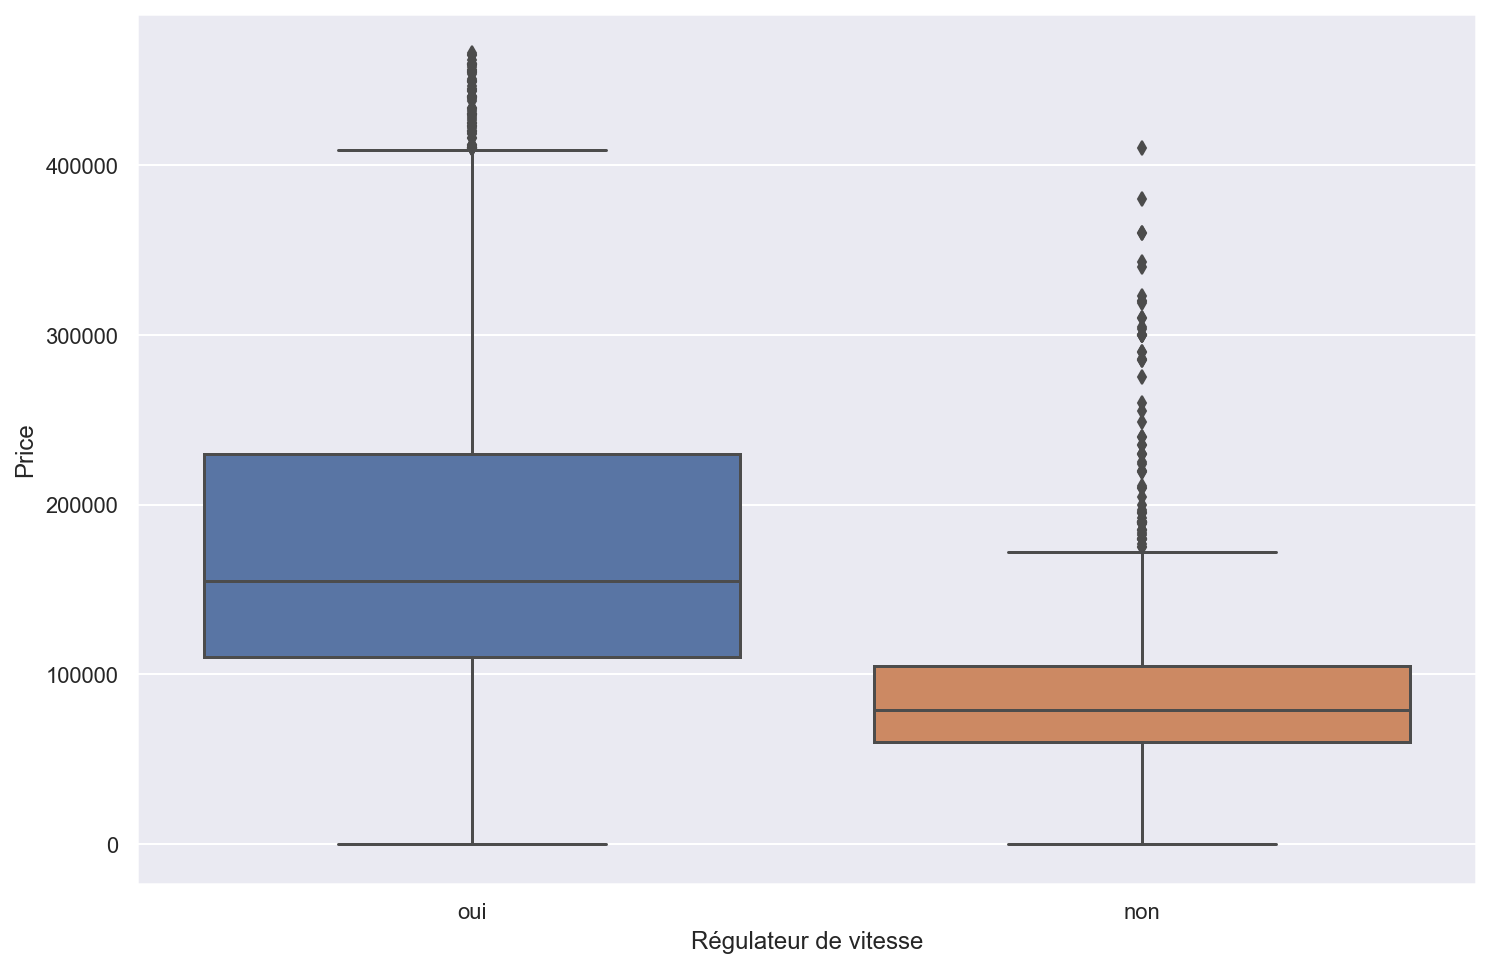

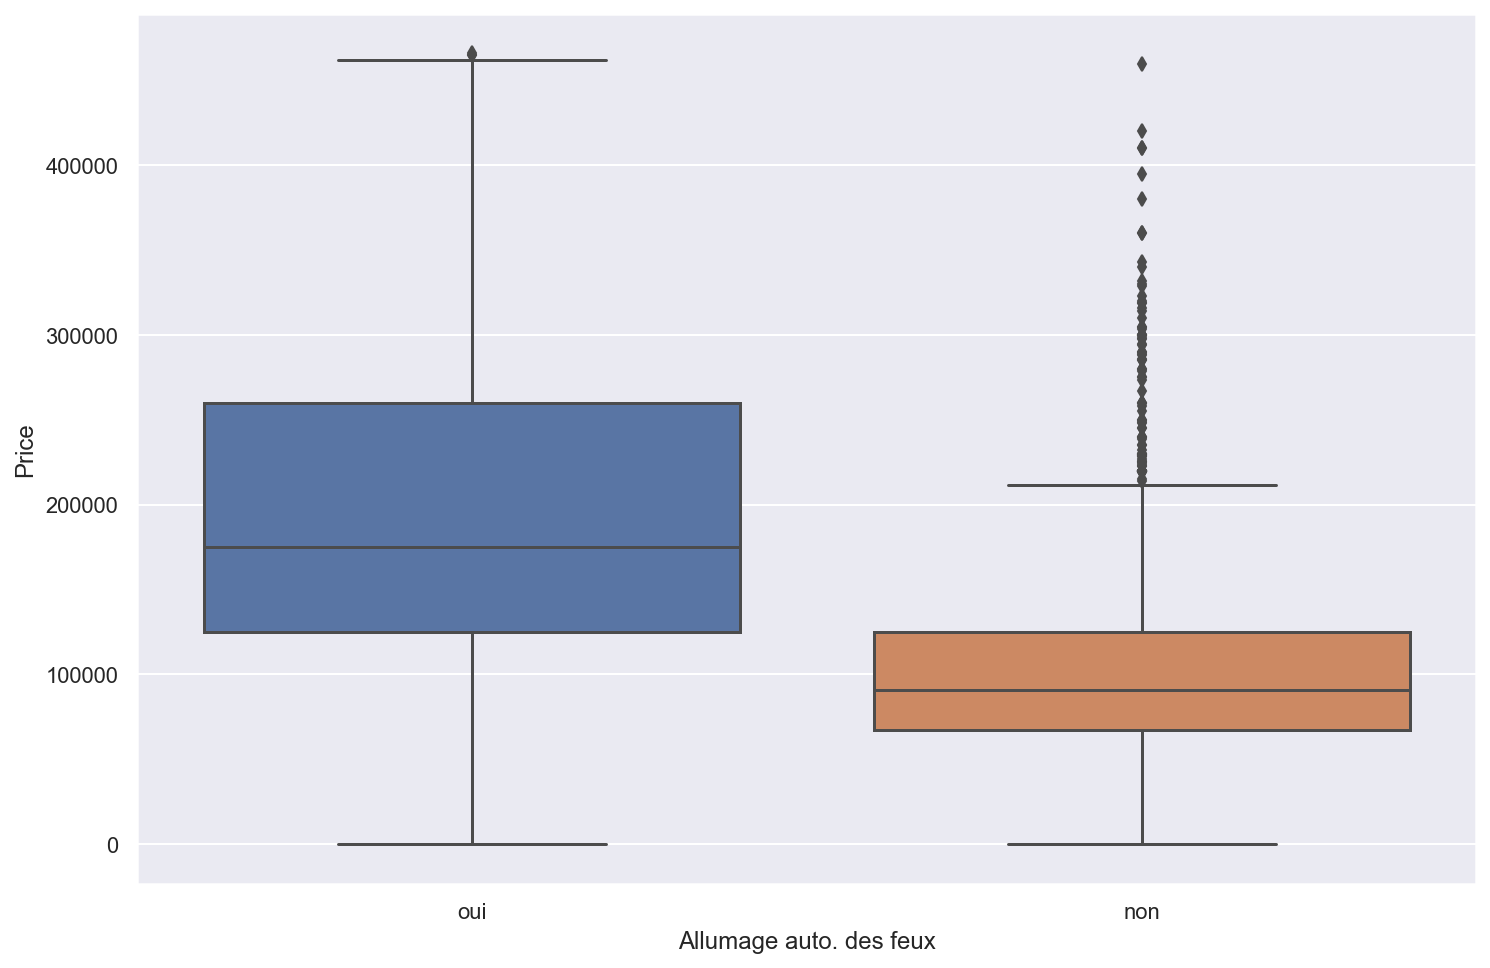

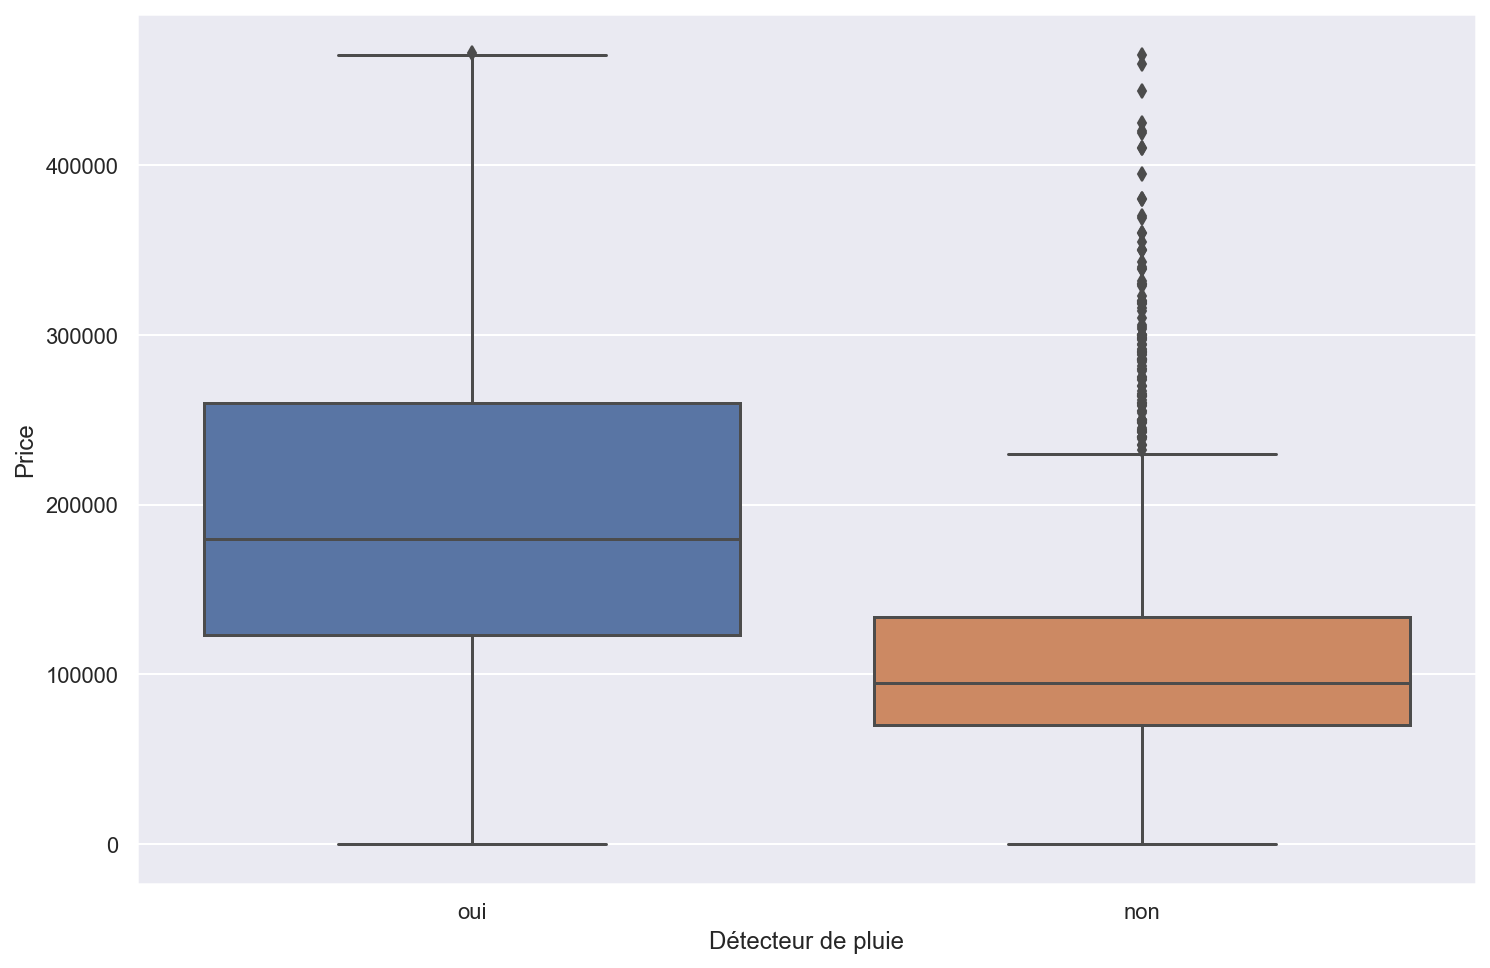

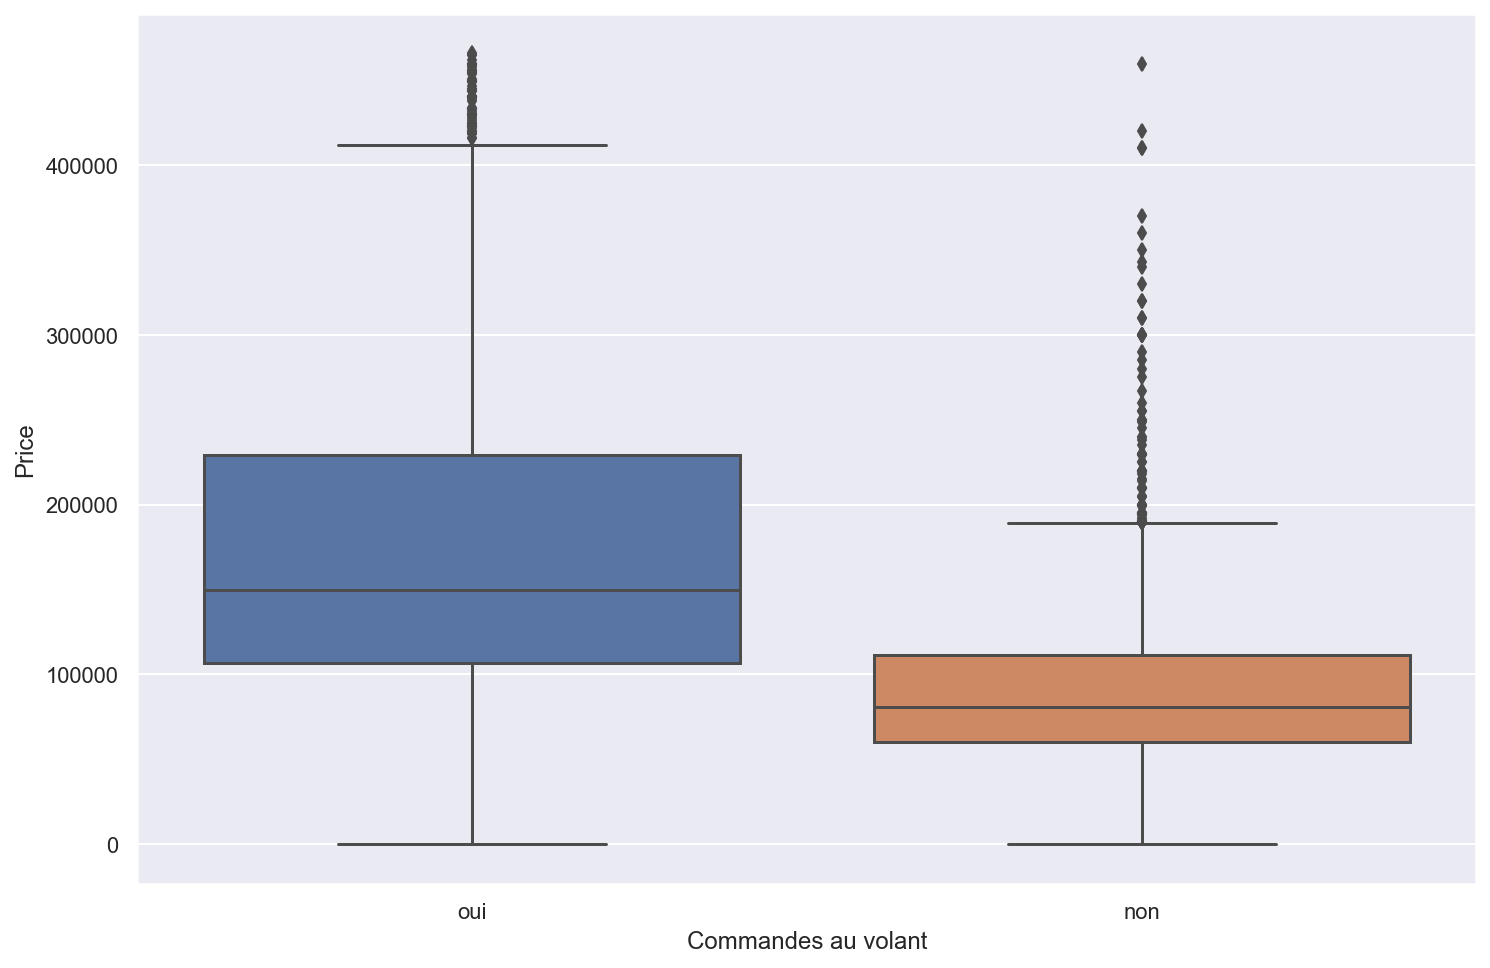

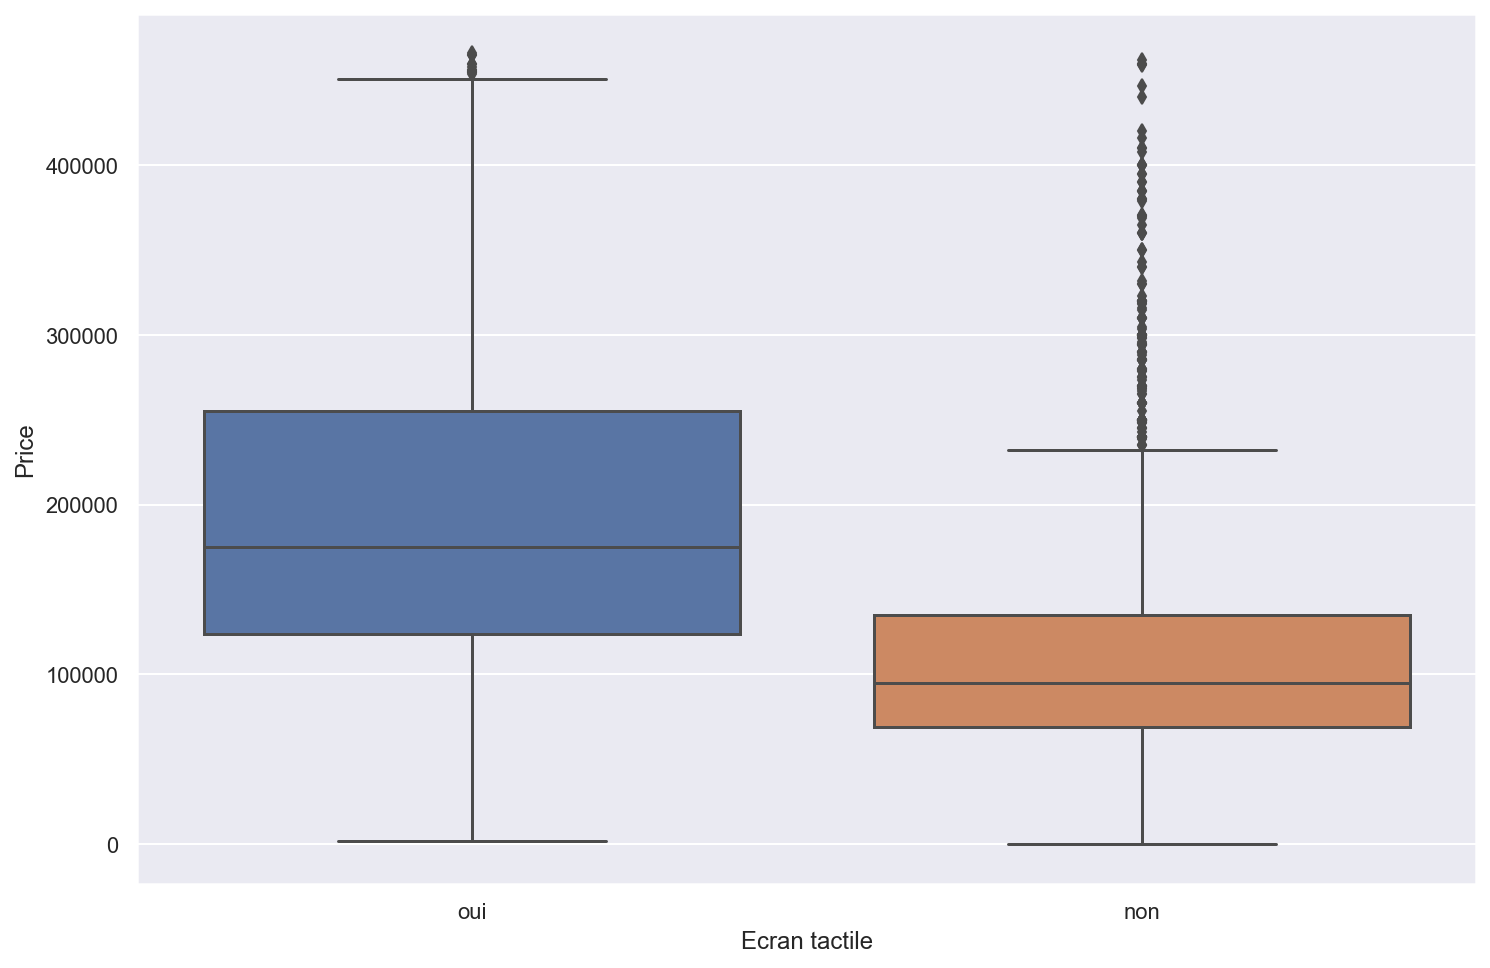

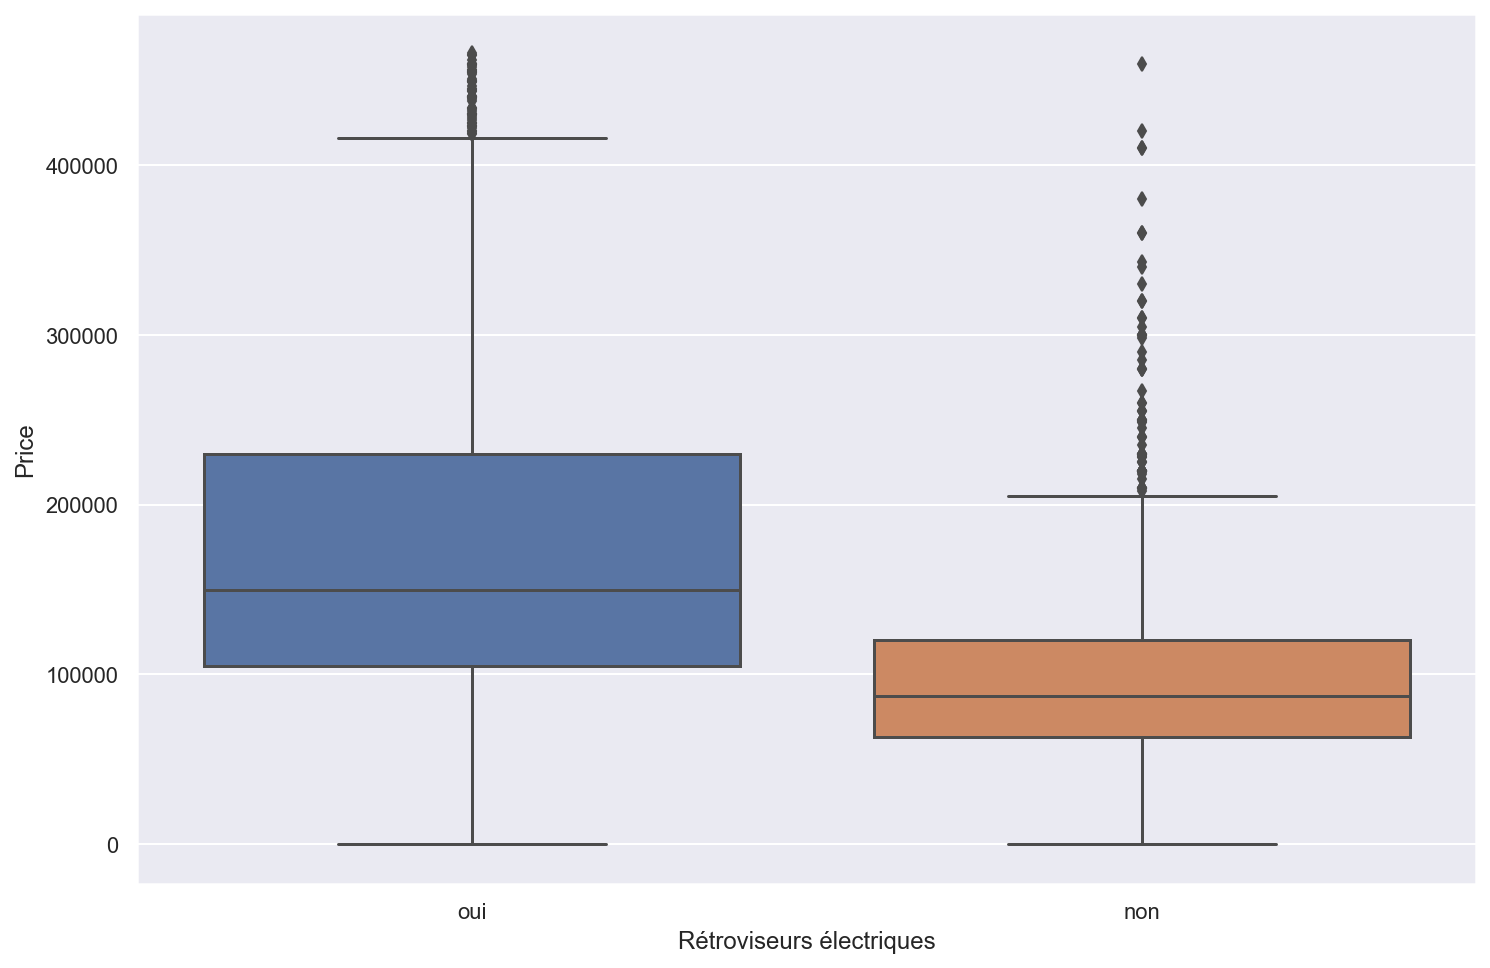

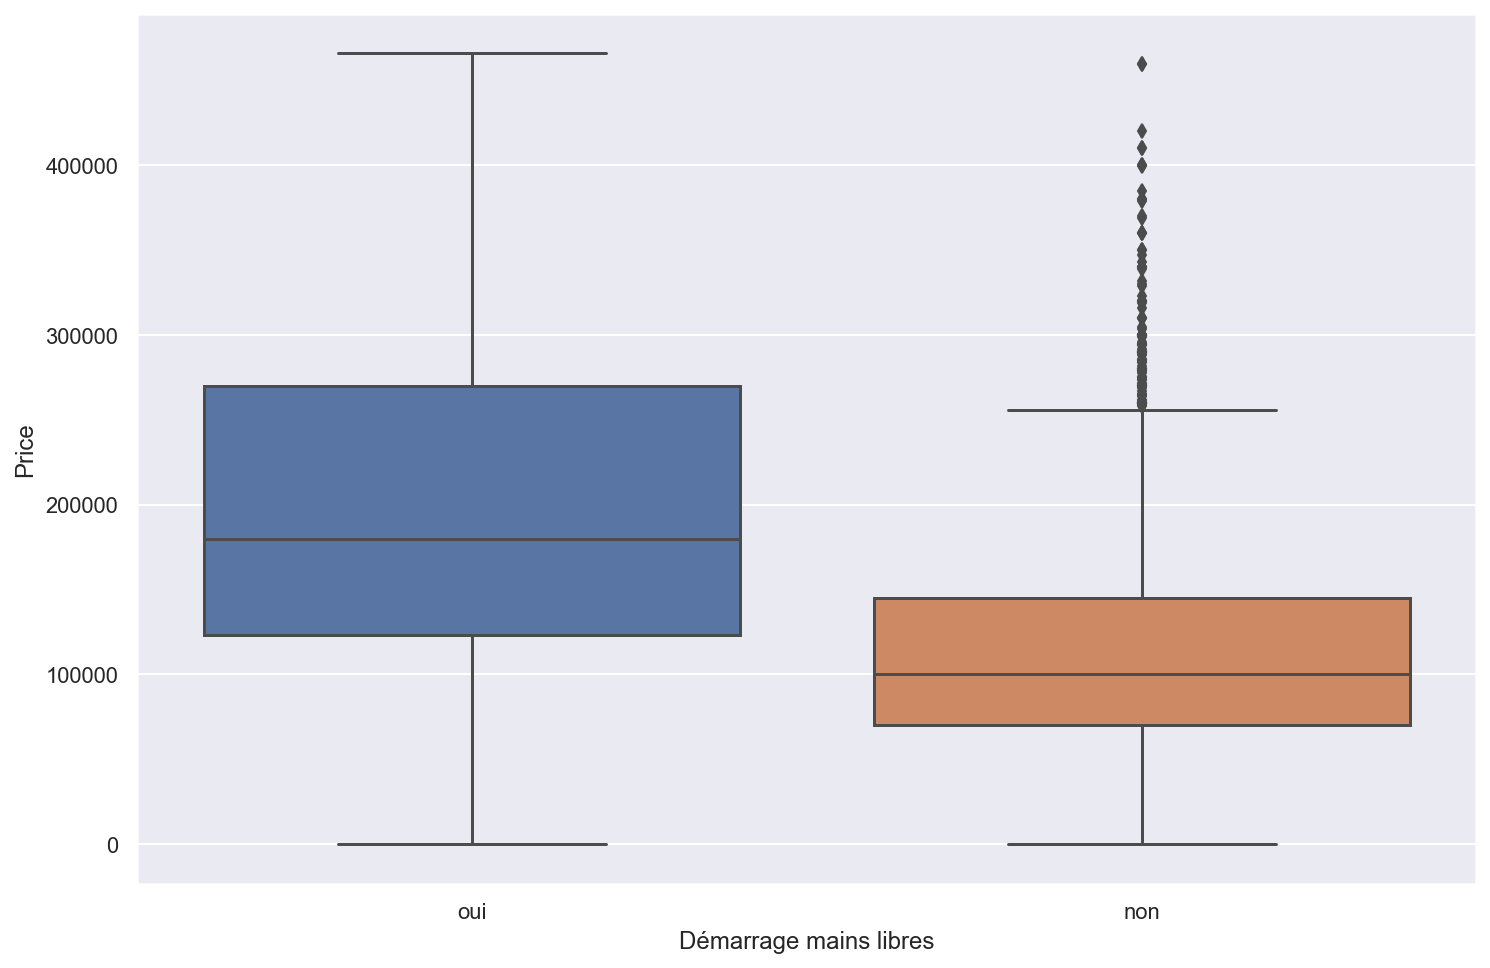

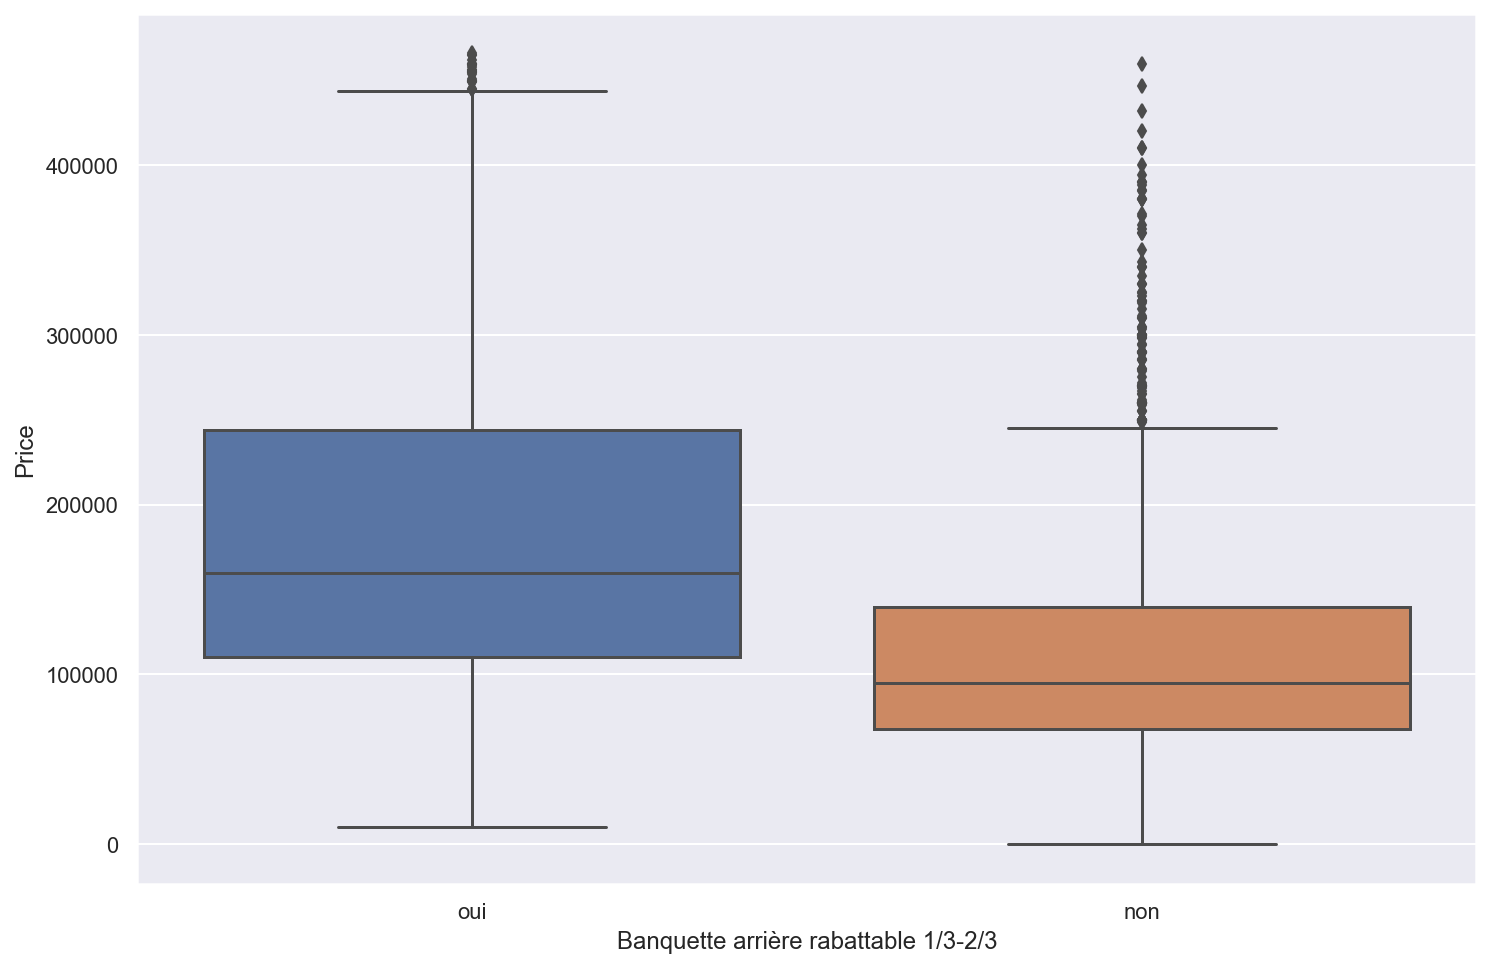

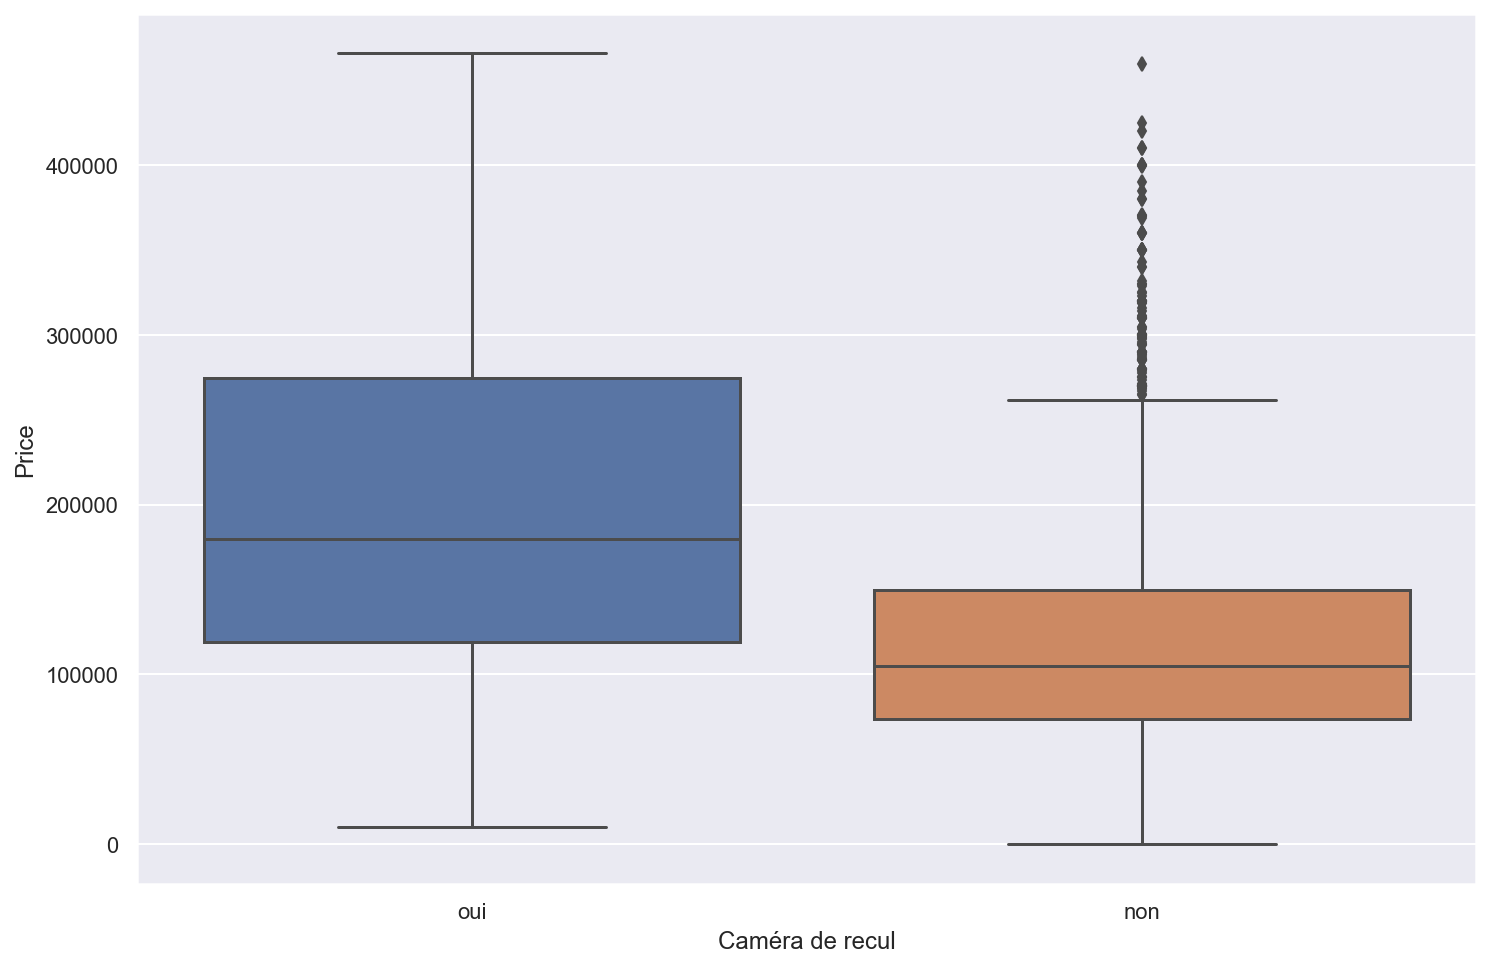

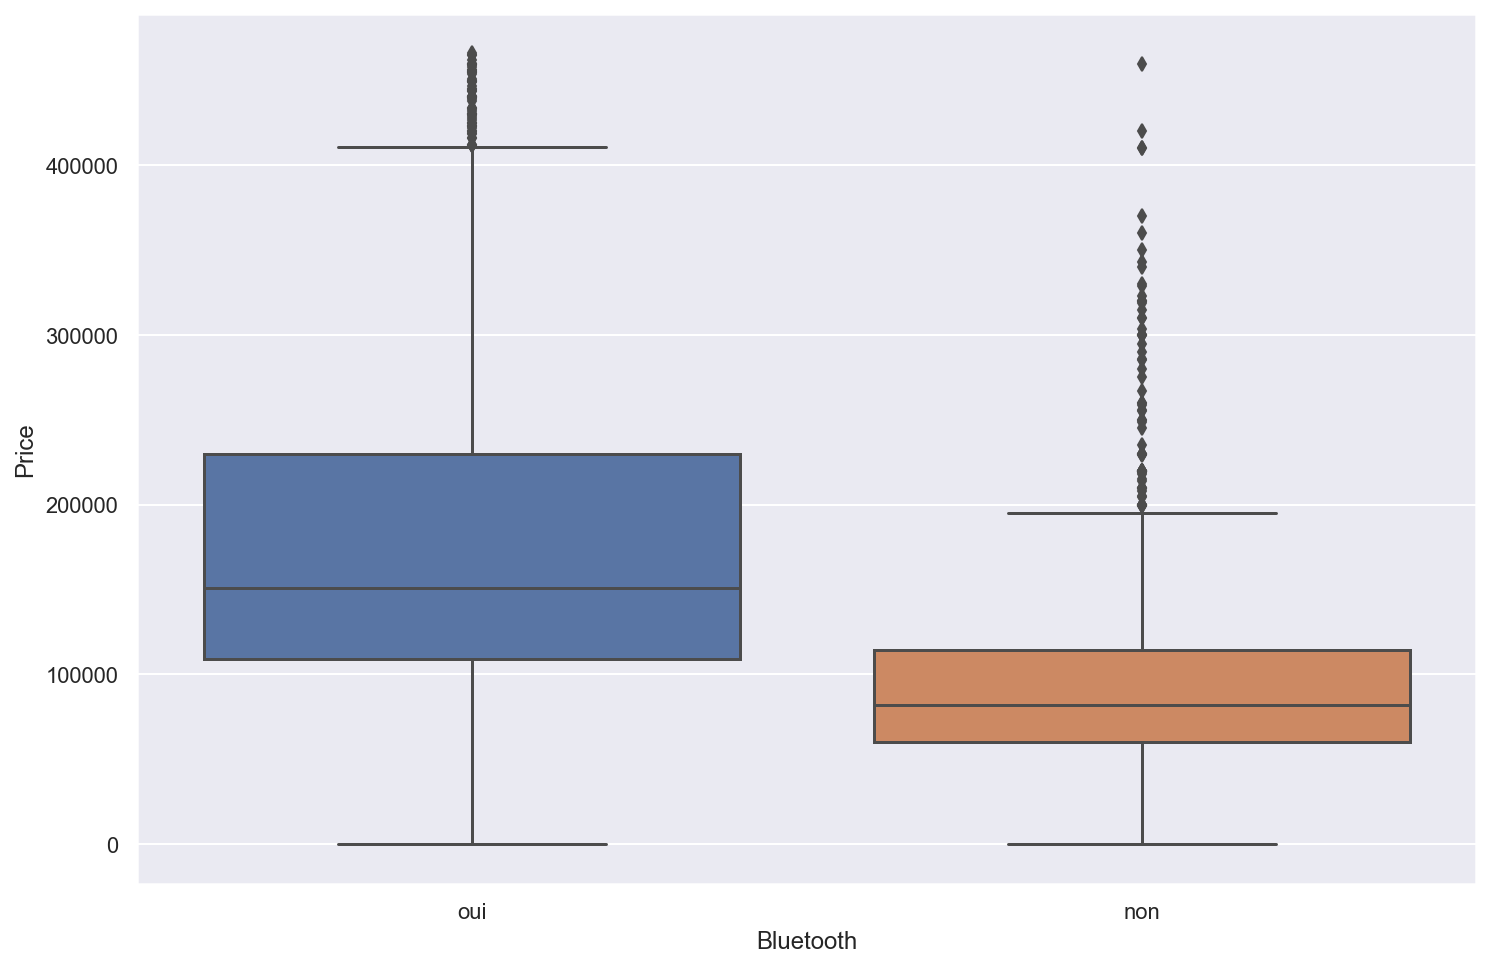

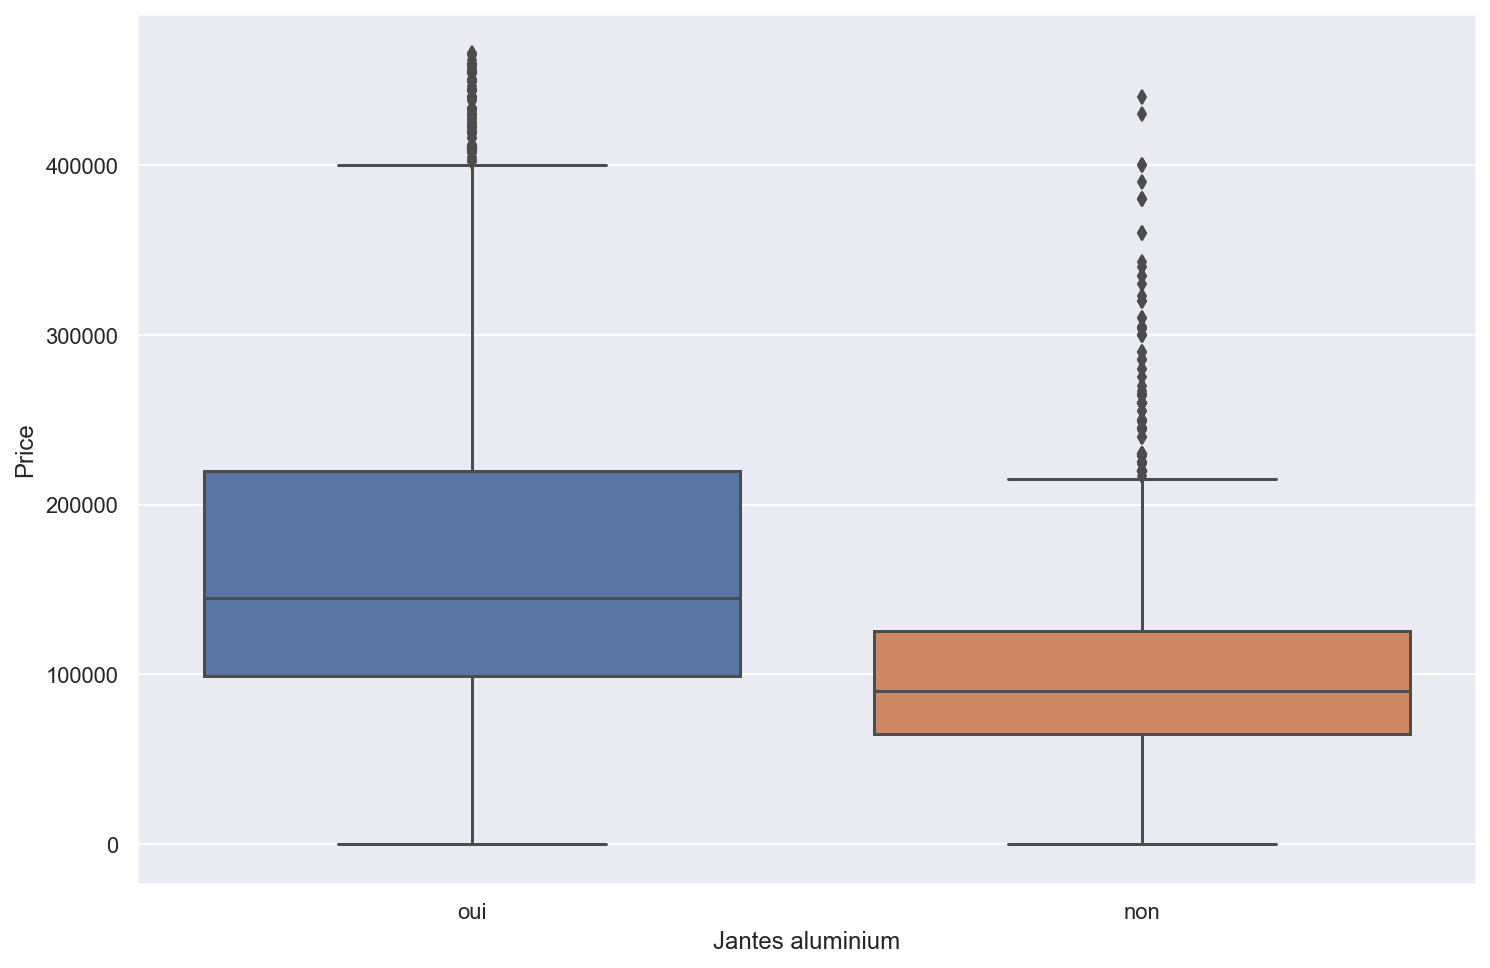

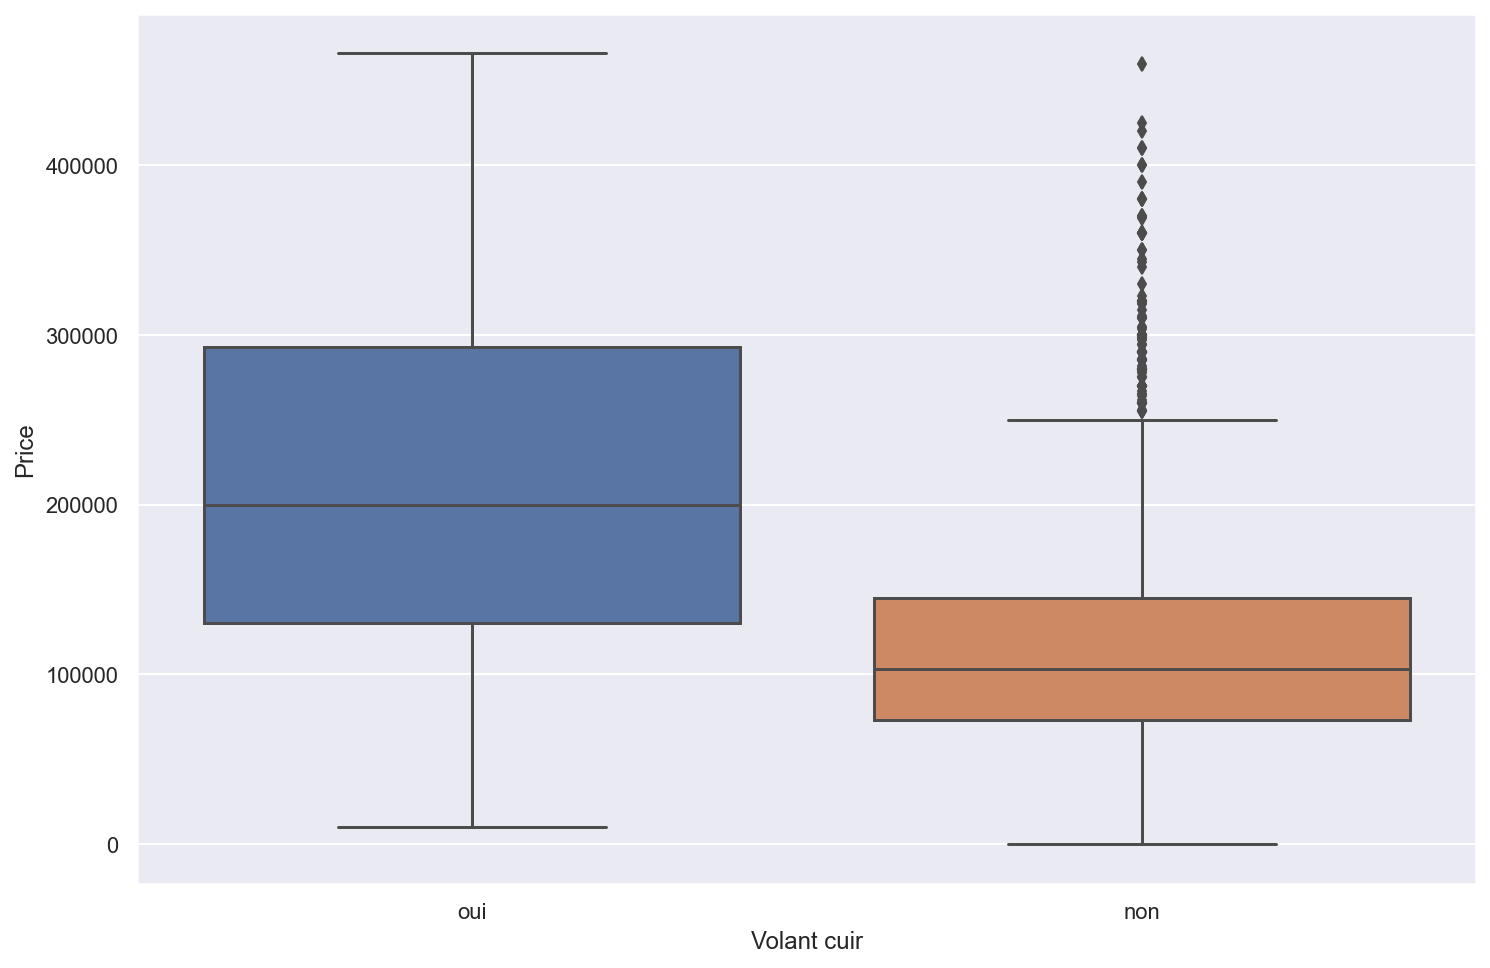

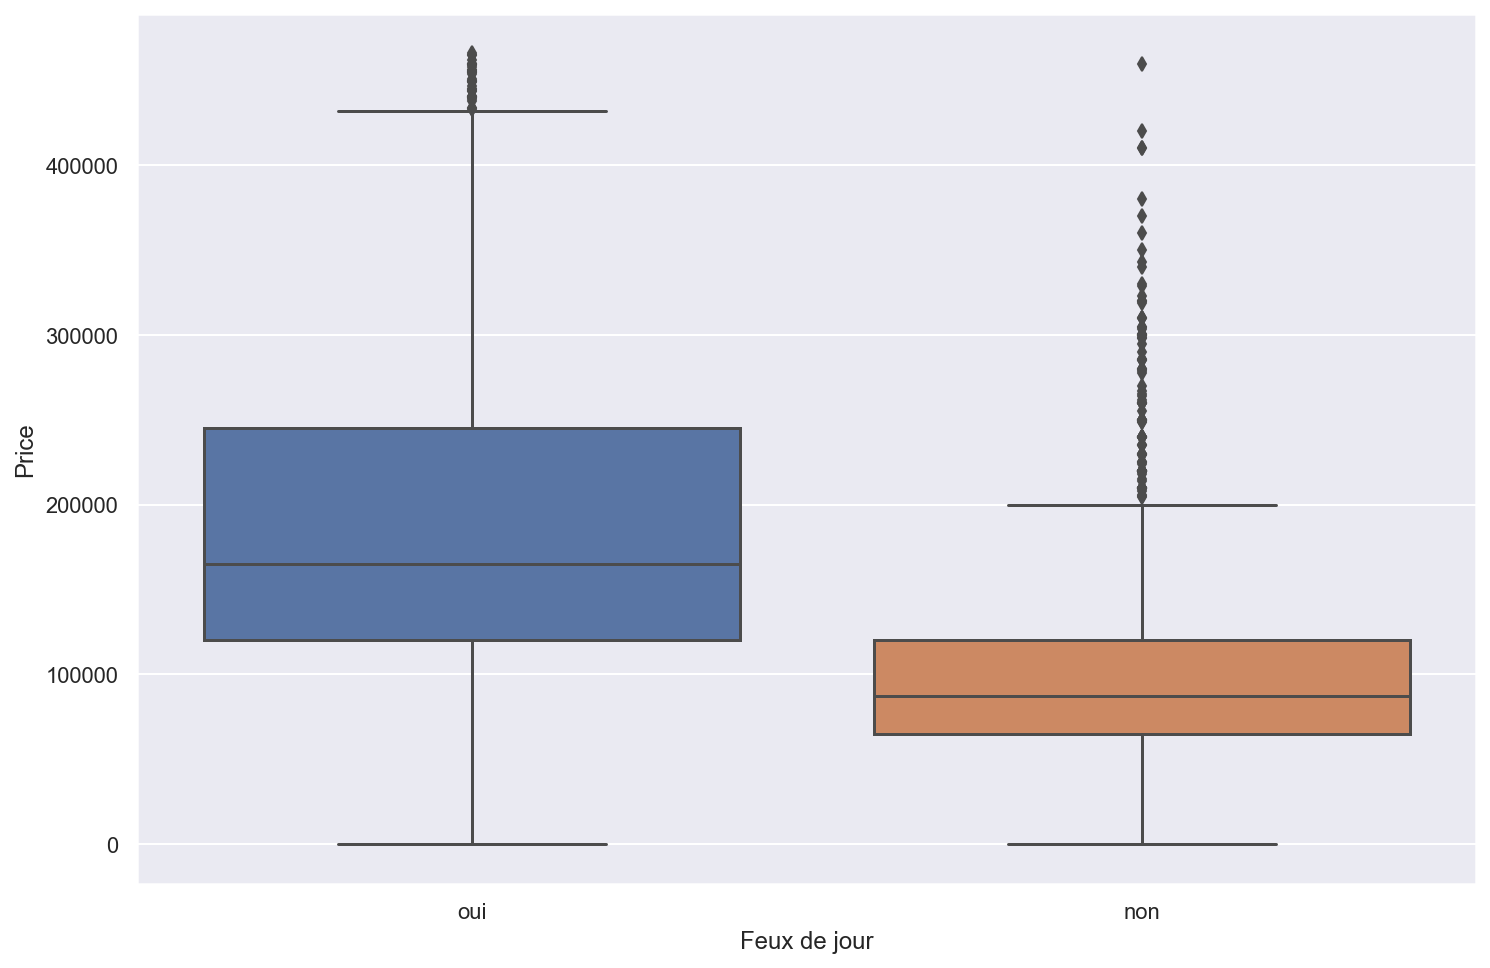

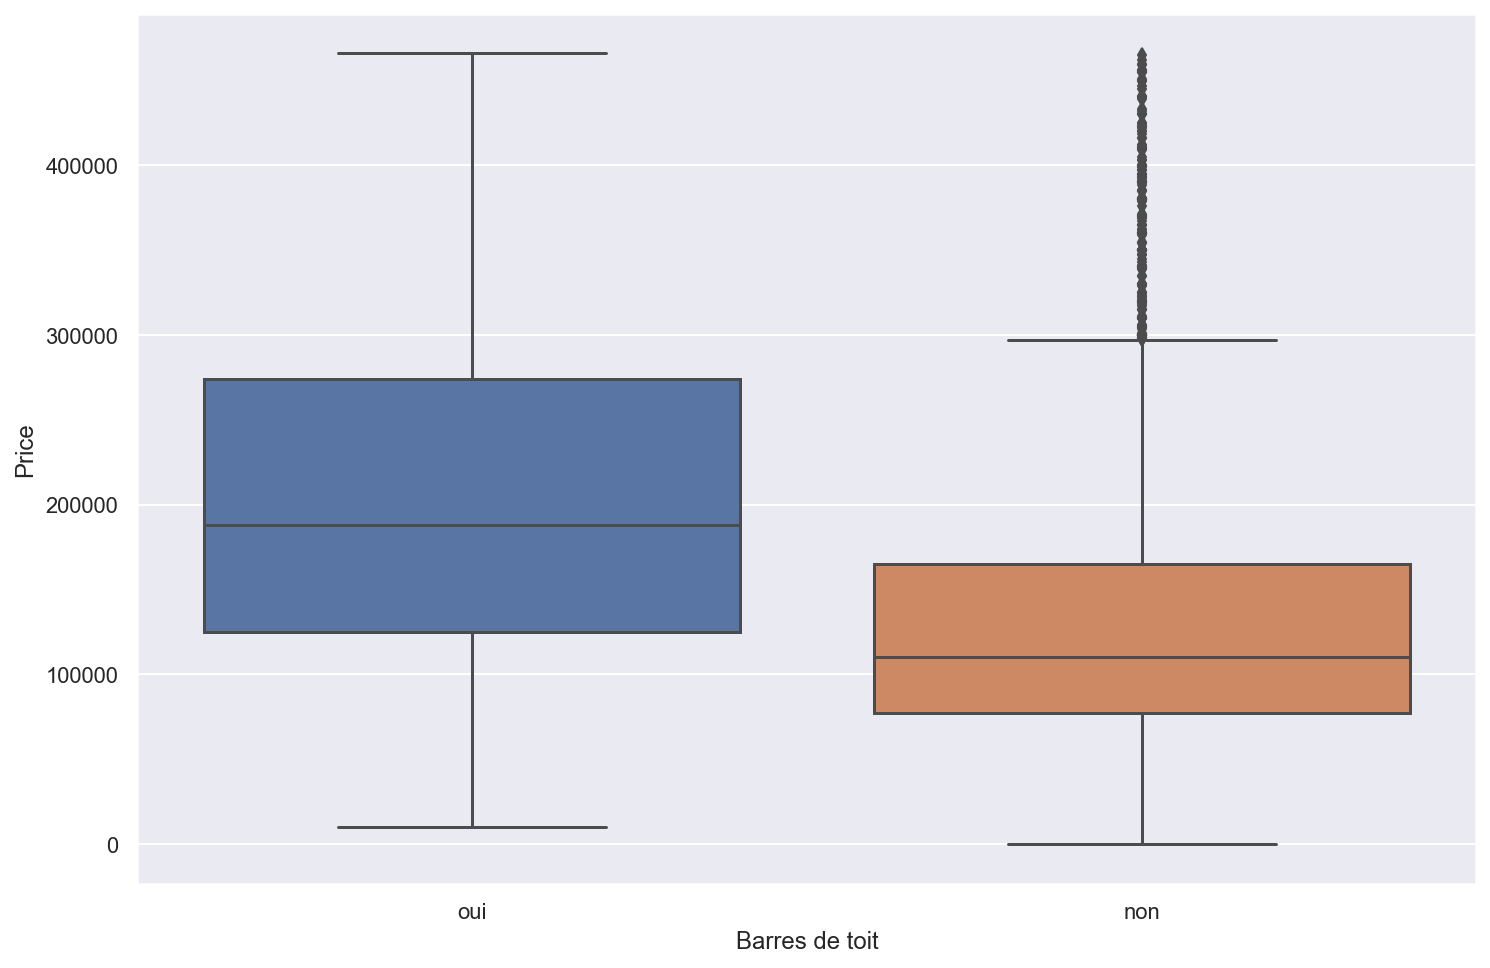

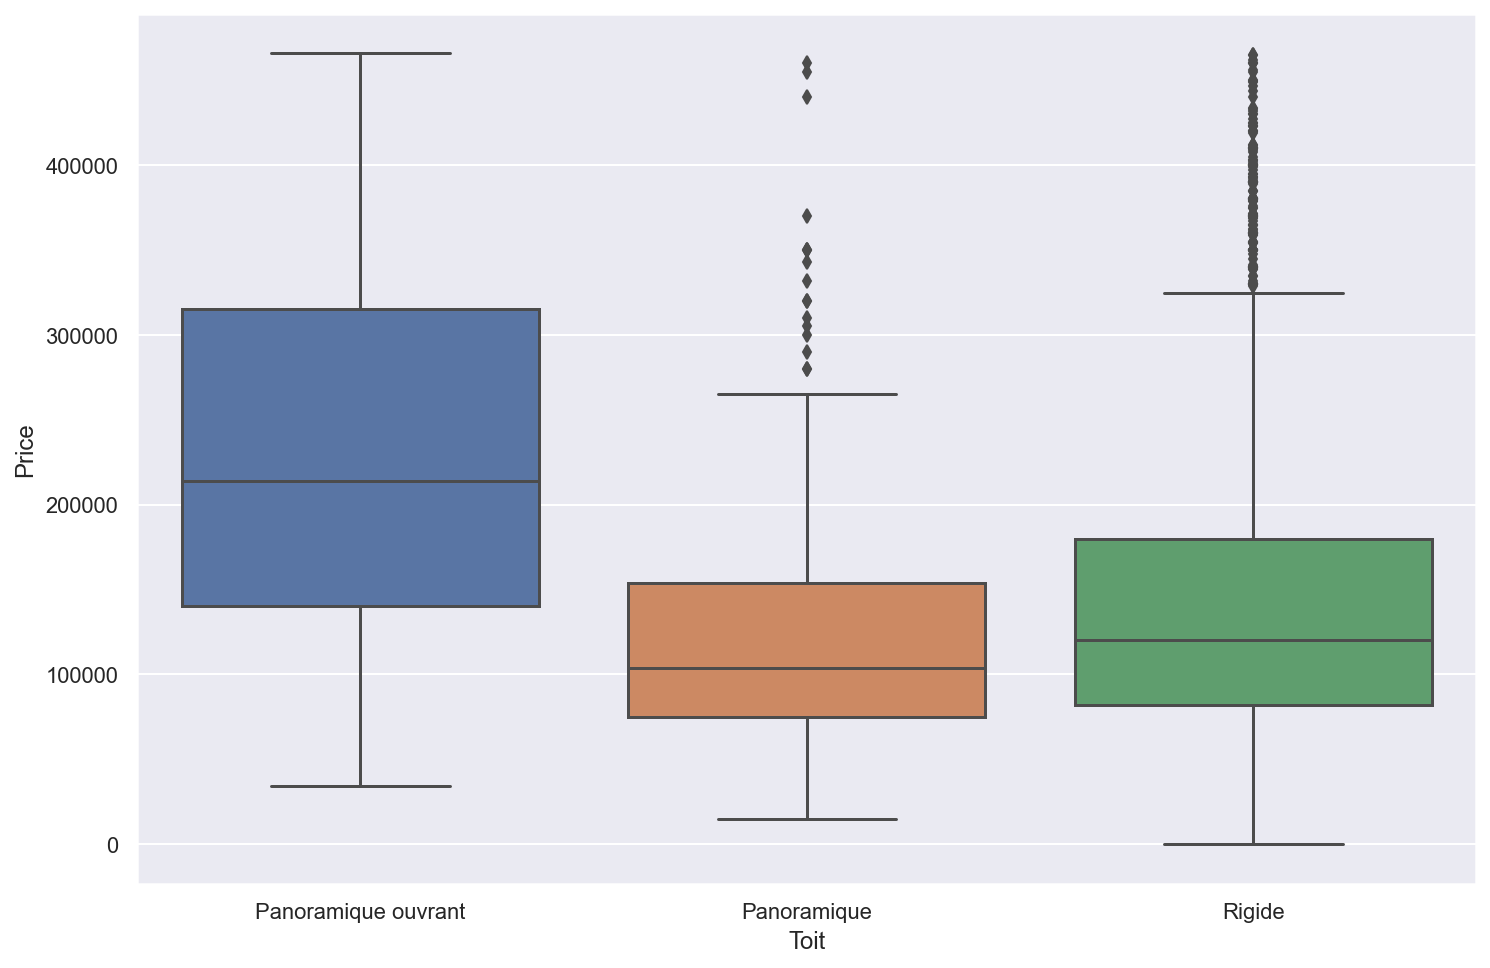

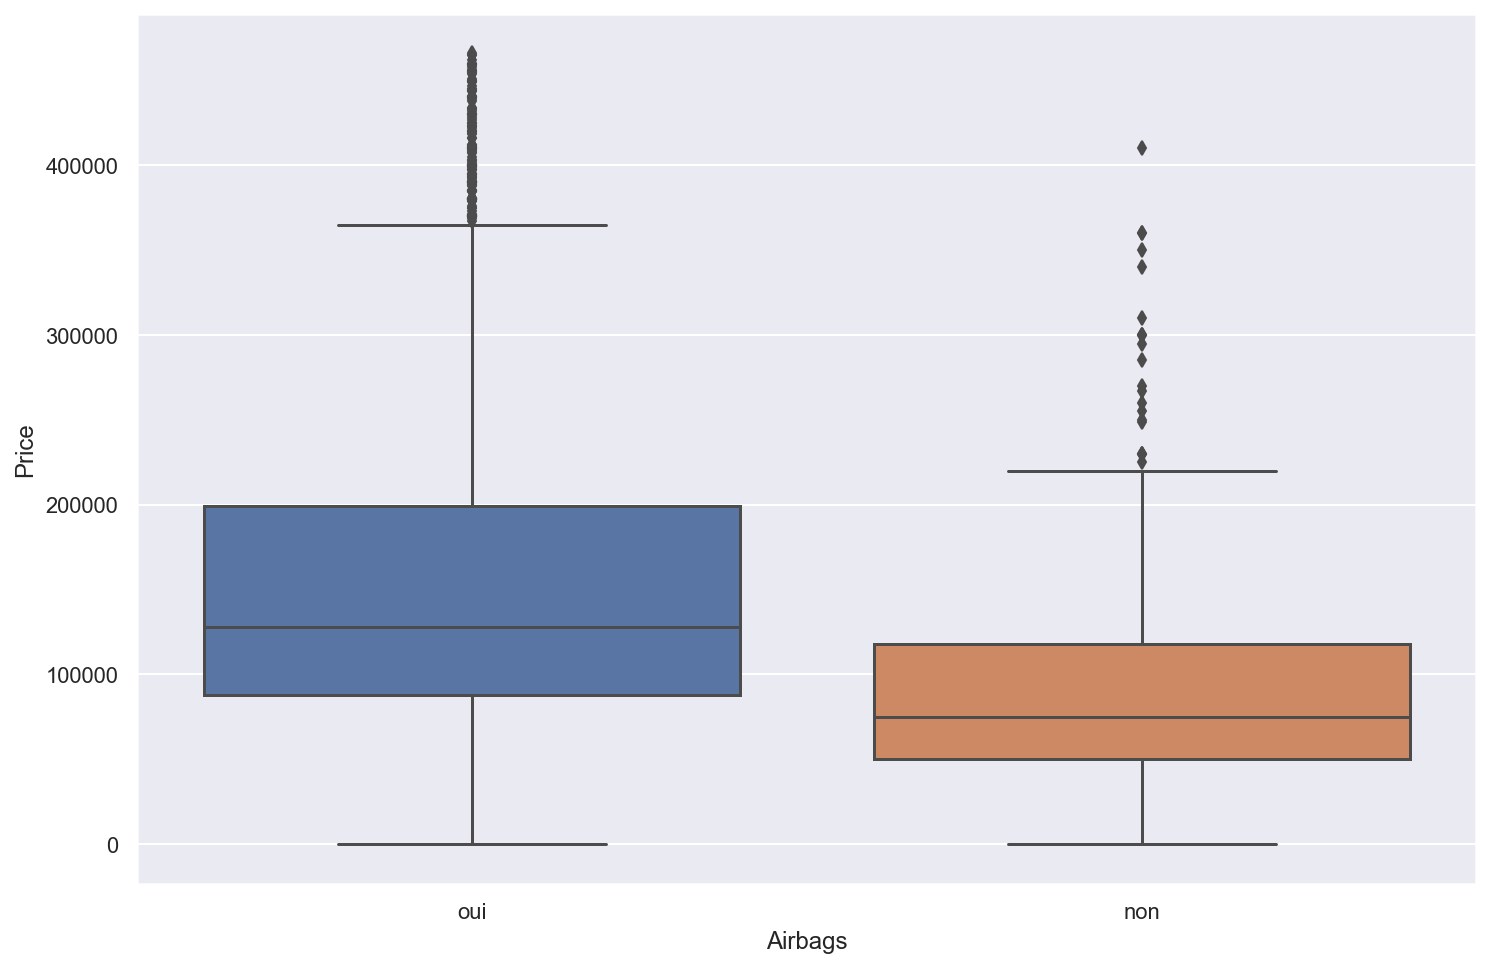

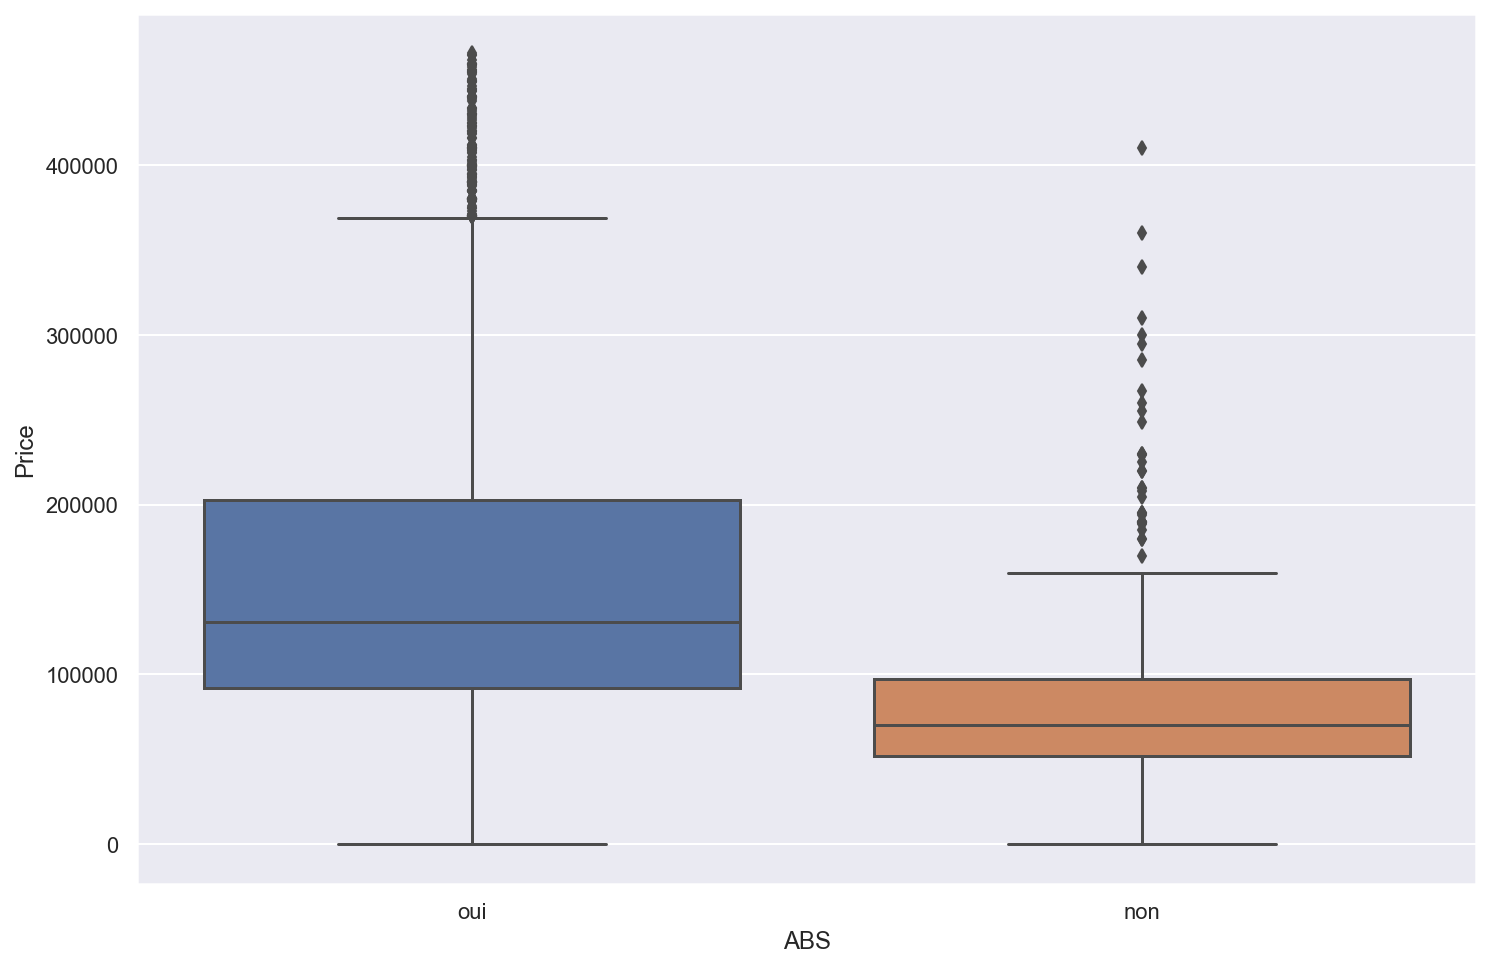

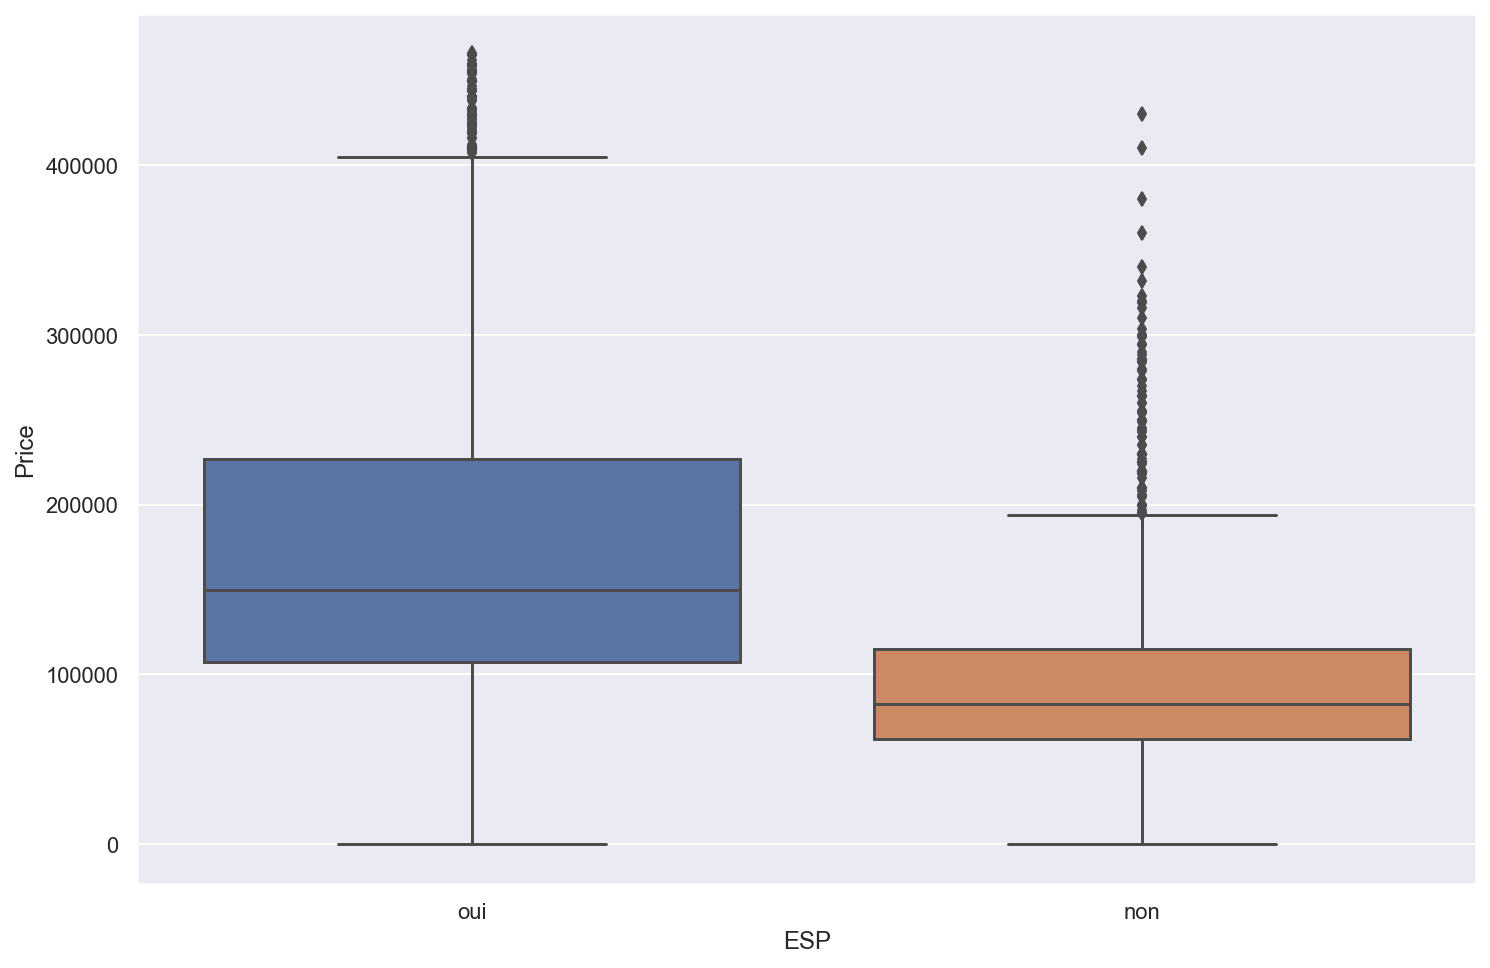

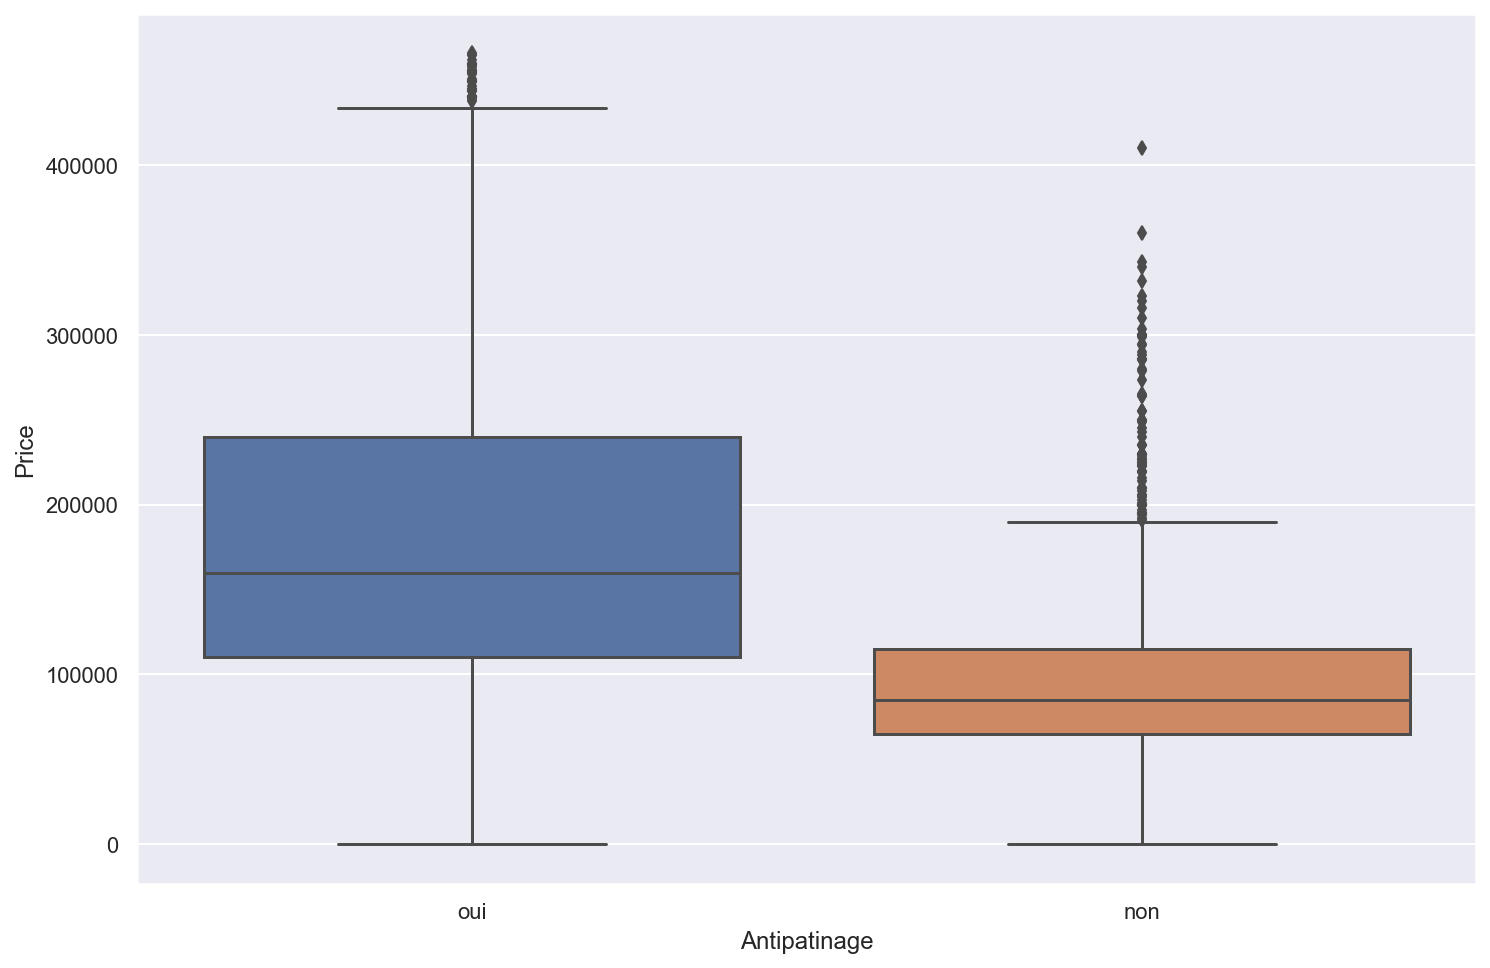

In [191]:
for feature in list(df.columns):
    if feature!="Price":
        sns.set(style='darkgrid')
        plt.figure(figsize=(12,8))
        sns.boxplot(x=feature, y='Price', data=df)
    

### **Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix')

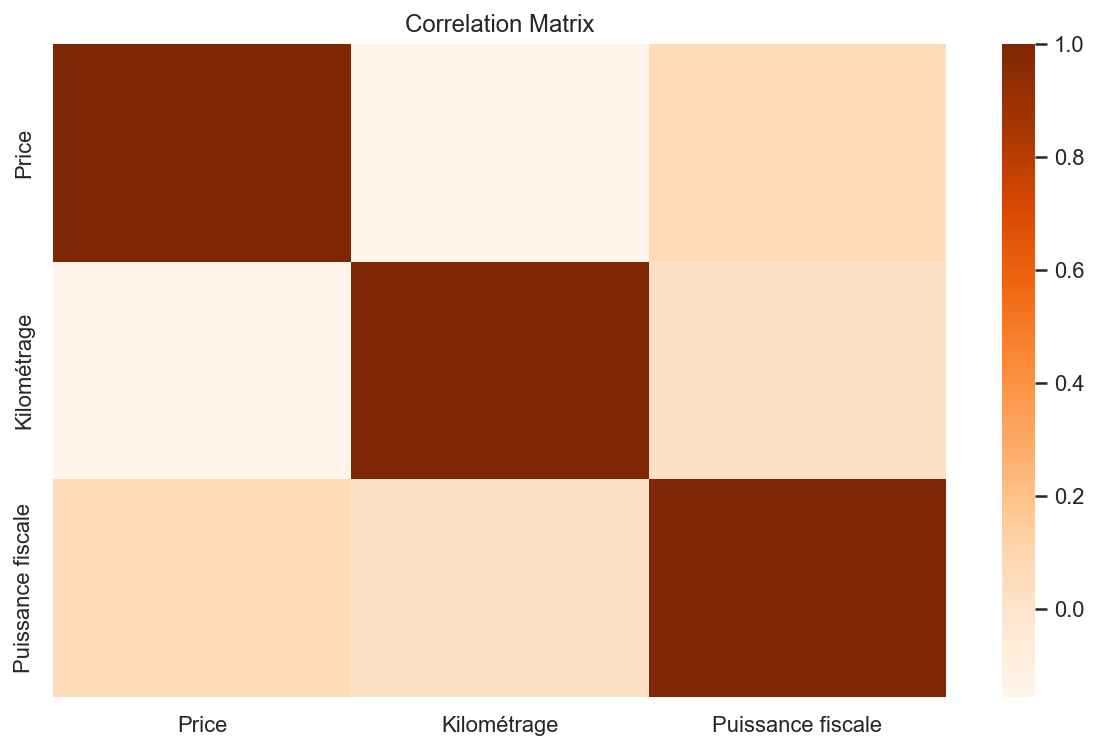

In [192]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Oranges').set_title('Correlation Matrix')

**It seems like there is a significant negative correlation between price and  Kilométrage. This is expected because older cars are cheaper.**

> **`CONCLUSION`:  ALL Features influences the price**

#  Data Preprocessing: 

In [193]:
df.shape

(3638, 36)

In [194]:
# define categorical and numerical features names:
categorical=['Brand', 'Model', 'Version', 'Main',
       'Carburant', 'Transmision', 'Couleur extérieure',
       'Etat du véhicule', 'Climatisation', 'Vitres électriques',
       'Sièges électriques', 'Ordinateur de bord', 'Start & Stop',
       'Régulateur de vitesse', 'Allumage auto. des feux',
       'Détecteur de pluie', 'Commandes au volant', 'Ecran tactile',
       'Rétroviseurs électriques', 'Démarrage mains libres',
       'Banquette arrière rabattable 1/3-2/3', 'Caméra de recul', 'Bluetooth',
       'Jantes aluminium', 'Volant cuir', 'Feux de jour', 'Barres de toit',
       'Toit', 'Airbags', 'ABS', 'ESP', 'Antipatinage']
numerical=["Kilométrage","Puissance fiscale"]

In [195]:
# One Hot Encoding:
dummy_variables = pd.get_dummies(df[categorical], drop_first=True) #drop_first is set to true to permit dummy encoding
dummy_variables.shape
dummy_variables.head()

,Brand_AUDI,Brand_BMW,Brand_CITROEN,Brand_DACIA,Brand_DFSK,Brand_DS,Brand_FIAT,Brand_FORD,Brand_HONDA,Brand_HYUNDAI,...,Jantes aluminium_oui,Volant cuir_oui,Feux de jour_oui,Barres de toit_oui,Toit_Panoramique ouvrant,Toit_Rigide,Airbags_oui,ABS_oui,ESP_oui,Antipatinage_oui
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,1,1


In [196]:
# Normalization
#Import the MinMaxScaler() function
from sklearn.preprocessing import MinMaxScaler
num_features = df[["Kilométrage","Puissance fiscale","Price"]]
sc = MinMaxScaler()
#num_features = sc.fit_transform(num_features)

In [197]:
# combining categorical and numerical features
cat_features = dummy_variables.values

preprocessed_data = np.concatenate((cat_features, num_features), axis=1)
X = preprocessed_data[:, :preprocessed_data.shape[1]-1]
y = preprocessed_data[:, preprocessed_data.shape[1]-1]
preprocessed_data.shape
#dummy_variables.describe

(3638, 2752)

In [199]:
# Spliting DATA:
from sklearn.model_selection import train_test_split
#we willuse 20% of data to test and 80% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) #Popular integer random seeds are 0 and 42.

# **Model Training**

####    `Model 1`  : Linear Regression :

In [208]:
from sklearn.linear_model import LinearRegression
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
y_predicted=regr.predict(X_test)

In [209]:
r2_score = regr.score(X_test,y_test)
print(r2_score*100,'%')

-30312855424.75279 %


In [210]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_predicted))
print(math.sqrt(mean_squared_error(y_test, y_predicted)))


2.486343015610756e+18
1576814198.189107


####    `Model  2` : Ridge Regression :

In [204]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

R-squared score (training):0.961
R-squared score (test): 0.774


In [205]:
r2_score = ridge.score(X_test,y_test)
print(r2_score*100,'%')

77.44659385805228 %


####    `Model 3`  : Gradient Boosting Regressor model :

In [206]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,
'learning_rate': 0.03, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

C:\Users\SAAD\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R-squared score (training): 0.920
R-squared score (test): 0.780


In [207]:
r2_score = gbr.score(X_test,y_test)
print(r2_score*100,'%')

78.04446497945273 %
